ZCCS 2019 / 2021 Exposure Monitoring Data Analysis

## Load in all the packages we need:

In [2]:
%matplotlib notebook

import numpy as np #scientific computing libary
from matplotlib import pyplot as plt #plotting library
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd #to allow Python to work with dataframes
import numpy as np #to include NaNs
from datetime import datetime #to easily handle datetime objects
import pathlib #to be able to easily interact with files on your computer
import scipy as sp
import scipy.stats as stats
import pylab
import glob
import os
import ntpath
import csv
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.metrics import r2_score
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Stats Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

## CO and PM2.5 Diurnal Comparisons

### Load in four CSVs: 2019 and 2021 CO and PM hourly averages (the outputs of the "timematch" python codes)

In [3]:
CO_hr_19 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_CO_hourly_CSV.csv',encoding='latin1',index_col=False)
PM_hr_19 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_PM_hourly_CSV.csv',encoding='latin1',index_col=False)

CO_hr_21 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2021_CO_hourly_CSV.csv',encoding='latin1',index_col=False)
PM_hr_21 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2021_PM_hourly_CSV.csv',encoding='latin1',index_col=False)
VOC_hr_21 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2021_VOC_hourly_CSV.csv',encoding='latin1',index_col=False)

### Boxplots for Each Hour:

<IPython.core.display.Javascript object>


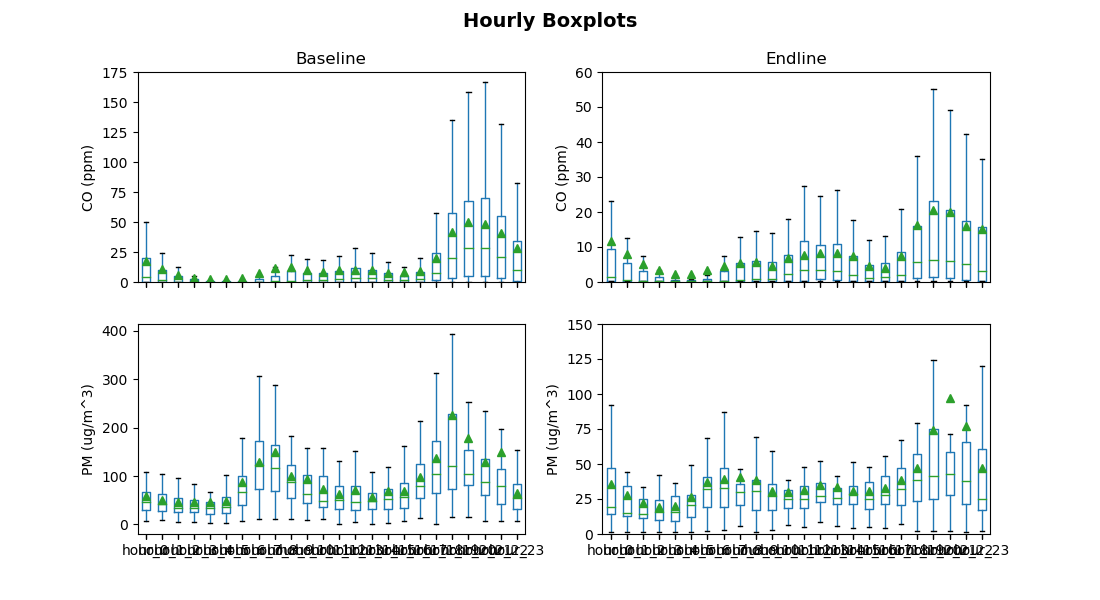

(0, 150)

In [4]:
fig0, axes0 = plt.subplots(2, 2, figsize=(11,6),sharey=False, sharex=True)
fig0.suptitle('Hourly Boxplots', size=14,fontweight='bold')

# 2019 CO
CO_hr_19.boxplot(ax=axes0[0,0],showfliers=False,grid=False,showmeans=True, patch_artist=False,
                 column=['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9',
                         'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18',
                         'hour_19','hour_20','hour_21','hour_22','hour_23'])
axes0[0,0].set_title('Baseline',size=12)
axes0[0,0].set_ylabel("CO (ppm)", fontsize=10)
axes0[0,0].set_ylim((0,175))

# 2019 PM
PM_hr_19.boxplot(ax=axes0[1,0],showfliers=False,grid=False,showmeans=True, patch_artist=False,
                 column=['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9',
                         'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18',
                         'hour_19','hour_20','hour_21','hour_22','hour_23'])
axes0[1,0].set_ylabel("PM (ug/m^3)", fontsize=10)
#axes0[1,0].set_ylim((0,400))

# 2021 CO
CO_hr_21.boxplot(ax=axes0[0,1],showfliers=False,grid=False,showmeans=True, patch_artist=False,
                 column=['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9',
                         'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18',
                         'hour_19','hour_20','hour_21','hour_22','hour_23'])
axes0[0,1].set_title('Endline',size=12)
axes0[0,1].set_ylabel("CO (ppm)", fontsize=10)
axes0[0,1].set_ylim((0,60))

# 2021 PM
PM_hr_21.boxplot(ax=axes0[1,1],showfliers=False,grid=False,showmeans=True, patch_artist=False,
                 column=['hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9',
                         'hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18',
                         'hour_19','hour_20','hour_21','hour_22','hour_23'])
axes0[1,1].set_ylabel("PM (ug/m^3)", fontsize=10)
axes0[1,1].set_ylim((0,150))


### Shaded IQR for Each Hour:

<IPython.core.display.Javascript object>


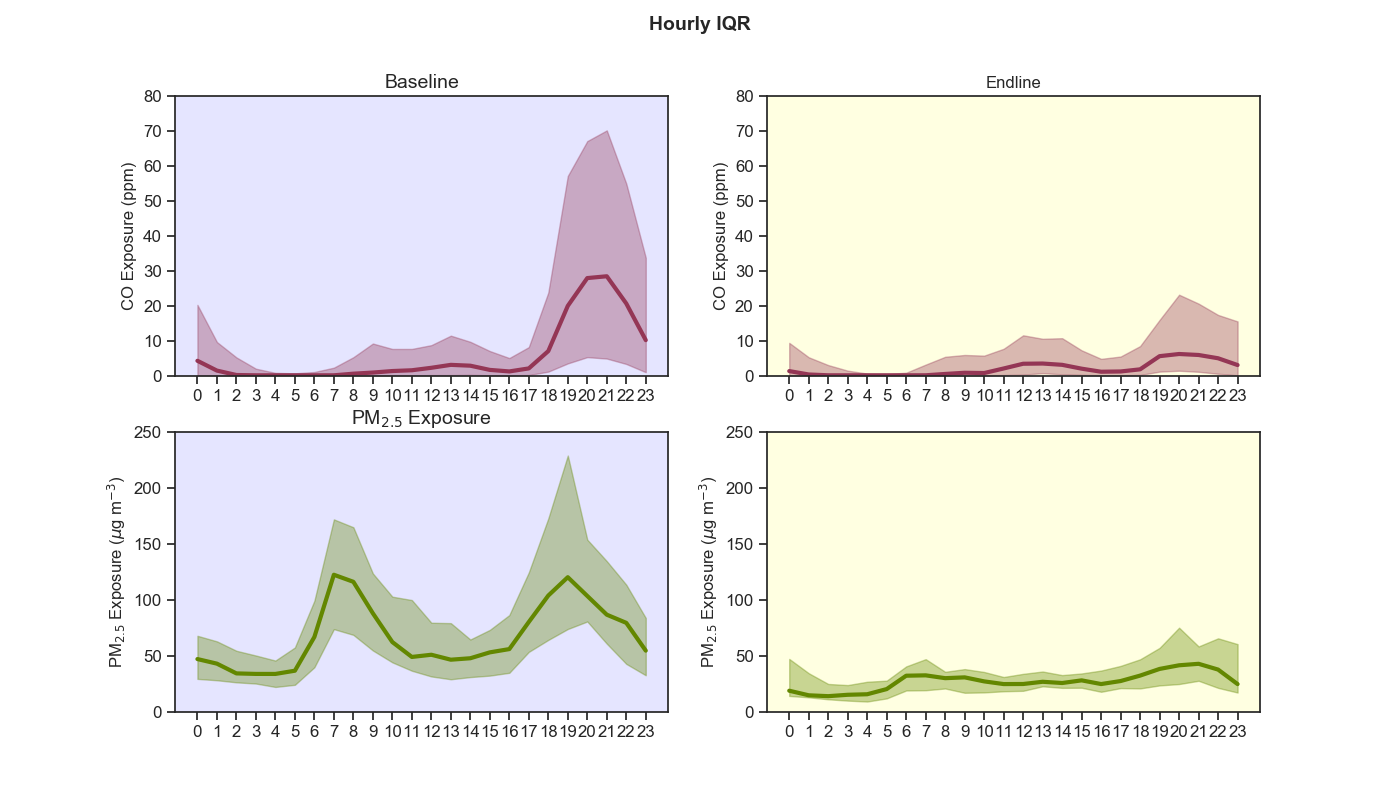

In [6]:
sns.set(style="white",palette="tab10",font_scale=1.1)
sns.set_style("ticks")
fig1, axes1 = plt.subplots(2, 2, figsize=(14,8),sharey=False, sharex=False)
fig1.suptitle('Hourly IQR', size=14,fontweight='bold')

axes1[0,0].set_facecolor('#E5E5FF') # baseline
axes1[1,0].set_facecolor('#E5E5FF') # baseline
axes1[0,1].set_facecolor('#FFFFE1') # endline
axes1[1,1].set_facecolor('#FFFFE1') # endline

# 2019 CO
CO_hr_19_stats = CO_hr_19.describe()
#pulling out the columns we want
CO_hr_19_stats = CO_hr_19_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_stats = CO_hr_19_stats.transpose()
axes1[0,0].fill_between(CO_hr_19_stats.index.values,CO_hr_19_stats['75%'],CO_hr_19_stats['25%'],color='#943655',alpha=0.35)
axes1[0,0].plot(CO_hr_19_stats.index.values, CO_hr_19_stats['50%'],color='#943655',linewidth=3)
axes1[0,0].set_title('Baseline',size=14)
axes1[0,0].set_ylabel("CO Exposure (ppm)", fontsize=12)
axes1[0,0].set_ylim((0,80))

# 2019 PM
PM_hr_19_stats = PM_hr_19.describe()
#pulling out the columns we want
PM_hr_19_stats = PM_hr_19_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_stats = PM_hr_19_stats.transpose()
axes1[1,0].fill_between(PM_hr_19_stats.index.values,PM_hr_19_stats['75%'],PM_hr_19_stats['25%'],color='#638700',alpha=0.35)
axes1[1,0].plot(PM_hr_19_stats.index.values, PM_hr_19_stats['50%'],color='#638700',linewidth=3)
axes1[1,0].set_title('PM$_{2.5}$ Exposure',size=14)
axes1[1,0].set_ylabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=12)
axes1[1,0].set_ylim((0,250))

# 2021 CO
CO_hr_21_stats = CO_hr_21.describe()
#pulling out the columns we want
CO_hr_21_stats = CO_hr_21_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_stats = CO_hr_21_stats.transpose()
axes1[0,1].fill_between(CO_hr_21_stats.index.values,CO_hr_21_stats['75%'],CO_hr_21_stats['25%'],color='#943655',
                        alpha=0.35,label='75th to 25th Percentile')
axes1[0,1].plot(CO_hr_21_stats.index.values, CO_hr_21_stats['50%'],color='#943655',label="Median",linewidth=3)
#axes1[0,1].legend(loc='upper left')
axes1[0,1].set_title('Endline',size=12)
axes1[0,1].set_ylabel("CO Exposure (ppm)", fontsize=12)
axes1[0,1].set_ylim((0,80))

# 2021 PM
PM_hr_21_stats = PM_hr_21.describe()
#pulling out the columns we want
PM_hr_21_stats = PM_hr_21_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_stats = PM_hr_21_stats.transpose()
axes1[1,1].fill_between(PM_hr_21_stats.index.values,PM_hr_21_stats['75%'],PM_hr_21_stats['25%'],color='#638700',
                        alpha=0.35,label='75th to 25th Percentile')
axes1[1,1].plot(PM_hr_21_stats.index.values, PM_hr_21_stats['50%'],color='#638700',label="Median",linewidth=3)
#axes1[1,1].legend(loc='upper left')
axes1[1,1].set_ylabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=12)
axes1[1,1].set_ylim((0,250))


axes1[0,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
axes1[1,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
axes1[0,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
axes1[1,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

fig1.savefig('CO_PM_VOC_diurnals_base_end.png',transparent=False)

### Median for Each Hour by Compound:

In [7]:
# 2019
CO_hr_19_Matero = CO_hr_19[CO_hr_19["Compound"]=="Matero"]
CO_hr_19_Kalingalinga = CO_hr_19[CO_hr_19["Compound"]=="Kalingalinga"]
CO_hr_19_Kamanga = CO_hr_19[CO_hr_19["Compound"]=="Kamanga"]
CO_hr_19_Ngombe = CO_hr_19[CO_hr_19["Compound"]=="Ng'ombe"]
CO_hr_19_Matero_stats = CO_hr_19_Matero.describe()
CO_hr_19_Matero_stats = CO_hr_19_Matero_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_Matero_stats = CO_hr_19_Matero_stats.transpose()
CO_hr_19_Kalingalinga_stats = CO_hr_19_Kalingalinga.describe()
CO_hr_19_Kalingalinga_stats = CO_hr_19_Kalingalinga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_Kalingalinga_stats = CO_hr_19_Kalingalinga_stats.transpose()
CO_hr_19_Kamanga_stats = CO_hr_19_Kamanga.describe()
CO_hr_19_Kamanga_stats = CO_hr_19_Kamanga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_Kamanga_stats = CO_hr_19_Kamanga_stats.transpose()
CO_hr_19_Ngombe_stats = CO_hr_19_Ngombe.describe()
CO_hr_19_Ngombe_stats = CO_hr_19_Ngombe_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_Ngombe_stats = CO_hr_19_Ngombe_stats.transpose()

PM_hr_19_Matero = PM_hr_19[PM_hr_19["Compound"]=="Matero"]
PM_hr_19_Kalingalinga = PM_hr_19[PM_hr_19["Compound"]=="Kalingalinga"]
PM_hr_19_Kamanga = PM_hr_19[PM_hr_19["Compound"]=="Kamanga"]
PM_hr_19_Ngombe = PM_hr_19[PM_hr_19["Compound"]=="Ng'ombe"]
PM_hr_19_Matero_stats = PM_hr_19_Matero.describe()
PM_hr_19_Matero_stats = PM_hr_19_Matero_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_Matero_stats = PM_hr_19_Matero_stats.transpose()
PM_hr_19_Kalingalinga_stats = PM_hr_19_Kalingalinga.describe()
PM_hr_19_Kalingalinga_stats = PM_hr_19_Kalingalinga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_Kalingalinga_stats = PM_hr_19_Kalingalinga_stats.transpose()
PM_hr_19_Kamanga_stats = PM_hr_19_Kamanga.describe()
PM_hr_19_Kamanga_stats = PM_hr_19_Kamanga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_Kamanga_stats = PM_hr_19_Kamanga_stats.transpose()
PM_hr_19_Ngombe_stats = PM_hr_19_Ngombe.describe()
PM_hr_19_Ngombe_stats = PM_hr_19_Ngombe_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_Ngombe_stats = PM_hr_19_Ngombe_stats.transpose()

# 2021
CO_hr_21_Matero = CO_hr_21[CO_hr_21["Compound"]=="Matero"]
CO_hr_21_Kalingalinga = CO_hr_21[CO_hr_21["Compound"]=="Kalingalinga"]
CO_hr_21_Kamanga = CO_hr_21[CO_hr_21["Compound"]=="Kamanga"]
CO_hr_21_Ngombe = CO_hr_21[CO_hr_21["Compound"]=="Ng'ombe"]
CO_hr_21_Matero_stats = CO_hr_21_Matero.describe()
CO_hr_21_Matero_stats = CO_hr_21_Matero_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_Matero_stats = CO_hr_21_Matero_stats.transpose()
CO_hr_21_Kalingalinga_stats = CO_hr_21_Kalingalinga.describe()
CO_hr_21_Kalingalinga_stats = CO_hr_21_Kalingalinga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_Kalingalinga_stats = CO_hr_21_Kalingalinga_stats.transpose()
CO_hr_21_Kamanga_stats = CO_hr_21_Kamanga.describe()
CO_hr_21_Kamanga_stats = CO_hr_21_Kamanga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_Kamanga_stats = CO_hr_21_Kamanga_stats.transpose()
CO_hr_21_Ngombe_stats = CO_hr_21_Ngombe.describe()
CO_hr_21_Ngombe_stats = CO_hr_21_Ngombe_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_Ngombe_stats = CO_hr_21_Ngombe_stats.transpose()

PM_hr_21_Matero = PM_hr_21[PM_hr_21["Compound"]=="Matero"]
PM_hr_21_Kalingalinga = PM_hr_21[PM_hr_21["Compound"]=="Kalingalinga"]
PM_hr_21_Kamanga = PM_hr_21[PM_hr_21["Compound"]=="Kamanga"]
PM_hr_21_Ngombe = PM_hr_21[PM_hr_21["Compound"]=="Ng'ombe"]
PM_hr_21_Matero_stats = PM_hr_21_Matero.describe()
PM_hr_21_Matero_stats = PM_hr_21_Matero_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_Matero_stats = PM_hr_21_Matero_stats.transpose()
PM_hr_21_Kalingalinga_stats = PM_hr_21_Kalingalinga.describe()
PM_hr_21_Kalingalinga_stats = PM_hr_21_Kalingalinga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_Kalingalinga_stats = PM_hr_21_Kalingalinga_stats.transpose()
PM_hr_21_Kamanga_stats = PM_hr_21_Kamanga.describe()
PM_hr_21_Kamanga_stats = PM_hr_21_Kamanga_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_Kamanga_stats = PM_hr_21_Kamanga_stats.transpose()
PM_hr_21_Ngombe_stats = PM_hr_21_Ngombe.describe()
PM_hr_21_Ngombe_stats = PM_hr_21_Ngombe_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_Ngombe_stats = PM_hr_21_Ngombe_stats.transpose()

<IPython.core.display.Javascript object>


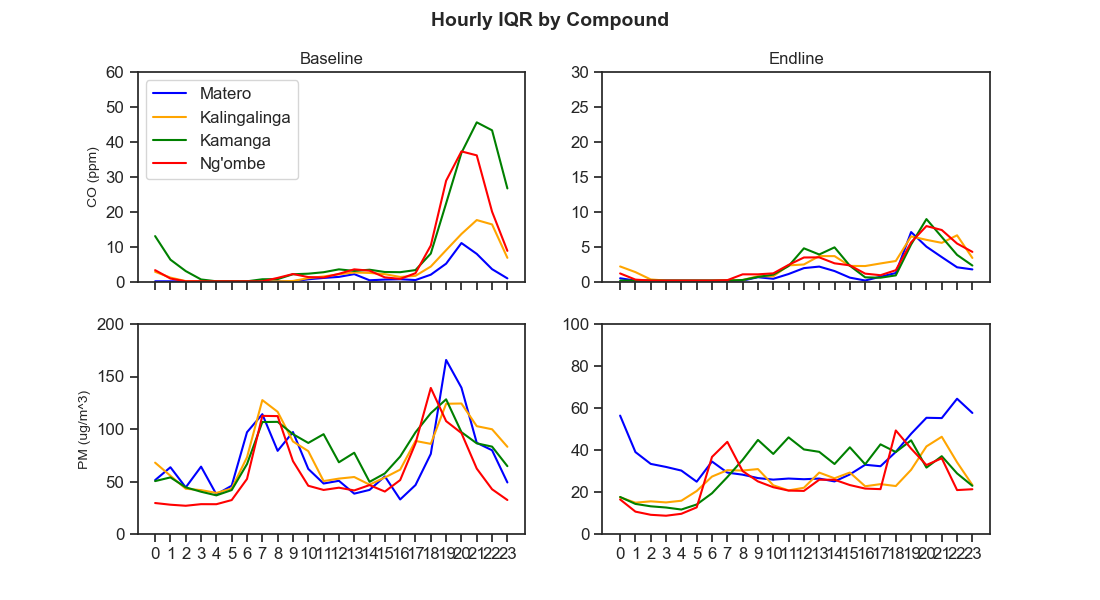

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

In [8]:
fig2, axes2 = plt.subplots(2, 2, figsize=(11,6),sharey=False, sharex=True)
fig2.suptitle('Hourly IQR by Compound', size=14,fontweight='bold')

#2019 CO
axes2[0,0].plot(CO_hr_19_Matero_stats.index.values, CO_hr_19_Matero_stats['50%'],color='blue',label='Matero')
axes2[0,0].plot(CO_hr_19_Kalingalinga_stats.index.values, CO_hr_19_Kalingalinga_stats['50%'],color='orange',label='Kalingalinga')
axes2[0,0].plot(CO_hr_19_Kamanga_stats.index.values, CO_hr_19_Kamanga_stats['50%'],color='green',label='Kamanga')
axes2[0,0].plot(CO_hr_19_Ngombe_stats.index.values, CO_hr_19_Ngombe_stats['50%'],color='red',label="Ng'ombe")
axes2[0,0].set_title('Baseline',size=12)
axes2[0,0].set_ylabel("CO (ppm)", fontsize=10)
axes2[0,0].legend(loc='upper left')

axes2[0,0].set_ylim((0,60))

# 2019 PM
axes2[1,0].plot(PM_hr_19_Matero_stats.index.values, PM_hr_19_Matero_stats['50%'],color='blue')
axes2[1,0].plot(PM_hr_19_Kalingalinga_stats.index.values, PM_hr_19_Kalingalinga_stats['50%'],color='orange')
axes2[1,0].plot(PM_hr_19_Kamanga_stats.index.values, PM_hr_19_Kamanga_stats['50%'],color='green')
axes2[1,0].plot(PM_hr_19_Ngombe_stats.index.values, PM_hr_19_Ngombe_stats['50%'],color='red')
axes2[1,0].set_ylabel("PM (ug/m^3)", fontsize=10)
axes2[1,0].set_ylim((0,200))

#2021 CO
axes2[0,1].plot(CO_hr_21_Matero_stats.index.values, CO_hr_21_Matero_stats['50%'],color='blue')
axes2[0,1].plot(CO_hr_21_Kalingalinga_stats.index.values, CO_hr_21_Kalingalinga_stats['50%'],color='orange')
axes2[0,1].plot(CO_hr_21_Kamanga_stats.index.values, CO_hr_21_Kamanga_stats['50%'],color='green')
axes2[0,1].plot(CO_hr_21_Ngombe_stats.index.values, CO_hr_21_Ngombe_stats['50%'],color='red')
axes2[0,1].set_title('Endline',size=12)
axes2[0,1].set_ylim((0,30))

# 2021 PM
axes2[1,1].plot(PM_hr_21_Matero_stats.index.values, PM_hr_21_Matero_stats['50%'],color='blue')
axes2[1,1].plot(PM_hr_21_Kalingalinga_stats.index.values, PM_hr_21_Kalingalinga_stats['50%'],color='orange')
axes2[1,1].plot(PM_hr_21_Kamanga_stats.index.values, PM_hr_21_Kamanga_stats['50%'],color='green')
axes2[1,1].plot(PM_hr_21_Ngombe_stats.index.values, PM_hr_21_Ngombe_stats['50%'],color='red')
axes2[1,1].set_ylim((0,100))

axes2[1,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

### Median for Each Hour by Stove Indicator Group:

In [12]:
CO_hr_19['stove_ind_grp2'] = db_19['stove_ind_grp2'].copy()
PM_hr_19['stove_ind_grp2'] = db_19['stove_ind_grp2'].copy()
CO_hr_21['stove_ind_grp2'] = db_21['stove_ind_grp2'].copy()
PM_hr_21['stove_ind_grp2'] = db_21['stove_ind_grp2'].copy()

In [13]:
# 2019
CO_hr_19_CharcExc = CO_hr_19[CO_hr_19["stove_ind_grp2"]=="charc exc"]
CO_hr_19_CharcElec = CO_hr_19[CO_hr_19["stove_ind_grp2"]=="elec + charc"]
CO_hr_19_ElecExc = CO_hr_19[CO_hr_19["stove_ind_grp2"]=="elec exc"]
CO_hr_19_MM = CO_hr_19[CO_hr_19["stove_ind_grp2"]=="mm any"]
CO_hr_19_EZ = CO_hr_19[CO_hr_19["stove_ind_grp2"]=="eco any"]
CO_hr_19_other = CO_hr_19[CO_hr_19["stove_ind_grp2"]=="other"]
CO_hr_19_CharcExc_stats = CO_hr_19_CharcExc.describe()
CO_hr_19_CharcExc_stats = CO_hr_19_CharcExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_CharcExc_stats = CO_hr_19_CharcExc_stats.transpose()
CO_hr_19_CharcElec_stats = CO_hr_19_CharcElec.describe()
CO_hr_19_CharcElec_stats = CO_hr_19_CharcElec_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_CharcElec_stats = CO_hr_19_CharcElec_stats.transpose()
CO_hr_19_ElecExc_stats = CO_hr_19_ElecExc.describe()
CO_hr_19_ElecExc_stats = CO_hr_19_ElecExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_ElecExc_stats = CO_hr_19_ElecExc_stats.transpose()
CO_hr_19_MM_stats = CO_hr_19_MM.describe()
CO_hr_19_MM_stats = CO_hr_19_MM_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_MM_stats = CO_hr_19_MM_stats.transpose()
CO_hr_19_EZ_stats = CO_hr_19_EZ.describe()
CO_hr_19_EZ_stats = CO_hr_19_EZ_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_EZ_stats = CO_hr_19_EZ_stats.transpose()
CO_hr_19_other_stats = CO_hr_19_other.describe()
CO_hr_19_other_stats = CO_hr_19_other_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_other_stats = CO_hr_19_other_stats.transpose()

PM_hr_19_CharcExc = PM_hr_19[PM_hr_19["stove_ind_grp2"]=="charc exc"]
PM_hr_19_CharcElec = PM_hr_19[PM_hr_19["stove_ind_grp2"]=="elec + charc"]
PM_hr_19_ElecExc = PM_hr_19[PM_hr_19["stove_ind_grp2"]=="elec exc"]
PM_hr_19_MM = PM_hr_19[PM_hr_19["stove_ind_grp2"]=="mm any"]
PM_hr_19_EZ = PM_hr_19[PM_hr_19["stove_ind_grp2"]=="eco any"]
PM_hr_19_other = PM_hr_19[PM_hr_19["stove_ind_grp2"]=="other"]
PM_hr_19_CharcExc_stats = PM_hr_19_CharcExc.describe()
PM_hr_19_CharcExc_stats = PM_hr_19_CharcExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_CharcExc_stats = PM_hr_19_CharcExc_stats.transpose()
PM_hr_19_CharcElec_stats = PM_hr_19_CharcElec.describe()
PM_hr_19_CharcElec_stats = PM_hr_19_CharcElec_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_CharcElec_stats = PM_hr_19_CharcElec_stats.transpose()
PM_hr_19_ElecExc_stats = PM_hr_19_ElecExc.describe()
PM_hr_19_ElecExc_stats = PM_hr_19_ElecExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_ElecExc_stats = PM_hr_19_ElecExc_stats.transpose()
PM_hr_19_MM_stats = PM_hr_19_MM.describe()
PM_hr_19_MM_stats = PM_hr_19_MM_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_MM_stats = PM_hr_19_MM_stats.transpose()
PM_hr_19_EZ_stats = PM_hr_19_EZ.describe()
PM_hr_19_EZ_stats = PM_hr_19_EZ_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_EZ_stats = PM_hr_19_EZ_stats.transpose()
PM_hr_19_other_stats = PM_hr_19_other.describe()
PM_hr_19_other_stats = PM_hr_19_other_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_other_stats = PM_hr_19_other_stats.transpose()

# 2021
CO_hr_21_CharcExc = CO_hr_21[CO_hr_21["stove_ind_grp2"]=="charc exc"]
CO_hr_21_CharcElec = CO_hr_21[CO_hr_21["stove_ind_grp2"]=="elec + charc"]
CO_hr_21_ElecExc = CO_hr_21[CO_hr_21["stove_ind_grp2"]=="elec exc"]
CO_hr_21_MM = CO_hr_21[CO_hr_21["stove_ind_grp2"]=="mm any"]
CO_hr_21_EZ = CO_hr_21[CO_hr_21["stove_ind_grp2"]=="eco any"]
CO_hr_21_other = CO_hr_21[CO_hr_21["stove_ind_grp2"]=="other"]
CO_hr_21_CharcExc_stats = CO_hr_21_CharcExc.describe()
CO_hr_21_CharcExc_stats = CO_hr_21_CharcExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_CharcExc_stats = CO_hr_21_CharcExc_stats.transpose()
CO_hr_21_CharcElec_stats = CO_hr_21_CharcElec.describe()
CO_hr_21_CharcElec_stats = CO_hr_21_CharcElec_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_CharcElec_stats = CO_hr_21_CharcElec_stats.transpose()
CO_hr_21_ElecExc_stats = CO_hr_21_ElecExc.describe()
CO_hr_21_ElecExc_stats = CO_hr_21_ElecExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_ElecExc_stats = CO_hr_21_ElecExc_stats.transpose()
CO_hr_21_MM_stats = CO_hr_21_MM.describe()
CO_hr_21_MM_stats = CO_hr_21_MM_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_MM_stats = CO_hr_21_MM_stats.transpose()
CO_hr_21_EZ_stats = CO_hr_21_EZ.describe()
CO_hr_21_EZ_stats = CO_hr_21_EZ_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_EZ_stats = CO_hr_21_EZ_stats.transpose()
CO_hr_21_other_stats = CO_hr_21_other.describe()
CO_hr_21_other_stats = CO_hr_21_other_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_other_stats = CO_hr_21_other_stats.transpose()

PM_hr_21_CharcExc = PM_hr_21[PM_hr_21["stove_ind_grp2"]=="charc exc"]
PM_hr_21_CharcElec = PM_hr_21[PM_hr_21["stove_ind_grp2"]=="elec + charc"]
PM_hr_21_ElecExc = PM_hr_21[PM_hr_21["stove_ind_grp2"]=="elec exc"]
PM_hr_21_MM = PM_hr_21[PM_hr_21["stove_ind_grp2"]=="mm any"]
PM_hr_21_EZ = PM_hr_21[PM_hr_21["stove_ind_grp2"]=="eco any"]
PM_hr_21_other = PM_hr_21[PM_hr_21["stove_ind_grp2"]=="other"]
PM_hr_21_CharcExc_stats = PM_hr_21_CharcExc.describe()
PM_hr_21_CharcExc_stats = PM_hr_21_CharcExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_CharcExc_stats = PM_hr_21_CharcExc_stats.transpose()
PM_hr_21_CharcElec_stats = PM_hr_21_CharcElec.describe()
PM_hr_21_CharcElec_stats = PM_hr_21_CharcElec_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_CharcElec_stats = PM_hr_21_CharcElec_stats.transpose()
PM_hr_21_ElecExc_stats = PM_hr_21_ElecExc.describe()
PM_hr_21_ElecExc_stats = PM_hr_21_ElecExc_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_ElecExc_stats = PM_hr_21_ElecExc_stats.transpose()
PM_hr_21_MM_stats = PM_hr_21_MM.describe()
PM_hr_21_MM_stats = PM_hr_21_MM_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_MM_stats = PM_hr_21_MM_stats.transpose()
PM_hr_21_EZ_stats = PM_hr_21_EZ.describe()
PM_hr_21_EZ_stats = PM_hr_21_EZ_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_EZ_stats = PM_hr_21_EZ_stats.transpose()
PM_hr_21_other_stats = PM_hr_21_other.describe()
PM_hr_21_other_stats = PM_hr_21_other_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_other_stats = PM_hr_21_other_stats.transpose()

<IPython.core.display.Javascript object>


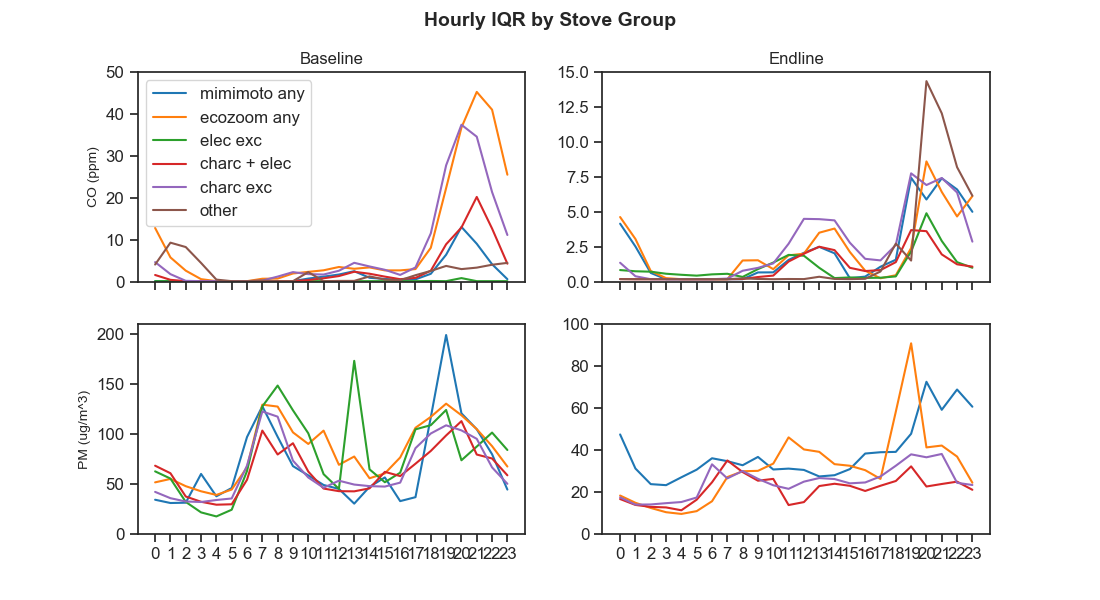

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

In [14]:
fig20, axes20 = plt.subplots(2, 2, figsize=(11,6),sharey=False, sharex=True)
sns.set(style="white",palette='viridis_r',font_scale=1.1)
sns.set_style("ticks")
fig20.suptitle('Hourly IQR by Stove Group', size=14,fontweight='bold')

#2019 CO
axes20[0,0].plot(CO_hr_19_MM_stats.index.values, CO_hr_19_MM_stats['50%'],label='mimimoto any')
axes20[0,0].plot(CO_hr_19_EZ_stats.index.values, CO_hr_19_EZ_stats['50%'],label='ecozoom any')
axes20[0,0].plot(CO_hr_19_ElecExc_stats.index.values, CO_hr_19_ElecExc_stats['50%'],label='elec exc')
axes20[0,0].plot(CO_hr_19_CharcElec_stats.index.values, CO_hr_19_CharcElec_stats['50%'],label='charc + elec')
axes20[0,0].plot(CO_hr_19_CharcExc_stats.index.values, CO_hr_19_CharcExc_stats['50%'],label='charc exc')
axes20[0,0].plot(CO_hr_19_other_stats.index.values, CO_hr_19_other_stats['50%'],label='other')
axes20[0,0].set_title('Baseline',size=12)
axes20[0,0].set_ylabel("CO (ppm)", fontsize=10)
axes20[0,0].legend(loc='upper left')
axes20[0,0].set_ylim((0,50))

# 2019 PM
axes20[1,0].plot(PM_hr_19_MM_stats.index.values, PM_hr_19_MM_stats['50%'],label='mimimoto any')
axes20[1,0].plot(PM_hr_19_EZ_stats.index.values, PM_hr_19_EZ_stats['50%'],label='ecozoom any')
axes20[1,0].plot(PM_hr_19_ElecExc_stats.index.values, PM_hr_19_ElecExc_stats['50%'],label='elec exc')
axes20[1,0].plot(PM_hr_19_CharcElec_stats.index.values, PM_hr_19_CharcElec_stats['50%'],label='charc + elec')
axes20[1,0].plot(PM_hr_19_CharcExc_stats.index.values, PM_hr_19_CharcExc_stats['50%'],label='charc exc')
axes20[1,0].plot(PM_hr_19_other_stats.index.values, PM_hr_19_other_stats['50%'],label='other')
axes20[1,0].set_ylabel("PM (ug/m^3)", fontsize=10)
axes20[1,0].set_ylim((0,210))

#2021 CO
axes20[0,1].plot(CO_hr_21_MM_stats.index.values, CO_hr_21_MM_stats['50%'],label='mimimoto any')
axes20[0,1].plot(CO_hr_21_EZ_stats.index.values, CO_hr_21_EZ_stats['50%'],label='ecozoom any')
axes20[0,1].plot(CO_hr_21_ElecExc_stats.index.values, CO_hr_21_ElecExc_stats['50%'],label='elec exc')
axes20[0,1].plot(CO_hr_21_CharcElec_stats.index.values, CO_hr_21_CharcElec_stats['50%'],label='charc + elec')
axes20[0,1].plot(CO_hr_21_CharcExc_stats.index.values, CO_hr_21_CharcExc_stats['50%'],label='charc exc')
axes20[0,1].plot(CO_hr_21_other_stats.index.values, CO_hr_21_other_stats['50%'],label='other')
axes20[0,1].set_title('Endline',size=12)
axes20[0,1].set_ylim((0,15))

# 2021 PM
axes20[1,1].plot(PM_hr_21_MM_stats.index.values, PM_hr_21_MM_stats['50%'],label='mimimoto any')
axes20[1,1].plot(PM_hr_21_EZ_stats.index.values, PM_hr_21_EZ_stats['50%'],label='ecozoom any')
axes20[1,1].plot(PM_hr_21_ElecExc_stats.index.values, PM_hr_21_ElecExc_stats['50%'],label='elec exc')
axes20[1,1].plot(PM_hr_21_CharcElec_stats.index.values, PM_hr_21_CharcElec_stats['50%'],label='charc + elec')
axes20[1,1].plot(PM_hr_21_CharcExc_stats.index.values, PM_hr_21_CharcExc_stats['50%'],label='charc exc')
axes20[1,1].plot(PM_hr_21_other_stats.index.values, PM_hr_21_other_stats['50%'],label='other')
axes20[1,1].set_ylim((0,100))

axes20[1,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

## Stratifying 24-hour CO and PM2.5 Averages by Survey Responses

### Load in two large CSVs of 2019 EM + survey data and 2021 EM + survey data:

In [15]:
db_19 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_EM_ODK_CSV.csv',encoding='latin1',index_col=False)
HHID_19 = db_19['HH ID']
CO_19 = db_19['24 hour CO avg (ppm)']
PM_19 = db_19['24 hour PM2.5 avg (ug/m^3)']
# adding two columns to splice into two dataframes based on stratification sample sizes later
db_19['CO_boxcount']= True
db_19['PM_boxcount']= True
db_19_CO_boxcount = db_19['CO_boxcount']
db_19_PM_boxcount = db_19['PM_boxcount']

db_21 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2021_EM_ODK_CSV.csv',encoding='latin1',index_col=False)
# adding two columns to splice into two dataframes based on stratification sample sizes later
db_21['CO_boxcount']= True
db_21['PM_boxcount']= True
db_21_CO_boxcount = db_21['CO_boxcount']
db_21_PM_boxcount = db_21['PM_boxcount']

HHID_21 = db_21['HH ID']
CO_21 = db_21['24 hour CO avg (ppm)']
PM_21 = db_21['24 hour PM2.5 avg (ug/m^3)']
VOC_21 = db_21['24 hour VOC avg (ppm)']

# here we will also note the WHO 24-hour guidelines for inclusion on plots
WHO_CO = 6   # ppm
WHO_PM = 35  # ug/m3

# create the palette we want to use for compounds
comps_color = ['#fdae61','#d7191c', '#abd9e9', '#2c7bb6']
# create the palette for stove indicators
stove_ind_grp2_color = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']

In [16]:
# determining if the HHs with times we are certain of vs. times we are not certain of are statistically different
from scipy.stats import ranksums

db_21_cert_CO = db_21[db_21["time_unc_mask_CO"]==0]
db_21_unc_CO = db_21[db_21["time_unc_mask_CO"]==1]
db_21_cert_CO_CO = db_21_cert_CO['24 hour CO avg (ppm)']
db_21_unc_CO_CO = db_21_unc_CO['24 hour CO avg (ppm)']

db_21_cert_PM = db_21[db_21["time_unc_mask_PM"]==0]
db_21_unc_PM = db_21[db_21["time_unc_mask_PM"]==1]
db_21_cert_PM_PM = db_21_cert_PM['24 hour PM2.5 avg (ug/m^3)']
db_21_unc_PM_PM = db_21_unc_PM['24 hour PM2.5 avg (ug/m^3)']

#ranksums(db_21_cert_CO_CO,db_21_unc_CO_CO) # accept - not stat different (0.789)
#ranksums(db_21_cert_PM_PM,db_21_unc_PM_PM) # accept - not stat different (0.219)

### By Compound:

In [19]:
# want to add sample sizes in the x labels
db_19['CO_names'] = db_19['Compound'].copy()
db_19['PM_names'] = db_19['Compound'].copy()
CO_names_19 = db_19.groupby(db_19["Compound"])["24 hour CO avg (ppm)"].count()
db_19['CO_names'] = db_19['CO_names'].replace('Kalingalinga','Kalingalinga$^+$\n(n='+str(CO_names_19[0])+')')
db_19['CO_names'] = db_19['CO_names'].replace('Kamanga','Kamanga\n(n='+str(CO_names_19[1])+')')
db_19['CO_names'] = db_19['CO_names'].replace('Matero','Matero\n(n='+str(CO_names_19[2])+')')
db_19['CO_names'] = db_19['CO_names'].replace("Ng'ombe","Ng'ombe$^+$\n(n="+str(CO_names_19[3])+')')
PM_names_19 = db_19.groupby(db_19["Compound"])["24 hour PM2.5 avg (ug/m^3)"].count()
db_19['PM_names'] = db_19['PM_names'].replace('Kalingalinga','Kalingalinga$^+$\n(n='+str(PM_names_19[0])+')')
db_19['PM_names'] = db_19['PM_names'].replace('Kamanga','Kamanga\n(n='+str(PM_names_19[1])+')')
db_19['PM_names'] = db_19['PM_names'].replace('Matero','Matero\n(n='+str(PM_names_19[2])+')')
db_19['PM_names'] = db_19['PM_names'].replace("Ng'ombe","Ng'ombe$^+$\n(n="+str(PM_names_19[3])+')')

db_21['CO_names'] = db_21['Compound'].copy()
db_21['PM_names'] = db_21['Compound'].copy()
CO_names_21 = db_21.groupby(db_21["Compound"])["24 hour CO avg (ppm)"].count()
db_21['CO_names'] = db_21['CO_names'].replace('Kalingalinga','Kalingalinga\n(n='+str(CO_names_21[0])+')')
db_21['CO_names'] = db_21['CO_names'].replace('Kamanga','Kamanga\n(n='+str(CO_names_21[1])+')')
db_21['CO_names'] = db_21['CO_names'].replace('Matero','Matero\n(n='+str(CO_names_21[2])+')')
db_21['CO_names'] = db_21['CO_names'].replace("Ng'ombe","Ng'ombe\n(n="+str(CO_names_21[3])+')')
PM_names_21 = db_21.groupby(db_21["Compound"])["24 hour PM2.5 avg (ug/m^3)"].count()
db_21['PM_names'] = db_21['PM_names'].replace('Kalingalinga','Kalingalinga\n(n='+str(PM_names_21[0])+')')
db_21['PM_names'] = db_21['PM_names'].replace('Kamanga','Kamanga\n(n='+str(PM_names_21[1])+')')
db_21['PM_names'] = db_21['PM_names'].replace('Matero','Matero\n(n='+str(PM_names_21[2])+')')
db_21['PM_names'] = db_21['PM_names'].replace("Ng'ombe","Ng'ombe\n(n="+str(PM_names_21[3])+')')

In [20]:
# Because some of our stratification have less than 10 data points in a category, we need to splice them into two dataframes
# to only make boxplots of > 10 data points

comp_19 = db_19['Compound']
comp_19_avgs = db_19.groupby("Compound").mean()
comp_21 = db_21['Compound']
comp_21_avgs = db_21.groupby("Compound").mean()

# adding two columns to splice into two dataframes based on stratification sample sizes
db_19['CO_boxcount']= True
db_19['PM_boxcount']= True
db_19_CO_boxcount = db_19['CO_boxcount']
db_19_PM_boxcount = db_19['PM_boxcount']
db_21['CO_boxcount']= True
db_21['PM_boxcount']= True
db_21_CO_boxcount = db_21['CO_boxcount']
db_21_PM_boxcount = db_21['PM_boxcount']

# 2019 CO
df = db_19.groupby("Compound",as_index=False).agg({'24 hour CO avg (ppm)':['count']})
df.columns=['Compound','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['Compound']

for i in np.arange(len(df_box)):
    for j in np.arange(len(comp_19)):
        if comp_19[j] == df_box[i]:
            db_19_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_19_CO_box = db_19[db_19['CO_boxcount']==True]
db_19_CO_pnts = db_19[db_19['CO_boxcount']==False]

# 2019 PM
df = db_19.groupby("Compound",as_index=False).agg({'24 hour PM2.5 avg (ug/m^3)':['count']})
df.columns=['Compound','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['Compound']

for i in np.arange(len(df_box)):
    for j in np.arange(len(comp_19)):
        if comp_19[j] == df_box[i]:
            db_19_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_19_PM_box = db_19[db_19['PM_boxcount']==True]
db_19_PM_pnts = db_19[db_19['PM_boxcount']==False]

# 2021 CO
df = db_21.groupby("Compound",as_index=False).agg({'24 hour CO avg (ppm)':['count']})
df.columns=['Compound','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['Compound']

for i in np.arange(len(df_box)):
    for j in np.arange(len(comp_21)):
        if comp_21[j] == df_box[i]:
            db_21_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_21_CO_box = db_21[db_21['CO_boxcount']==True]
db_21_CO_pnts = db_21[db_21['CO_boxcount']==False]

# 2021 PM
df = db_21.groupby("Compound",as_index=False).agg({'24 hour PM2.5 avg (ug/m^3)':['count']})
df.columns=['Compound','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['Compound']

for i in np.arange(len(df_box)):
    for j in np.arange(len(comp_21)):
        if comp_21[j] == df_box[i]:
            db_21_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_21_PM_box = db_21[db_21['PM_boxcount']==True]
db_21_PM_pnts = db_21[db_21['PM_boxcount']==False]

<IPython.core.display.Javascript object>


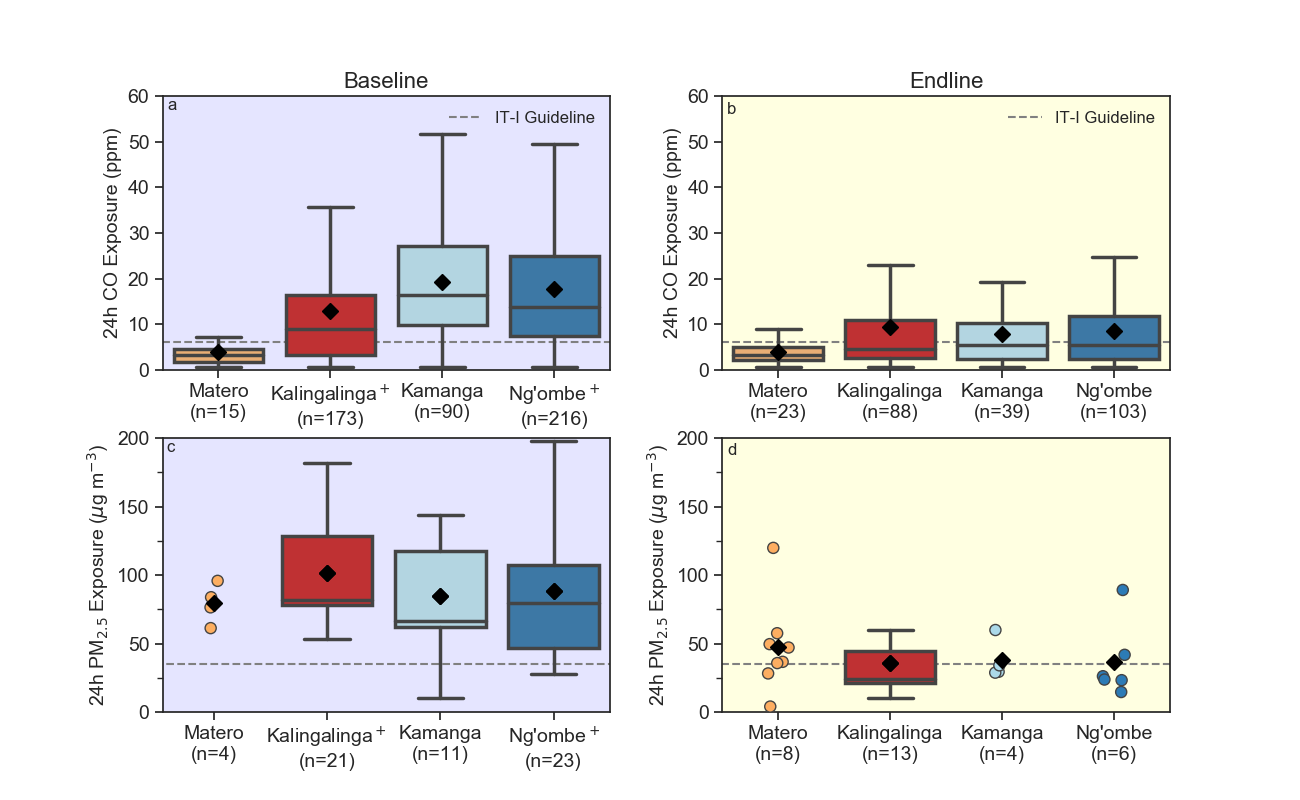

In [21]:
# set up multi-panel figure
#sns.set(style="white",palette="tab10",font_scale=1.1) # old color palette
sns.set(style="white",palette=comps_color,font_scale=1.1)
sns.set_style("ticks")
fig2, axes2 = plt.subplots(2, 2, figsize=(13,8),sharey=False, sharex=False)
#fig2.suptitle('By Compound', size=14,fontweight='bold')
# set background colors
axes2[0,0].set_facecolor('#E5E5FF') # baseline
axes2[1,0].set_facecolor('#E5E5FF') # baseline
axes2[0,1].set_facecolor('#FFFFE1') # endline
axes2[1,1].set_facecolor('#FFFFE1') # endline

# 2019
comp_19 = db_19['Compound']
comp_19_avgs = db_19.groupby("Compound").mean()

# 2019 CO
sns.boxplot(ax=axes2[0,0],x=db_19_CO_box['CO_names'],y=db_19_CO_box['24 hour CO avg (ppm)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
           order = ['Matero\n(n=15)','Kalingalinga$^+$\n(n=173)','Kamanga\n(n=90)',"Ng'ombe$^+$\n(n=216)"])
#axes2[0,0].plot([-1, 4], [15.79, 15.79],color='darkmagenta',linewidth=2) # baseline avg
axes2[0,0].set_title('Baseline',size=16)
axes2[0,0].set_ylabel("24h CO Exposure (ppm)", fontsize=14)
axes2[0,0].set_xlabel("", fontsize=12)
axes2[0,0].tick_params(labelsize=14)
axes2[0,0].set_ylim((0,60))
axes2[0,0].set_xlim((-0.5,3.5))
#axes2[0,0].plot([-1, 4], [WHO_CO, WHO_CO],color='gray',linestyle='--')
axes2[0,0].plot([-1, 4], [WHO_CO, WHO_CO],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')
axes2[0,0].text(-0.46,57, 'a', fontsize = 12)
axes2[0,0].legend(loc='best',frameon=False,fontsize=12)
#axes2[0,0].set_xticklabels(db_19_CO_box['CO_names']) - not working, need to figure out eventually
#fig2.legend(labels=["WHO 24-hour CO Guideline"])

# 2019 PM
sns.boxplot(ax=axes2[1,0],x=db_19_PM_box['PM_names'],y=db_19_PM_box['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Matero\n(n=4)','Kalingalinga$^+$\n(n=21)','Kamanga\n(n=11)',"Ng'ombe$^+$\n(n=23)"]) 
sns.stripplot(ax=axes2[1,0],x=db_19_PM_pnts['PM_names'],y=db_19_PM_pnts['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=1,size=8,
            order = ['Matero\n(n=4)','Kalingalinga$^+$\n(n=21)','Kamanga\n(n=11)',"Ng'ombe$^+$\n(n=23)"])
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes2[1,0],x=db_19['PM_names'],y=PM_19, linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Matero\n(n=4)','Kalingalinga$^+$\n(n=21)','Kamanga\n(n=11)',"Ng'ombe$^+$\n(n=23)"])
#axes2[1,0].plot([-1, 4], [91.9, 91.9],color='darkmagenta',linewidth=2) # baseline avg
#axes2[1,0].set_title('Baseline',size=14)
axes2[1,0].set_ylabel("24h PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=14)
axes2[1,0].set_xlabel("", fontsize=12)
axes2[1,0].tick_params(labelsize=14)
axes2[1,0].set_ylim((0,200))
axes2[1,0].yaxis.set_minor_locator(MultipleLocator(25))
axes2[1,0].set_xlim((-0.45,3.5))
axes2[1,0].text(-0.42,190, 'c', fontsize = 12)
#axes2[1,0].plot([-1, 4], [WHO_PM, WHO_PM],color='gray',linestyle='--')
axes2[1,0].plot([-1, 4], [WHO_PM, WHO_PM],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')
#axes2[1,0].legend(loc='best',frameon=False,fontsize=10)
#fig2.legend(labels=["WHO 24-hour PM Guideline"])

# 2021
comp_21 = db_21['Compound']
comp_21_avgs = db_21.groupby("Compound").mean()

# 2021 CO
sns.boxplot(ax=axes2[0,1],x=db_21_CO_box['CO_names'],y=db_21_CO_box['24 hour CO avg (ppm)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Matero\n(n=23)','Kalingalinga\n(n=88)','Kamanga\n(n=39)',"Ng'ombe\n(n=103)"])
#axes2[0,1].plot([-1, 4], [15.79, 15.79],color='darkmagenta',linewidth=2) # baseline avg
#axes2[0,1].plot([-1, 4], [8.29, 8.29],color='goldenrod',linewidth=2) # endline avg
axes2[0,1].set_title('Endline',size=16)
axes2[0,1].set_ylabel("24h CO Exposure (ppm)", fontsize=14)
axes2[0,1].set_xlabel("", fontsize=12)
axes2[0,1].tick_params(labelsize=14)
axes2[0,1].set_ylim((0,60))
axes2[0,1].set_xlim((-0.5,3.5))
axes2[0,1].text(-0.46,56, 'b', fontsize = 12)
#axes2[0,1].plot([-1, 4], [WHO_CO, WHO_CO],color='gray',linestyle='--')
axes2[0,1].plot([-1, 4], [WHO_CO, WHO_CO],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')
axes2[0,1].legend(loc='best',frameon=False,fontsize=12)
#fig2.legend(labels=["WHO 24-hour CO Guideline"])

# 2021 PM
sns.boxplot(ax=axes2[1,1],x=db_21_PM_box['PM_names'],y=db_21_PM_box['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Matero\n(n=8)','Kalingalinga\n(n=13)','Kamanga\n(n=4)',"Ng'ombe\n(n=6)"])
sns.stripplot(ax=axes2[1,1],x=db_21_PM_pnts['PM_names'],y=db_21_PM_pnts['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=1,size=8,
            order = ['Matero\n(n=8)','Kalingalinga\n(n=13)','Kamanga\n(n=4)',"Ng'ombe\n(n=6)"])
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes2[1,1],x=db_21['PM_names'],y=PM_21, linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Matero\n(n=8)','Kalingalinga\n(n=13)','Kamanga\n(n=4)',"Ng'ombe\n(n=6)"])
#axes2[1,1].plot([-1, 4], [91.9, 91.9],color='darkmagenta',linewidth=2) # baseline avg
#axes2[1,1].plot([-1, 4], [39.26, 39.26],color='goldenrod',linewidth=2) # endline avg
#axes2[1,1].set_title('Endline',size=14)
axes2[1,1].set_ylabel("24h PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=14)
axes2[1,1].set_xlabel("", fontsize=12)
axes2[1,1].tick_params(labelsize=14)
axes2[1,1].set_ylim((0,200))
axes2[1,1].yaxis.set_minor_locator(MultipleLocator(25))
axes2[1,1].set_xlim((-0.5,3.5))
axes2[1,1].text(-0.45,188, 'd', fontsize = 12)
#axes2[1,1].plot([-1, 4], [WHO_PM, WHO_PM],color='gray',linestyle='--')
axes2[1,1].plot([-1, 4], [WHO_PM, WHO_PM],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')
#axes2[1,1].legend(loc='best',frameon=False,fontsize=10)
#fig2.legend(labels=["WHO 24-hour PM Guideline"])

plt.subplots_adjust(wspace=0.25,hspace=0.25)
fig2.savefig('24hravg_CO_PM_comps.jpg',transparent=False)

### By Reported Primary Stove:

In [22]:
# 2019
# adding abbreviated primary stove names as a column for plotting
db_19['prim_stove_plot']=db_19['primary_stove'].copy()
db_19['prim_stove_plot'] = db_19['prim_stove_plot'].replace('electric_oven','elec')
db_19['prim_stove_plot'] = db_19['prim_stove_plot'].replace('electric_nooven','elec')
db_19['prim_stove_plot'] = db_19['prim_stove_plot'].replace('improvedcharcoal','impr charc')
db_19['prim_stove_plot'] = db_19['prim_stove_plot'].replace('threestone','TSF')

prim_stove_19 = db_19['prim_stove_plot']
prim_stove_19_avgs = db_19.groupby("prim_stove_plot").mean()

# 2021
# adding abbreviated stove names as a column for plotting
db_21['prim_stove_plot']=db_21['prim_stove_end'].copy()
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Electric cooker with an oven','elec')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Electric cooker without an oven','elec')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('electric_oven','elec')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Gas cooker','gas')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Improved fuelwood stove','impr wood')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Improved metal charcoal brazier (mbaula)','impr charc')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('improvedcharcoal','impr charc')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('MimiMoto/pellet stove','mimimoto')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Traditional metal charcoal stove/brazier (mbaula)','mbaula')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Traditional three stone','TSF')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('VITALITE/EcoZoom improved charcoal stove','ecozoom')
db_21['prim_stove_plot'] = db_21['prim_stove_plot'].replace('Other, specify','other')

prim_stove_21 = db_21['prim_stove_plot']
prim_stove_21_avgs = db_21.groupby("prim_stove_plot").mean()

In [23]:
# Because some of our stratification have less than 10 data points in a category, we need to splice them into two dataframes
# to only make boxplots of > 10 data points

# adding two columns to splice into two dataframes based on stratification sample sizes
db_19['CO_boxcount']= True
db_19['PM_boxcount']= True
db_19_CO_boxcount = db_19['CO_boxcount']
db_19_PM_boxcount = db_19['PM_boxcount']
db_21['CO_boxcount']= True
db_21['PM_boxcount']= True
db_21_CO_boxcount = db_21['CO_boxcount']
db_21_PM_boxcount = db_21['PM_boxcount']

# 2019 CO
df = db_19.groupby("prim_stove_plot",as_index=False).agg({'24 hour CO avg (ppm)':['count']})
df.columns=['prim_stove_plot','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['prim_stove_plot']

for i in np.arange(len(df_box)):
    for j in np.arange(len(prim_stove_19)):
        if prim_stove_19[j] == df_box[i]:
            db_19_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_19_CO_box = db_19[db_19['CO_boxcount']==True]
db_19_CO_pnts = db_19[db_19['CO_boxcount']==False]

# 2019 PM
df = db_19.groupby("prim_stove_plot",as_index=False).agg({'24 hour PM2.5 avg (ug/m^3)':['count']})
df.columns=['prim_stove_plot','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['prim_stove_plot']

for i in np.arange(len(df_box)):
    for j in np.arange(len(prim_stove_19)):
        if prim_stove_19[j] == df_box[i]:
            db_19_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_19_PM_box = db_19[db_19['PM_boxcount']==True]
db_19_PM_pnts = db_19[db_19['PM_boxcount']==False]

# 2021 CO
df = db_21.groupby("prim_stove_plot",as_index=False).agg({'24 hour CO avg (ppm)':['count']})
df.columns=['prim_stove_plot','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['prim_stove_plot']

for i in np.arange(len(df_box)):
    for j in np.arange(len(prim_stove_21)):
        if prim_stove_21[j] == df_box[i]:
            db_21_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_21_CO_box = db_21[db_21['CO_boxcount']==True]
db_21_CO_pnts = db_21[db_21['CO_boxcount']==False]

# 2021 PM
df = db_21.groupby("prim_stove_plot",as_index=False).agg({'24 hour PM2.5 avg (ug/m^3)':['count']})
df.columns=['prim_stove_plot','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['prim_stove_plot']

for i in np.arange(len(df_box)):
    for j in np.arange(len(prim_stove_21)):
        if prim_stove_21[j] == df_box[i]:
            db_21_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_21_PM_box = db_21[db_21['PM_boxcount']==True]
db_21_PM_pnts = db_21[db_21['PM_boxcount']==False]

<IPython.core.display.Javascript object>


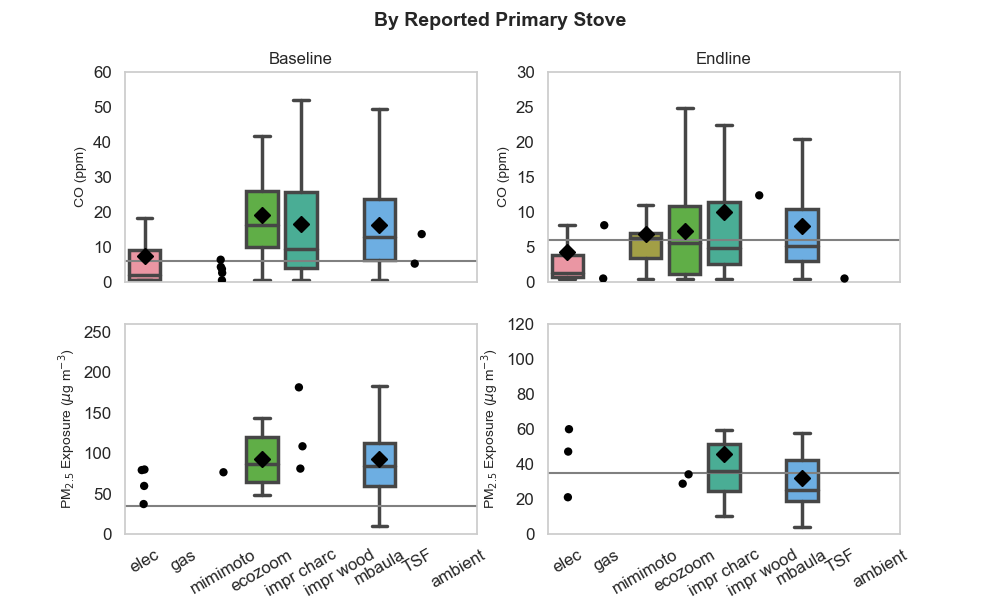

[Text(0, 0, 'elec'),
 Text(0, 0, 'gas'),
 Text(0, 0, 'mimimoto'),
 Text(0, 0, 'ecozoom'),
 Text(0, 0, 'impr charc'),
 Text(0, 0, 'impr wood'),
 Text(0, 0, 'mbaula'),
 Text(0, 0, 'TSF'),
 Text(0, 0, 'ambient')]

In [26]:
# set up multi-panel figure
sns.set_style("whitegrid", {'axes.grid' : False})
fig2, axes2 = plt.subplots(2, 2, figsize=(10,6),sharey=False, sharex=True)
fig2.suptitle('By Reported Primary Stove', size=14,fontweight='bold')

# 2019 CO
sns.boxplot(ax=axes2[0,0],x=db_19_CO_box['prim_stove_plot'],y=db_19_CO_box['24 hour CO avg (ppm)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'],
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"})
sns.stripplot(ax=axes2[0,0],x=db_19_CO_pnts['prim_stove_plot'],y=db_19_CO_pnts['24 hour CO avg (ppm)'],
              linewidth=0,size=6, color="black",
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'])

axes2[0,0].set_title('Baseline',size=12)
axes2[0,0].set_ylabel("CO (ppm)", fontsize=10)
axes2[0,0].set_xlabel("", fontsize=10)
axes2[0,0].set_ylim((0,60))
axes2[0,0].set_xlim((-0.5,8.5))
axes2[0,0].plot([-1, 11], [WHO_CO, WHO_CO],color='gray')
axes2[0,0].set_xticklabels(axes2[0,0].get_xticklabels(),rotation=30)
#fig1.legend(labels=["WHO 24-hour CO Guideline"])

# 2019 PM
sns.boxplot(ax=axes2[1,0],x=db_19_PM_box['prim_stove_plot'],y=db_19_PM_box['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'],
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"})
sns.stripplot(ax=axes2[1,0],x=db_19_PM_pnts['prim_stove_plot'],y=db_19_PM_pnts['24 hour PM2.5 avg (ug/m^3)'],
              linewidth=0,size=6, color="black",
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'])
# add ambient PM boxplot
#sns.boxplot(ax=axes2[1,0], x=PA_Kabwe_concat['loc'], y=PA_Kabwe_concat["PM_2pt5"],data=PA_Kabwe_concat, linewidth=2.5,showfliers=False,showmeans=True,
#            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'],
#            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"})
axes2[1,0].set_ylabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=10)
axes2[1,0].set_ylim((0,260))
axes2[1,0].set_xlim((-0.5,8.5))
axes2[1,0].plot([-1, 11], [WHO_PM, WHO_PM],color='gray')
axes2[1,0].set_xticklabels(axes2[1,0].get_xticklabels(),rotation=30)
#fig2.legend(labels=["WHO 24-hour PM Guideline"])

# 2021 CO
sns.boxplot(ax=axes2[0,1],x=db_21_CO_box['prim_stove_plot'],y=db_21_CO_box['24 hour CO avg (ppm)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'],
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"})
sns.stripplot(ax=axes2[0,1],x=db_21_CO_pnts['prim_stove_plot'],y=db_21_CO_pnts['24 hour CO avg (ppm)'],
              linewidth=0,size=6, color="black",
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'])
axes2[0,1].set_title('Endline',size=12)
axes2[0,1].set_ylabel("CO (ppm)", fontsize=10)
axes2[0,1].set_xlabel("", fontsize=10)
axes2[0,1].set_ylim((0,30))
axes2[0,1].set_xlim((-0.5,8.5))
axes2[0,1].plot([-1, 11], [WHO_CO, WHO_CO],color='gray')
axes2[0,1].set_xticklabels(axes2[0,1].get_xticklabels(),rotation=30)
#fig1.legend(labels=["WHO 24-hour CO Guideline"])

# 2021 PM
sns.boxplot(ax=axes2[1,1],x=db_21_PM_box['prim_stove_plot'],y=db_21_PM_box['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'],
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"})
sns.stripplot(ax=axes2[1,1],x=db_21_PM_pnts['prim_stove_plot'],y=db_21_PM_pnts['24 hour PM2.5 avg (ug/m^3)'],
              linewidth=0,size=6, color="black",
            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'])
# add ambient PM boxplot
#sns.boxplot(ax=axes2[1,1], x=PA_Lusaka_concat['loc'], y=PA_Lusaka_concat["PM_2pt5"],data=PA_Lusaka_concat, linewidth=2.5,showfliers=False,showmeans=True,
#            order=['elec','gas','mimimoto','ecozoom','impr charc','impr wood','mbaula','TSF','ambient'],
#            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"})
axes2[1,1].set_ylabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=10)
axes2[1,1].set_ylim((0,120))
axes2[1,1].set_xlim((-0.5,8.5))
axes2[1,1].plot([-1, 11], [WHO_PM, WHO_PM],color='gray')
axes2[1,1].set_xticklabels(axes2[1,1].get_xticklabels(),rotation=30)
#fig2.legend(labels=["WHO 24-hour PM Guideline"])


#### Want to Make Boxplots with different jitter colors to show that prim vs. sec users aren't different

In [32]:
# load in cross sectional csv
db_CSA = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_Cross_Sectional_All_EM_CSV.csv',encoding='latin1',index_col=False)

# easier for plotting to rename some data now
db_CSA['jitter_hue'] = db_CSA['jitter_hue'].replace(1,'primary stove users')
db_CSA['jitter_hue'] = db_CSA['jitter_hue'].replace(2,'secondary stove users')

# want to add sample sizes in the x labels
db_CSA['CO_names'] = db_CSA['stove_ind_grp2'].copy()
db_CSA['PM_names'] = db_CSA['stove_ind_grp2'].copy()
CO_names = db_CSA.groupby(db_CSA["stove_ind_grp2"])["CO"].count()
db_CSA['CO_names'] = db_CSA['CO_names'].replace('charc exc','Charc\nExc\n(n='+str(CO_names[0])+')')
db_CSA['CO_names'] = db_CSA['CO_names'].replace('eco any','EcoZ\nAny\n(n='+str(CO_names[1])+')')
db_CSA['CO_names'] = db_CSA['CO_names'].replace('elec + charc','Elec &\nCharc\n(n='+str(CO_names[2])+')')
db_CSA['CO_names'] = db_CSA['CO_names'].replace('elec exc','Elec\nExc\n(n='+str(CO_names[3])+')')
db_CSA['CO_names'] = db_CSA['CO_names'].replace('mm any','MM\nAny\n(n='+str(CO_names[4])+')')
db_CSA['CO_names'] = db_CSA['CO_names'].replace('other','Other\n(n='+str(CO_names[5])+')')
PM_names = db_CSA.groupby(db_CSA["stove_ind_grp2"])["PM"].count()
db_CSA['PM_names'] = db_CSA['PM_names'].replace('charc exc','Charc\nExc\n(n='+str(PM_names[0])+')')
db_CSA['PM_names'] = db_CSA['PM_names'].replace('eco any','EcoZ\nAny\n(n='+str(PM_names[1])+')')
db_CSA['PM_names'] = db_CSA['PM_names'].replace('elec + charc','Elec &\nCharc\n(n='+str(PM_names[2])+')')
db_CSA['PM_names'] = db_CSA['PM_names'].replace('elec exc','Elec\nExc\n(n='+str(PM_names[3])+')')
db_CSA['PM_names'] = db_CSA['PM_names'].replace('mm any','MM\nAny\n(n='+str(PM_names[4])+')')
db_CSA['PM_names'] = db_CSA['PM_names'].replace('other','Other\n(n='+str(PM_names[5])+')')

In [33]:
# Because some of our stratification have less than 10 data points in a category, we need to splice them into two dataframes
# to only make boxplots of > 10 data points

stovegrp2 = db_CSA['stove_ind_grp2']
stovegrp2_avgs = db_CSA.groupby("stove_ind_grp2").mean()

# adding two columns to splice into two dataframes based on stratification sample sizes
db_CSA['CO_boxcount']= True
db_CSA['PM_boxcount']= True
db_CSA_CO_boxcount = db_CSA['CO_boxcount']
db_CSA_PM_boxcount = db_CSA['PM_boxcount']

# CO
df = db_CSA.groupby("stove_ind_grp2",as_index=False).agg({'CO':['count']})
df.columns=['stove_ind_grp2','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['stove_ind_grp2']

for i in np.arange(len(df_box)):
    for j in np.arange(len(stovegrp2)):
        if stovegrp2[j] == df_box[i]:
            db_CSA_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_CSA_CO_box = db_CSA[db_CSA['CO_boxcount']==True]
db_CSA_CO_pnts = db_CSA[db_CSA['CO_boxcount']==False]

# PM
df = db_CSA.groupby("stove_ind_grp2",as_index=False).agg({'PM':['count']})
df.columns=['stove_ind_grp2','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['stove_ind_grp2']

for i in np.arange(len(df_box)):
    for j in np.arange(len(stovegrp2)):
        if stovegrp2[j] == df_box[i]:
            db_CSA_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_CSA_PM_box = db_CSA[db_CSA['PM_boxcount']==True]
db_CSA_PM_pnts = db_CSA[db_CSA['PM_boxcount']==False]

<IPython.core.display.Javascript object>


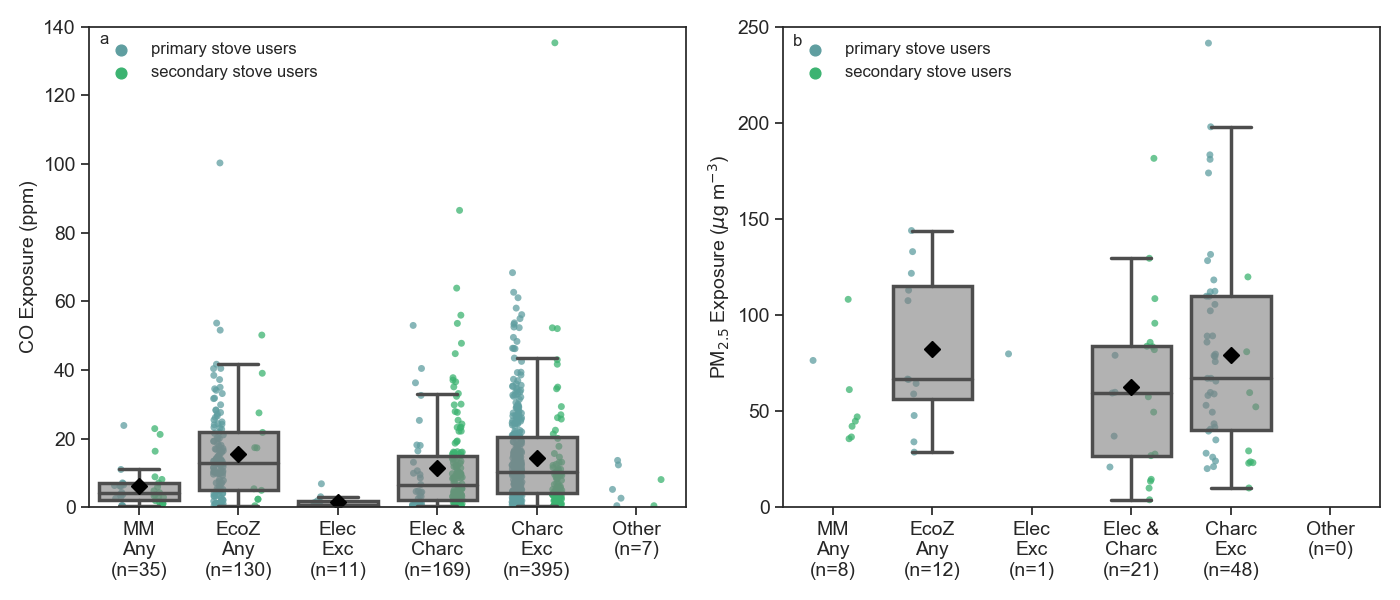

In [34]:
# set up multi-panel figure
#sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(style="white",font_scale=1.1)
sns.set_style("ticks")
fig4, axes4 = plt.subplots(1, 2, figsize=(14,6),sharey=False, sharex=False)
#fig4.suptitle('By Stove Indicator Group 2 and Prim vs Sec Use', size=14,fontweight='bold')

# CO
ax = sns.boxplot(ax=axes4[0],x=db_CSA_CO_box['CO_names'],y=db_CSA_CO_box['CO'],
            linewidth=2.5,showfliers=False,showmeans=True,color='gray',
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=35)','EcoZ\nAny\n(n=130)','Elec\nExc\n(n=11)','Elec &\nCharc\n(n=169)',
                    'Charc\nExc\n(n=395)','Other\n(n=7)'])
# adding transparency to colors
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, 0.6))
sns.stripplot(ax=axes4[0],x=db_CSA['CO_names'],y=db_CSA['CO'],zorder=0,
            linewidth=1,size=5, hue=db_CSA['jitter_hue'], dodge=True, palette=['cadetblue','mediumseagreen'],
            edgecolor='none',alpha=0.75,
            order = ['MM\nAny\n(n=35)','EcoZ\nAny\n(n=130)','Elec\nExc\n(n=11)','Elec &\nCharc\n(n=169)',
                    'Charc\nExc\n(n=395)','Other\n(n=7)'])
# jitter=0.25 to adjust jitter width
#axes4[0].set_title('Endline',size=14)
axes4[0].set_ylabel("CO Exposure (ppm)", fontsize=14)
axes4[0].tick_params(labelsize=14)
axes4[0].set_xlabel("", fontsize=12)
axes4[0].set_ylim((0,140))
axes4[0].set_xlim((-0.5,5.5))
axes4[0].text(-0.4,135, 'a', fontsize = 12)
#axes4[0].plot([-1, 8], [WHO_CO, WHO_CO],color='gray')
axes4[0].legend(loc='upperleft',frameon=False,fontsize = 12)

# PM
ax = sns.boxplot(ax=axes4[1],x=db_CSA_PM_box['PM_names'],y=db_CSA_PM_box['PM'],
            linewidth=2.5,showfliers=False,showmeans=True,color='gray',
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=8)','EcoZ\nAny\n(n=12)','Elec\nExc\n(n=1)','Elec &\nCharc\n(n=21)',
                    'Charc\nExc\n(n=48)','Other\n(n=0)'])
# adding transparency to colors
for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, 0.6))
sns.stripplot(ax=axes4[1],x=db_CSA['PM_names'],y=db_CSA['PM'],zorder=0,
            linewidth=1,size=5, hue=db_CSA['jitter_hue'], dodge=True, palette=['cadetblue','mediumseagreen'],
            edgecolor='none',alpha=0.75,
            order = ['MM\nAny\n(n=8)','EcoZ\nAny\n(n=12)','Elec\nExc\n(n=1)','Elec &\nCharc\n(n=21)',
                    'Charc\nExc\n(n=48)','Other\n(n=0)'])
# jitter=0.25 to adjust jitter width
#axes4[1].set_title('Endline',size=14)
axes4[1].set_ylabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=14)
axes4[1].set_xlabel("", fontsize=12)
axes4[1].tick_params(labelsize=14)
axes4[1].set_ylim((0,250))
axes4[1].set_xlim((-0.5,5.5))
axes4[1].text(-0.4,240, 'b', fontsize = 12)
#axes4[1].plot([-1, 8], [WHO_PM, WHO_PM],color='gray')
axes4[1].legend(loc='upperleft', frameon=False,fontsize = 12)

fig4.tight_layout()
fig4.savefig('stovegroup2_primsec_jitter.jpg',transparent=True)

In [35]:
# sig testing between the different groups
db_CSA_CO = db_CSA.dropna(subset=['CO'])
db_CSA_PM = db_CSA.dropna(subset=['PM'])

stove_group_CO = db_CSA_CO[db_CSA_CO['stove_ind_grp2']=='charc exc']
prim_group_CO = stove_group_CO[stove_group_CO['jitter_hue']=='primary stove users']
sec_group_CO = stove_group_CO[stove_group_CO['jitter_hue']=='secondary stove users']

stove_group_PM = db_CSA_PM[db_CSA_PM['stove_ind_grp2']=='charc exc']
prim_group_PM = stove_group_PM[stove_group_PM['jitter_hue']=='primary stove users']
sec_group_PM = stove_group_PM[stove_group_PM['jitter_hue']=='secondary stove users']

# rank sum
from scipy.stats import ranksums

#ranksums(prim_group_CO['CO'],sec_group_CO['CO'])
ranksums(prim_group_PM['PM'],sec_group_PM['PM'])

RanksumsResult(statistic=2.258422227488433, pvalue=0.023919348247949942)

In [206]:
# p-values:
# mm any CO: 0.82
# mm any PM: 0.28

# eco any CO: 0.85
# eco any PM: na

# elec exc: na

# elec & charc CO: 0.001***
# elec & charc PM: 0.62

# charc exc CO: 1.54e-05***
# charc exc PM: 0.024***

# other CO: 0.44
# other PM: na

#### Trying to show the table I made with % total and % group in a stack bar chart form

In [37]:
# make dataframe of percentages - from "Tables for Paper_7Sept2022.xlsx"
df_stovegrp2_perc = pd.DataFrame({'primary stove users': [4.95,17.3,1,5.67,38.5,0.85],'secondary stove users': [4.05,1.7,0,15.3,11.5,0.15]},
                                index=['MM Any\n(n=215)','EcoZ Any\n(n=450)','Elec Exc\n(n=30)',
                                      'Elec & Charc\n(n=497)','Charc Exc\n(n=1213)','Other\n(n=13)'])

<IPython.core.display.Javascript object>


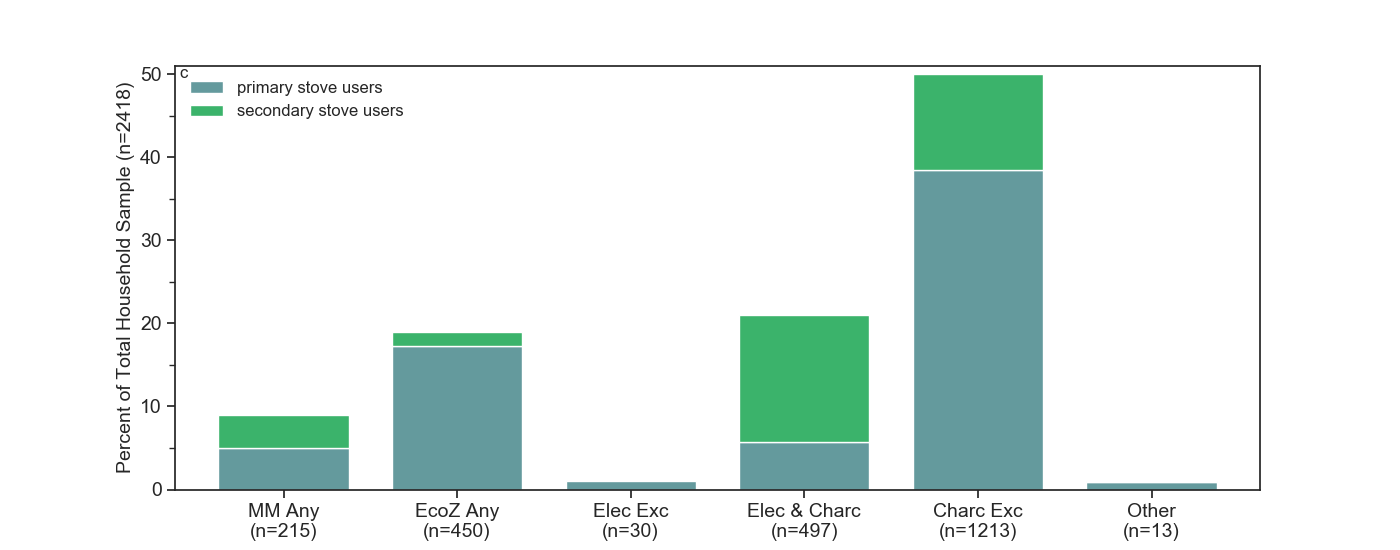

In [38]:
sns.set(style="white",font_scale=1.1)
sns.set_style("ticks")
fig5, axes5 = plt.subplots(1, 1, figsize=(14,5.5),sharey=False, sharex=False)
#fig5.suptitle('By Stove Indicator Group 2 and Prim vs Sec Use - All', size=14,fontweight='bold')

df_stovegrp2_perc.plot(kind='bar',stacked=True,ax=axes5,width=0.75,color=['#649A9D','#3BB36B'])
plt.xticks(rotation=0)
axes5.set_ylim((0,51))
axes5.yaxis.set_minor_locator(MultipleLocator(5))
axes5.set_ylabel("Percent of Total Household Sample (n=2418)", fontsize=14)
axes5.text(-0.6,49.5, 'c', fontsize = 12)
axes5.tick_params(labelsize=14)
axes5.legend(loc='upperleft', frameon=False, fontsize = 12)

fig5.savefig('stovegroup2_primsec_perctotal.jpg',transparent=True)

### By Stove Indicator Group 3:

In [39]:
# want to add sample sizes in the x labels
db_19['CO_names'] = db_19['stove_ind_grp3'].copy()
db_19['PM_names'] = db_19['stove_ind_grp3'].copy()
CO_names_19 = db_19.groupby(db_19["stove_ind_grp3"])["24 hour CO avg (ppm)"].count()
db_19['CO_names'] = db_19['CO_names'].replace('charc + elec','Charc &\nElec\n(n='+str(CO_names_19[0])+')')
db_19['CO_names'] = db_19['CO_names'].replace('eco any','EcoZ\nAny\n(n='+str(CO_names_19[1])+')')
db_19['CO_names'] = db_19['CO_names'].replace('elec + charc','Elec &\nCharc\n(n='+str(CO_names_19[2])+')')
db_19['CO_names'] = db_19['CO_names'].replace('elec exc','Elec\nExc\n(n='+str(CO_names_19[3])+')')
db_19['CO_names'] = db_19['CO_names'].replace('impr charc','Impr.\nCharc\n(n='+str(CO_names_19[4])+')')
db_19['CO_names'] = db_19['CO_names'].replace('mm any','MM\nAny\n(n='+str(CO_names_19[5])+')')
db_19['CO_names'] = db_19['CO_names'].replace('other','Other\n(n='+str(CO_names_19[6])+')')
db_19['CO_names'] = db_19['CO_names'].replace('trad charc','Trad.\nCharc\n(n='+str(CO_names_19[7])+')')
PM_names_19 = db_19.groupby(db_19["stove_ind_grp3"])["24 hour PM2.5 avg (ug/m^3)"].count()
db_19['PM_names'] = db_19['PM_names'].replace('charc + elec','Charc &\nElec\n(n='+str(PM_names_19[0])+')')
db_19['PM_names'] = db_19['PM_names'].replace('eco any','EcoZ\nAny\n(n='+str(PM_names_19[1])+')')
db_19['PM_names'] = db_19['PM_names'].replace('elec + charc','Elec &\nCharc\n(n='+str(PM_names_19[2])+')')
db_19['PM_names'] = db_19['PM_names'].replace('elec exc','Elec\nExc\n(n='+str(PM_names_19[3])+')')
db_19['PM_names'] = db_19['PM_names'].replace('impr charc','Impr.\nCharc\n(n='+str(PM_names_19[4])+')')
db_19['PM_names'] = db_19['PM_names'].replace('mm any','MM\nAny\n(n='+str(PM_names_19[5])+')')
db_19['PM_names'] = db_19['PM_names'].replace('other','Other\n(n='+str(PM_names_19[6])+')')
db_19['PM_names'] = db_19['PM_names'].replace('trad charc','Trad.\nCharc\n(n='+str(PM_names_19[7])+')')

db_21['CO_names'] = db_21['stove_ind_grp3'].copy()
db_21['PM_names'] = db_21['stove_ind_grp3'].copy()
CO_names_21 = db_21.groupby(db_21["stove_ind_grp3"])["24 hour CO avg (ppm)"].count()
db_21['CO_names'] = db_21['CO_names'].replace('charc + elec','Charc &\nElec\n(n='+str(CO_names_21[0])+')')
db_21['CO_names'] = db_21['CO_names'].replace('eco any','EcoZ\nAny\n(n='+str(CO_names_21[1])+')')
db_21['CO_names'] = db_21['CO_names'].replace('elec + charc','Elec &\nCharc\n(n='+str(CO_names_21[2])+')')
db_21['CO_names'] = db_21['CO_names'].replace('elec exc','Elec\nExc\n(n='+str(CO_names_21[3])+')')
db_21['CO_names'] = db_21['CO_names'].replace('impr charc','Impr.\nCharc\n(n='+str(CO_names_21[4])+')')
db_21['CO_names'] = db_21['CO_names'].replace('mm any','MM\nAny\n(n='+str(CO_names_21[5])+')')
db_21['CO_names'] = db_21['CO_names'].replace('other','Other\n(n='+str(CO_names_21[6])+')')
db_21['CO_names'] = db_21['CO_names'].replace('trad charc','Trad.\nCharc\n(n='+str(CO_names_21[7])+')')
PM_names_21 = db_21.groupby(db_21["stove_ind_grp3"])["24 hour PM2.5 avg (ug/m^3)"].count()
db_21['PM_names'] = db_21['PM_names'].replace('charc + elec','Charc &\nElec\n(n='+str(PM_names_21[0])+')')
db_21['PM_names'] = db_21['PM_names'].replace('eco any','EcoZ\nAny\n(n='+str(PM_names_21[1])+')')
db_21['PM_names'] = db_21['PM_names'].replace('elec + charc','Elec &\nCharc\n(n='+str(PM_names_21[2])+')')
db_21['PM_names'] = db_21['PM_names'].replace('elec exc','Elec\nExc\n(n='+str(PM_names_21[3])+')')
db_21['PM_names'] = db_21['PM_names'].replace('impr charc','Impr.\nCharc\n(n='+str(PM_names_21[4])+')')
db_21['PM_names'] = db_21['PM_names'].replace('mm any','MM\nAny\n(n='+str(PM_names_21[5])+')')
db_21['PM_names'] = db_21['PM_names'].replace('other','Other\n(n='+str(PM_names_21[6])+')')
db_21['PM_names'] = db_21['PM_names'].replace('trad charc','Trad.\nCharc\n(n='+str(PM_names_21[7])+')')

In [40]:
# Because some of our stratification have less than 10 data points in a category, we need to splice them into two dataframes
# to only make boxplots of > 10 data points

stove_ind_grp3_19 = db_19['stove_ind_grp3']
stove_ind_grp3_19_avgs = db_19.groupby("stove_ind_grp3").mean()
stove_ind_grp3_21 = db_21['stove_ind_grp3']
stove_ind_grp3_21_avgs = db_21.groupby("stove_ind_grp3").mean()

# adding two columns to splice into two dataframes based on stratification sample sizes
db_19['CO_boxcount']= True
db_19['PM_boxcount']= True
db_19_CO_boxcount = db_19['CO_boxcount']
db_19_PM_boxcount = db_19['PM_boxcount']
db_21['CO_boxcount']= True
db_21['PM_boxcount']= True
db_21_CO_boxcount = db_21['CO_boxcount']
db_21_PM_boxcount = db_21['PM_boxcount']

# 2019 CO
df = db_19.groupby("stove_ind_grp3",as_index=False).agg({'24 hour CO avg (ppm)':['count']})
df.columns=['stove_ind_grp3','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['stove_ind_grp3']

for i in np.arange(len(df_box)):
    for j in np.arange(len(stove_ind_grp3_19)):
        if stove_ind_grp3_19[j] == df_box[i]:
            db_19_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_19_CO_box = db_19[db_19['CO_boxcount']==True]
db_19_CO_pnts = db_19[db_19['CO_boxcount']==False]

# 2019 PM
df = db_19.groupby("stove_ind_grp3",as_index=False).agg({'24 hour PM2.5 avg (ug/m^3)':['count']})
df.columns=['stove_ind_grp3','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['stove_ind_grp3']

for i in np.arange(len(df_box)):
    for j in np.arange(len(stove_ind_grp3_19)):
        if stove_ind_grp3_19[j] == df_box[i]:
            db_19_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_19_PM_box = db_19[db_19['PM_boxcount']==True]
db_19_PM_pnts = db_19[db_19['PM_boxcount']==False]

# 2021 CO
df = db_21.groupby("stove_ind_grp3",as_index=False).agg({'24 hour CO avg (ppm)':['count']})
df.columns=['stove_ind_grp3','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['stove_ind_grp3']

for i in np.arange(len(df_box)):
    for j in np.arange(len(stove_ind_grp3_21)):
        if stove_ind_grp3_21[j] == df_box[i]:
            db_21_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_21_CO_box = db_21[db_21['CO_boxcount']==True]
db_21_CO_pnts = db_21[db_21['CO_boxcount']==False]

# 2021 PM
df = db_21.groupby("stove_ind_grp3",as_index=False).agg({'24 hour PM2.5 avg (ug/m^3)':['count']})
df.columns=['stove_ind_grp3','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['stove_ind_grp3']

for i in np.arange(len(df_box)):
    for j in np.arange(len(stove_ind_grp3_21)):
        if stove_ind_grp3_21[j] == df_box[i]:
            db_21_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_21_PM_box = db_21[db_21['PM_boxcount']==True]
db_21_PM_pnts = db_21[db_21['PM_boxcount']==False]

<IPython.core.display.Javascript object>


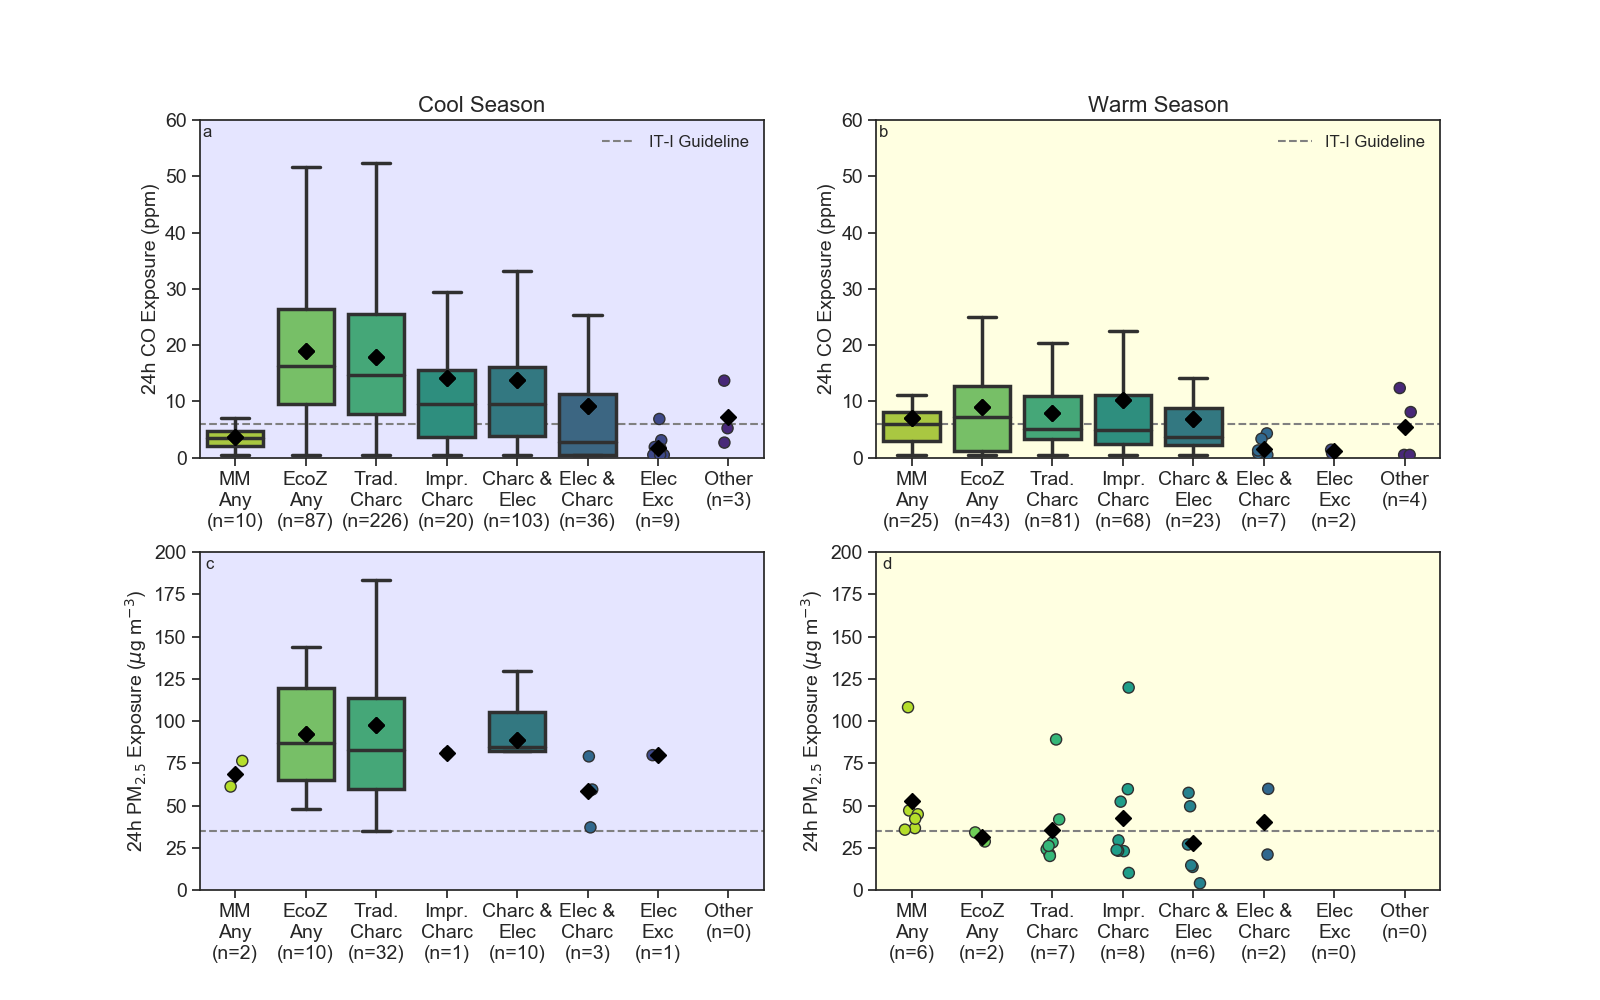

In [41]:
# 2019
stove_ind_grp3_19 = db_19['stove_ind_grp3']
stove_ind_grp3_avgs = db_19.groupby("stove_ind_grp3").mean()

# set up multi-panel figure
#sns.set_style("whitegrid", {'axes.grid' : False})
palette = sns.color_palette("viridis_r", 8) 
sns.set(style="white",palette=palette,font_scale=1.1)
sns.color_palette("viridis_r", 8)
sns.set_style("ticks")
fig6, axes6 = plt.subplots(2, 2, figsize=(16,10),sharey=False, sharex=False)
#fig6.suptitle('By Stove Indicator Group 3', size=14,fontweight='bold')
# set background colors
axes6[0,0].set_facecolor('#E5E5FF') # baseline
axes6[1,0].set_facecolor('#E5E5FF') # baseline
axes6[0,1].set_facecolor('#FFFFE1') # endline
axes6[1,1].set_facecolor('#FFFFE1') # endline

# 2019 CO
sns.boxplot(ax=axes6[0,0],x=db_19_CO_box['CO_names'],y=db_19_CO_box['24 hour CO avg (ppm)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=10)','EcoZ\nAny\n(n=87)','Trad.\nCharc\n(n=226)','Impr.\nCharc\n(n=20)',
                     'Charc &\nElec\n(n=103)','Elec &\nCharc\n(n=36)','Elec\nExc\n(n=9)','Other\n(n=3)']) 
sns.stripplot(ax=axes6[0,0],x=db_19_CO_pnts['CO_names'],y=db_19_CO_pnts['24 hour CO avg (ppm)'],
            linewidth=1,size=8,
            order = ['MM\nAny\n(n=10)','EcoZ\nAny\n(n=87)','Trad.\nCharc\n(n=226)','Impr.\nCharc\n(n=20)',
                     'Charc &\nElec\n(n=103)','Elec &\nCharc\n(n=36)','Elec\nExc\n(n=9)','Other\n(n=3)']) 
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes6[0,0],x=db_19['CO_names'],y=CO_19, linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=10)','EcoZ\nAny\n(n=87)','Trad.\nCharc\n(n=226)','Impr.\nCharc\n(n=20)',
                     'Charc &\nElec\n(n=103)','Elec &\nCharc\n(n=36)','Elec\nExc\n(n=9)','Other\n(n=3)']) 
#axes6[0,0].set_title('Baseline',size=16)
axes6[0,0].set_title('Cool Season',size=16)
axes6[0,0].set_ylabel("24h CO Exposure (ppm)", fontsize=14)
axes6[0,0].set_xlabel("", fontsize=12)
axes6[0,0].tick_params(labelsize=14)
axes6[0,0].set_ylim((0,60))
axes6[0,0].set_xlim((-0.5,7.5))
axes6[0,0].text(-0.46,57, 'a', fontsize = 12)
axes6[0,0].plot([-1, 8], [WHO_CO, WHO_CO],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')
axes6[0,0].legend(loc='best',frameon=False,fontsize=12)

# 2019 PM
sns.boxplot(ax=axes6[1,0],x=db_19_PM_box['PM_names'],y=db_19_PM_box['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=2)','EcoZ\nAny\n(n=10)', 'Trad.\nCharc\n(n=32)','Impr.\nCharc\n(n=1)',
                     'Charc &\nElec\n(n=10)','Elec &\nCharc\n(n=3)','Elec\nExc\n(n=1)','Other\n(n=0)'])
sns.stripplot(ax=axes6[1,0],x=db_19_PM_pnts['PM_names'],y=db_19_PM_pnts['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=1,size=8,
            order = ['MM\nAny\n(n=2)','EcoZ\nAny\n(n=10)','Trad.\nCharc\n(n=32)','Impr.\nCharc\n(n=1)',
                     'Charc &\nElec\n(n=10)','Elec &\nCharc\n(n=3)','Elec\nExc\n(n=1)','Other\n(n=0)'])
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes6[1,0],x=db_19['PM_names'],y=PM_19, linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=2)','EcoZ\nAny\n(n=10)', 'Trad.\nCharc\n(n=32)','Impr.\nCharc\n(n=1)',
                     'Charc &\nElec\n(n=10)','Elec &\nCharc\n(n=3)','Elec\nExc\n(n=1)','Other\n(n=0)'])
#axes6[1,0].set_title('2019 PM',size=12)
axes6[1,0].set_ylabel("24h PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=14)
axes6[1,0].set_xlabel("", fontsize=12)
axes6[1,0].tick_params(labelsize=14)
#axes6[1,0].set_xticklabels(axes3[1,0].get_xticklabels(),rotation=30)
axes6[1,0].set_ylim((0,200))
axes6[1,0].yaxis.set_minor_locator(MultipleLocator(25))
axes6[1,0].set_xlim((-0.5,7.5))
axes6[1,0].text(-0.42,190, 'c', fontsize = 12)
axes6[1,0].plot([-1, 8], [WHO_PM, WHO_PM],color='gray',label="IT-I Guideline",zorder=0, linestyle='--')

# 2021
stove_ind_grp3_21 = db_21['stove_ind_grp3']
stove_ind_grp3_21_avgs = db_21.groupby("stove_ind_grp3").mean()

# 2021 CO
sns.boxplot(ax=axes6[0,1],x=db_21_CO_box['CO_names'],y=db_21_CO_box['24 hour CO avg (ppm)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=25)','EcoZ\nAny\n(n=43)','Trad.\nCharc\n(n=81)','Impr.\nCharc\n(n=68)',
                     'Charc &\nElec\n(n=23)','Elec &\nCharc\n(n=7)','Elec\nExc\n(n=2)','Other\n(n=4)'])
sns.stripplot(ax=axes6[0,1],x=db_21_CO_pnts['CO_names'],y=db_21_CO_pnts['24 hour CO avg (ppm)'],
            linewidth=1,size=8,
            order = ['MM\nAny\n(n=25)','EcoZ\nAny\n(n=43)','Trad.\nCharc\n(n=81)','Impr.\nCharc\n(n=68)',
                     'Charc &\nElec\n(n=23)','Elec &\nCharc\n(n=7)','Elec\nExc\n(n=2)','Other\n(n=4)'])
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes6[0,1],x=db_21['CO_names'],y=CO_21, linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=25)','EcoZ\nAny\n(n=43)','Trad.\nCharc\n(n=81)','Impr.\nCharc\n(n=68)',
                     'Charc &\nElec\n(n=23)','Elec &\nCharc\n(n=7)','Elec\nExc\n(n=2)','Other\n(n=4)'])
#axes6[0,1].set_title('Endline',size=16)
axes6[0,1].set_title('Warm Season',size=16)
axes6[0,1].set_ylabel("24h CO Exposure (ppm)", fontsize=14)
axes6[0,1].set_xlabel("", fontsize=12)
axes6[0,1].tick_params(labelsize=14)
axes6[0,1].set_ylim((0,60))
axes6[0,1].set_xlim((-0.5,7.5))
axes6[0,1].plot([-1, 8], [WHO_CO, WHO_CO],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')
axes6[0,1].text(-0.46,57, 'b', fontsize = 12)
axes6[0,1].legend(loc='best',frameon=False,fontsize=12)

# 2021 PM
sns.boxplot(ax=axes6[1,1],x=db_21_PM_box['PM_names'],y=db_21_PM_box['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=6)','EcoZ\nAny\n(n=2)','Trad.\nCharc\n(n=7)','Impr.\nCharc\n(n=8)',
                     'Charc &\nElec\n(n=6)','Elec &\nCharc\n(n=2)','Elec\nExc\n(n=0)','Other\n(n=0)'])
sns.stripplot(ax=axes6[1,1],x=db_21_PM_pnts['PM_names'],y=db_21_PM_pnts['24 hour PM2.5 avg (ug/m^3)'],
            linewidth=1,size=8,
            order = ['MM\nAny\n(n=6)','EcoZ\nAny\n(n=2)','Trad.\nCharc\n(n=7)','Impr.\nCharc\n(n=8)',
                     'Charc &\nElec\n(n=6)','Elec &\nCharc\n(n=2)','Elec\nExc\n(n=0)','Other\n(n=0)'])
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes6[1,1],x=db_21['PM_names'],y=PM_21, linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['MM\nAny\n(n=6)','EcoZ\nAny\n(n=2)','Trad.\nCharc\n(n=7)','Impr.\nCharc\n(n=8)',
                     'Charc &\nElec\n(n=6)','Elec &\nCharc\n(n=2)','Elec\nExc\n(n=0)','Other\n(n=0)'])
axes6[1,1].set_ylabel("24h PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=14)
axes6[1,1].set_xlabel("", fontsize=12)
axes6[1,1].tick_params(labelsize=14)
#axes6[1,1].set_xticklabels(axes3[1,0].get_xticklabels(),rotation=30)
axes6[1,1].set_ylim((0,200))
axes6[1,1].yaxis.set_minor_locator(MultipleLocator(25))
axes6[1,1].set_xlim((-0.5,7.5))
axes6[1,1].text(-0.42,190, 'd', fontsize = 12)
axes6[1,1].plot([-1, 8], [WHO_PM, WHO_PM],color='gray',label="IT-I Guideline",zorder=0,linestyle='--')

plt.subplots_adjust(wspace=0.2,hspace=0.28)
fig6.savefig('24hravg_CO_PM_stove_ind_3.jpg',transparent=False)

### CO vs. PM EM:

<IPython.core.display.Javascript object>


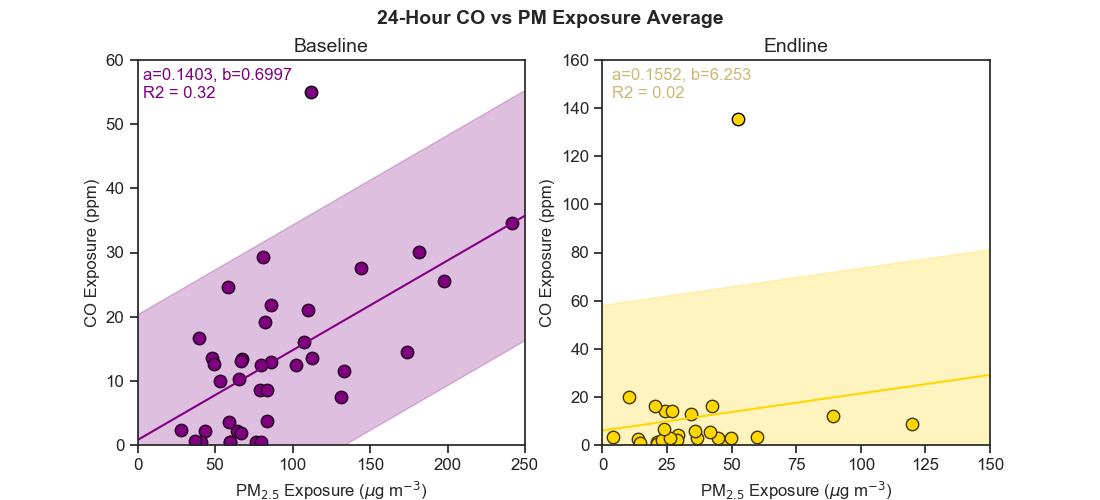

In [49]:
# scatter plot
# set up multi-panel figure
sns.set(style="white",palette="tab10",font_scale=1.1)
sns.set_style("ticks")
fig13, axes13 = plt.subplots(1, 2, figsize=(11,5),sharey=False, sharex=False)
fig13.suptitle('24-Hour CO vs PM Exposure Average', size=14,fontweight='bold')

# 2019 CO vs. PM
sns.scatterplot(ax=axes13[0],x=db_19['24 hour PM2.5 avg (ug/m^3)'], y=db_19['24 hour CO avg (ppm)'],
                color='purple',s=80,linewidth=1,edgecolor='black')
axes13[0].set_title('Baseline',size=14)
axes13[0].set_xlabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=12)
axes13[0].set_ylabel("CO Exposure (ppm)", fontsize=12)
#axes13[0].plot([0, 300],[0, 300],'--',color='gray')
axes13[0].set_xlim((0,250))
axes13[0].set_ylim((0,60))


# 2021 CO vs. PM
sns.scatterplot(ax=axes13[1],x=db_21['24 hour PM2.5 avg (ug/m^3)'], y=db_21['24 hour CO avg (ppm)'],
                color='gold',s=80,linewidth=1,edgecolor='black')
#sns.scatterplot(ax=axes13[1],x=db_21['24 hour PM2.5 avg (ug/m^3)'], y=db_21['24 hour CO avg (ppm)_no outlier'],
#                color='gold',s=80,linewidth=1,edgecolor='black')
axes13[1].set_title('Endline',size=14)
axes13[1].set_xlabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=12)
axes13[1].set_ylabel("CO Exposure (ppm)", fontsize=12)
#axes13[1].plot([0, 300],[0, 300],'--',color='gray')
axes13[1].set_xlim((0,150))
axes13[1].set_ylim((0,160))

# linear regression with R^2 calculated for both:
# first we need to remove nans for it to work (?)
db_19_nonans = db_19.dropna(subset=['24 hour PM2.5 avg (ug/m^3)','24 hour CO avg (ppm)'])
model_19 = np.polyfit(db_19_nonans['24 hour PM2.5 avg (ug/m^3)'],db_19_nonans['24 hour CO avg (ppm)'], 1)
predict_19 = np.poly1d(model_19)
R2_19 = r2_score(db_19_nonans['24 hour CO avg (ppm)'], predict_19(db_19_nonans['24 hour PM2.5 avg (ug/m^3)']))

db_21_nonans = db_21.dropna(subset=['24 hour PM2.5 avg (ug/m^3)','24 hour CO avg (ppm)'])
model_21 = np.polyfit(db_21_nonans['24 hour PM2.5 avg (ug/m^3)'],db_21_nonans['24 hour CO avg (ppm)'], 1)
predict_21 = np.poly1d(model_21)
R2_21 = r2_score(db_21_nonans['24 hour CO avg (ppm)'], predict_21(db_21_nonans['24 hour PM2.5 avg (ug/m^3)']))
#db_21_nonans = db_21.dropna(subset=['24 hour PM2.5 avg (ug/m^3)','24 hour CO avg (ppm)_no outlier'])
#model_21 = np.polyfit(db_21_nonans['24 hour PM2.5 avg (ug/m^3)'],db_21_nonans['24 hour CO avg (ppm)_no outlier'], 1)
#predict_21 = np.poly1d(model_21)
#R2_21 = r2_score(db_21_nonans['24 hour CO avg (ppm)_no outlier'], predict_21(db_21_nonans['24 hour PM2.5 avg (ug/m^3)']))

x_lin_reg = [0,300]
y_lin_reg_19 = predict_19(x_lin_reg)
y_lin_reg_21 = predict_21(x_lin_reg)

axes13[0].plot(x_lin_reg, y_lin_reg_19, color = 'purple')
axes13[0].text(3.5,57, 'a=0.1403, b=0.6997', fontsize = 12, color='purple')
axes13[0].text(3.5,54, 'R2 = 0.32', fontsize = 12,color='purple')

axes13[1].plot(x_lin_reg, y_lin_reg_21, c = 'gold')
axes13[1].text(3.5,152, 'a=0.1552, b=6.253', fontsize = 12, color='y')
axes13[1].text(3.5,144, 'R2 = 0.02', fontsize = 12,color='y')
#axes13[1].text(92,28.5, 'a=0.0164, b=6.235', fontsize = 12, color='y')
#axes13[1].text(92,27, 'R2 = 0.004', fontsize = 12,color='y')


# fit uncertainty
# 2019
x = db_19_nonans['24 hour PM2.5 avg (ug/m^3)']
y = db_19_nonans['24 hour CO avg (ppm)']
yhat19 = predict_19(x)                                           # or [p(z) for z in x]
ybar19 = np.sum(y)/len(y)                                        # or sum(y)/len(y)
ssreg19 = np.sum((yhat19-ybar19)**2)                             # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot19 = np.sum((y - ybar19)**2)                                # or sum([ (yi - ybar)**2 for yi in y])
syx19 = np.sqrt(np.sum((y-yhat19)**2)/(len(y)-2))                #standard error of the fit
fit_error19 = 2*syx19 # calculate fit uncertainty at 95%
rsq19 = ssreg19 / sstot19
axes13[0].fill_between(x_lin_reg, y_lin_reg_19-fit_error19, y_lin_reg_19+fit_error19, color='purple', alpha=0.25)

# 2021
x = db_21_nonans['24 hour PM2.5 avg (ug/m^3)']
y = db_21_nonans['24 hour CO avg (ppm)']
#y = db_21_nonans['24 hour CO avg (ppm)_no outlier']
yhat21 = predict_21(x)                                           # or [p(z) for z in x]
ybar21 = np.sum(y)/len(y)                                        # or sum(y)/len(y)
ssreg21 = np.sum((yhat21-ybar21)**2)                             # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot21 = np.sum((y - ybar21)**2)                                # or sum([ (yi - ybar)**2 for yi in y])
syx21 = np.sqrt(np.sum((y-yhat21)**2)/(len(y)-2))                #standard error of the fit
fit_error21 = 2*syx21 # calculate fit uncertainty at 95%
rsq21 = ssreg21 / sstot21
axes13[1].fill_between(x_lin_reg, y_lin_reg_21-fit_error21, y_lin_reg_21+fit_error21, color='gold', alpha=0.25)

fig13.savefig('CO_PM_scatter.png',transparent=True)

## Comparing 2019 and 2021 EM Data with Purple Air Data

### Load in, format, and average four CSVs: Lusaka PA data (CEEEZ, SupaMoto), Kabwe PA data 1 and 2

In [50]:
# these CSVs are downloaded from Purple Airs map website
PA_CEEEZ_A = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Purple Air\Data\CEEEZ - Parirenyetwa Rd (outside) (-15.412988 28.292583) Primary 60_minute_average 10_02_2021 11_20_2021.csv',encoding='latin1',index_col=False)
PA_SM_A = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Purple Air\Data\SupaMoto - Lunsemfwa Rd (outside) (-15.385041 28.328086) Primary 60_minute_average 10_02_2021 11_20_2021.csv',encoding='latin1',index_col=False)
PA_Kab1_A = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2019 Exposure Monitoring Analysis\PurpleAir Kabwe\Kabwe 1 (outside) (-14.454547 28.414965) Primary 60_minute_average 07_01_2019 08_31_2019.csv',encoding='latin1', index_col=False)
PA_Kab2_A = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2019 Exposure Monitoring Analysis\PurpleAir Kabwe\Kabwe 2 (outside) (-14.454275 28.413883) Primary 60_minute_average 06_30_2019 08_31_2019.csv',encoding='latin1', index_col=False)
PA_CEEEZ_B = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Purple Air\Data\CEEEZ - Parirenyetwa Rd B (undefined) (-15.412988 28.292583) Primary 60_minute_average 10_02_2021 11_20_2021.csv',encoding='latin1',index_col=False)
PA_SM_B = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Purple Air\Data\SupaMoto - Lunsemfwa Rd B (undefined) (-15.385041 28.328086) Primary 60_minute_average 10_02_2021 11_20_2021.csv',encoding='latin1',index_col=False)
PA_Kab1_B = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2019 Exposure Monitoring Analysis\PurpleAir Kabwe\Kabwe 1 B (undefined) (-14.454547 28.414965) Primary 60_minute_average 07_01_2019 08_31_2019.csv',encoding='latin1', index_col=False)
PA_Kab2_B = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2019 Exposure Monitoring Analysis\PurpleAir Kabwe\Kabwe 2 B (undefined) (-14.454275 28.413883) Primary 60_minute_average 06_30_2019 08_31_2019.csv',encoding='latin1', index_col=False)

# rename columns - need to distinguish btw A and B
PA_CEEEZ_A.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_A","PM2.5_CF1_ug/m3": "PM_2pt5_A",'UptimeMinutes':'UpMin_A',
    "PM10.0_CF1_ug/m3": "PM_10_A","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_A"}, inplace=True)
PA_SM_A.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_A","PM2.5_CF1_ug/m3": "PM_2pt5_A",'UptimeMinutes':'UpMin_A',
    "PM10.0_CF1_ug/m3": "PM_10_A","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_A"}, inplace=True)
PA_Kab1_A.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_A","PM2.5_CF1_ug/m3": "PM_2pt5_A",'UptimeMinutes':'UpMin_A',
    "PM10.0_CF1_ug/m3": "PM_10_A","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_A"}, inplace=True)
PA_Kab2_A.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_A","PM2.5_CF1_ug/m3": "PM_2pt5_A",'UptimeMinutes':'UpMin_A',
    "PM10.0_CF1_ug/m3": "PM_10_A","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_A"}, inplace=True)
PA_CEEEZ_B.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_B","PM2.5_CF1_ug/m3": "PM_2pt5_B",'UptimeMinutes':'UpMin_B',
    "PM10.0_CF1_ug/m3": "PM_10_B","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_B"}, inplace=True)
PA_SM_B.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_B","PM2.5_CF1_ug/m3": "PM_2pt5_B",'UptimeMinutes':'UpMin_B',
    "PM10.0_CF1_ug/m3": "PM_10_B","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_B"}, inplace=True)
PA_Kab1_B.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_B","PM2.5_CF1_ug/m3": "PM_2pt5_B",'UptimeMinutes':'UpMin_B',
    "PM10.0_CF1_ug/m3": "PM_10_B","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_B"}, inplace=True)
PA_Kab2_B.rename(columns={"created_at": "dt_UTC","PM1.0_CF1_ug/m3": "PM_1_B","PM2.5_CF1_ug/m3": "PM_2pt5_B",'UptimeMinutes':'UpMin_B',
    "PM10.0_CF1_ug/m3": "PM_10_B","Temperature_F": "temp_F","Humidity_%": "RH","PM2.5_ATM_ug/m3": "PM_2pt5_ATM_B"}, inplace=True)

In [51]:
# average A and B columns together for each PA
PA_CEEEZ = pd.merge(PA_CEEEZ_A,PA_CEEEZ_B, how='outer',on='dt_UTC')
PA_SM = pd.merge(PA_SM_A,PA_SM_B, how='outer',on='dt_UTC')
PA_Kab1 = pd.merge(PA_Kab1_A,PA_Kab1_B, how='outer',on='dt_UTC')
PA_Kab2 = pd.merge(PA_Kab2_A,PA_Kab2_B, how='outer',on='dt_UTC')

PA_CEEEZ['PM_2pt5']=np.nan
PA_SM['PM_2pt5']=np.nan
PA_Kab1['PM_2pt5']=np.nan
PA_Kab2['PM_2pt5']=np.nan

# nan out anything that is > 10 ugm3 different - only for PM2.5
for i in np.arange(len(PA_CEEEZ['dt_UTC'])):
    if (PA_CEEEZ['PM_2pt5_A'][i] - PA_CEEEZ['PM_2pt5_B'][i] <= 10):
        PA_CEEEZ['PM_2pt5'][i] = np.average([PA_CEEEZ['PM_2pt5_A'][i], PA_CEEEZ['PM_2pt5_B'][i]])
for i in np.arange(len(PA_SM['dt_UTC'])):
    if (PA_SM['PM_2pt5_A'][i] - PA_SM['PM_2pt5_B'][i] <= 10):
        PA_SM['PM_2pt5'][i] = np.average([PA_SM['PM_2pt5_A'][i], PA_SM['PM_2pt5_B'][i]])
for i in np.arange(len(PA_Kab1['dt_UTC'])):
    if (PA_Kab1['PM_2pt5_A'][i] - PA_Kab1['PM_2pt5_B'][i] <= 10):
        PA_Kab1['PM_2pt5'][i] = np.average([PA_Kab1['PM_2pt5_A'][i], PA_Kab1['PM_2pt5_B'][i]])
for i in np.arange(len(PA_Kab2['dt_UTC'])):
    if (PA_Kab2['PM_2pt5_A'][i] - PA_Kab2['PM_2pt5_B'][i] <= 10):
        PA_Kab2['PM_2pt5'][i] = np.average([PA_Kab2['PM_2pt5_A'][i], PA_Kab2['PM_2pt5_B'][i]])
        
PA_CEEEZ['PM_1'] = PA_CEEEZ[['PM_1_A', 'PM_1_B']].mean(axis=1)
PA_CEEEZ['PM_10'] = PA_CEEEZ[['PM_10_A', 'PM_10_B']].mean(axis=1)
PA_CEEEZ['PM_2pt5_ATM'] = PA_CEEEZ[['PM_2pt5_ATM_A', 'PM_2pt5_ATM_B']].mean(axis=1)
PA_SM['PM_1'] = PA_SM[['PM_1_A', 'PM_1_B']].mean(axis=1)
PA_SM['PM_10'] = PA_SM[['PM_10_A', 'PM_10_B']].mean(axis=1)
PA_SM['PM_2pt5_ATM'] = PA_SM[['PM_2pt5_ATM_A', 'PM_2pt5_ATM_B']].mean(axis=1)
PA_Kab1['PM_1'] = PA_Kab1[['PM_1_A', 'PM_1_B']].mean(axis=1)
PA_Kab1['PM_10'] = PA_Kab1[['PM_10_A', 'PM_10_B']].mean(axis=1)
PA_Kab1['PM_2pt5_ATM'] = PA_Kab1[['PM_2pt5_ATM_A', 'PM_2pt5_ATM_B']].mean(axis=1)
PA_Kab2['PM_1'] = PA_Kab2[['PM_1_A', 'PM_1_B']].mean(axis=1)
PA_Kab2['PM_10'] = PA_Kab2[['PM_10_A', 'PM_10_B']].mean(axis=1)
PA_Kab2['PM_2pt5_ATM'] = PA_Kab2[['PM_2pt5_ATM_A', 'PM_2pt5_ATM_B']].mean(axis=1)

In [52]:
# add columns identifying where each row came from for later
PA_CEEEZ['PA_ID'] = 'CEEEZ'
PA_SM['PA_ID'] = 'SM'
PA_Kab1['PA_ID'] = 'Kab1'
PA_Kab2['PA_ID'] = 'Kab2'

# convert to date time dtype in new column
PA_CEEEZ['dt_local'] = pd.to_datetime(PA_CEEEZ['dt_UTC'])
PA_SM['dt_local'] = pd.to_datetime(PA_SM['dt_UTC'])
PA_Kab1['dt_local'] = pd.to_datetime(PA_Kab1['dt_UTC'])
PA_Kab2['dt_local'] = pd.to_datetime(PA_Kab2['dt_UTC'])

# correct from GMT to CAT (+2 hours)
PA_CEEEZ['dt_local'] = pd.DatetimeIndex(data=PA_CEEEZ["dt_local"]).tz_convert('Africa/Lusaka')
PA_SM['dt_local'] = pd.DatetimeIndex(data=PA_SM["dt_local"]).tz_convert('Africa/Lusaka')
PA_Kab1['dt_local'] = pd.DatetimeIndex(data=PA_Kab1["dt_local"]).tz_convert('Africa/Lusaka')
PA_Kab2['dt_local'] = pd.DatetimeIndex(data=PA_Kab2["dt_local"]).tz_convert('Africa/Lusaka')

In [53]:
# convert temp F to temp C
PA_CEEEZ['temp_C'] = (PA_CEEEZ['temp_F']-32)*5/9 # F -> C
PA_SM['temp_C'] = (PA_SM['temp_F']-32)*5/9
PA_Kab1['temp_C'] = (PA_Kab1['temp_F']-32)*5/9
PA_Kab2['temp_C'] = (PA_Kab2['temp_F']-32)*5/9

In [54]:
# average columns by hour
PA_CEEEZ_summary = pd.DataFrame(columns=['PM_2pt5_mean', 'PM_2pt5_25th', 'PM_2pt5_50th','PM_2pt5_75th','temp_C_mean', 'temp_C_25th', 'temp_C_50th','temp_C_75th','RH_mean', 'RH_25th', 'RH_50th','RH_75th'])
PA_CEEEZ_summary['PM_2pt5_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5"].mean()
PA_CEEEZ_summary['PM_2pt5_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.25)
PA_CEEEZ_summary['PM_2pt5_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5"].median()
PA_CEEEZ_summary['PM_2pt5_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.75)
PA_CEEEZ_summary['temp_C_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["temp_C"].mean()
PA_CEEEZ_summary['temp_C_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["temp_C"].quantile(q=0.25)
PA_CEEEZ_summary['temp_C_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["temp_C"].median()
PA_CEEEZ_summary['temp_C_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["temp_C"].quantile(q=0.75)
PA_CEEEZ_summary['RH_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["RH"].mean()
PA_CEEEZ_summary['RH_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["RH"].quantile(q=0.25)
PA_CEEEZ_summary['RH_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["RH"].median()
PA_CEEEZ_summary['RH_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["RH"].quantile(q=0.75)

PA_SM_summary = pd.DataFrame(columns=['PM_2pt5_mean', 'PM_2pt5_25th', 'PM_2pt5_50th','PM_2pt5_75th','temp_C_mean', 'temp_C_25th', 'temp_C_50th','temp_C_75th','RH_mean', 'RH_25th', 'RH_50th','RH_75th'])
PA_SM_summary['PM_2pt5_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5"].mean()
PA_SM_summary['PM_2pt5_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.25)
PA_SM_summary['PM_2pt5_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5"].median()
PA_SM_summary['PM_2pt5_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.75)
PA_SM_summary['temp_C_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["temp_C"].mean()
PA_SM_summary['temp_C_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["temp_C"].quantile(q=0.25)
PA_SM_summary['temp_C_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["temp_C"].median()
PA_SM_summary['temp_C_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["temp_C"].quantile(q=0.75)
PA_SM_summary['RH_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["RH"].mean()
PA_SM_summary['RH_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["RH"].quantile(q=0.25)
PA_SM_summary['RH_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["RH"].median()
PA_SM_summary['RH_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["RH"].quantile(q=0.75)

PA_Kab1_summary = pd.DataFrame(columns=['PM_2pt5_mean', 'PM_2pt5_25th', 'PM_2pt5_50th','PM_2pt5_75th','temp_C_mean', 'temp_C_25th', 'temp_C_50th','temp_C_75th','RH_mean', 'RH_25th', 'RH_50th','RH_75th'])
PA_Kab1_summary['PM_2pt5_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5"].mean()
PA_Kab1_summary['PM_2pt5_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.25)
PA_Kab1_summary['PM_2pt5_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5"].median()
PA_Kab1_summary['PM_2pt5_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.75)
PA_Kab1_summary['temp_C_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["temp_C"].mean()
PA_Kab1_summary['temp_C_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["temp_C"].quantile(q=0.25)
PA_Kab1_summary['temp_C_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["temp_C"].median()
PA_Kab1_summary['temp_C_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["temp_C"].quantile(q=0.75)
PA_Kab1_summary['RH_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["RH"].mean()
PA_Kab1_summary['RH_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["RH"].quantile(q=0.25)
PA_Kab1_summary['RH_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["RH"].median()
PA_Kab1_summary['RH_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["RH"].quantile(q=0.75)

PA_Kab2_summary = pd.DataFrame(columns=['PM_2pt5_mean', 'PM_2pt5_25th', 'PM_2pt5_50th','PM_2pt5_75th','temp_C_mean', 'temp_C_25th', 'temp_C_50th','temp_C_75th','RH_mean', 'RH_25th', 'RH_50th','RH_75th'])
PA_Kab2_summary['PM_2pt5_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5"].mean()
PA_Kab2_summary['PM_2pt5_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.25)
PA_Kab2_summary['PM_2pt5_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5"].median()
PA_Kab2_summary['PM_2pt5_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.75)
PA_Kab2_summary['temp_C_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["temp_C"].mean()
PA_Kab2_summary['temp_C_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["temp_C"].quantile(q=0.25)
PA_Kab2_summary['temp_C_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["temp_C"].median()
PA_Kab2_summary['temp_C_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["temp_C"].quantile(q=0.75)
PA_Kab2_summary['RH_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["RH"].mean()
PA_Kab2_summary['RH_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["RH"].quantile(q=0.25)
PA_Kab2_summary['RH_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["RH"].median()
PA_Kab2_summary['RH_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["RH"].quantile(q=0.75)

### Correcting PM2.5 from PAs:

#### Karoline Barkjohn - US EPA correction (1):
PM2.5 = 0.524 × PAcf_1 − 0.0862 × RH + 5.75 --- https://amt.copernicus.org/articles/14/4617/2021/

In [55]:
# apply equation
PA_CEEEZ['PM_2pt5_corr1'] = 0.524*PA_CEEEZ['PM_2pt5']-0.0862*PA_CEEEZ['RH']+5.75
PA_SM['PM_2pt5_corr1'] = 0.524*PA_SM['PM_2pt5']-0.0862*PA_SM['RH']+5.75
PA_Kab1['PM_2pt5_corr1'] = 0.524*PA_Kab1['PM_2pt5']-0.0862*PA_Kab1['RH']+5.75
PA_Kab2['PM_2pt5_corr1'] = 0.524*PA_Kab2['PM_2pt5']-0.0862*PA_Kab2['RH']+5.75

In [56]:
# create diurnals of 4 dataframes with new PM2.5_corr
PA_CEEEZ_summary_corr = pd.DataFrame(columns=['PM_2pt5_corr1_mean', 'PM_2pt5_corr1_25th', 'PM_2pt5_corr1_50th','PM_2pt5_corr1_75th'])
PA_CEEEZ_summary_corr['PM_2pt5_corr1_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr1"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr1_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr1_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr1"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr1_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.75)

PA_SM_summary_corr = pd.DataFrame(columns=['PM_2pt5_corr1_mean', 'PM_2pt5_corr1_25th', 'PM_2pt5_corr1_50th','PM_2pt5_corr1_75th'])
PA_SM_summary_corr['PM_2pt5_corr1_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr1"].mean()
PA_SM_summary_corr['PM_2pt5_corr1_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr1_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr1"].median()
PA_SM_summary_corr['PM_2pt5_corr1_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.75)

PA_Kab1_summary_corr = pd.DataFrame(columns=['PM_2pt5_corr1_mean', 'PM_2pt5_corr1_25th', 'PM_2pt5_corr1_50th','PM_2pt5_corr1_75th'])
PA_Kab1_summary_corr['PM_2pt5_corr1_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr1"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr1_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr1_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr1"].median()
PA_Kab1_summary_corr['PM_2pt5_corr1_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.75)

PA_Kab2_summary_corr = pd.DataFrame(columns=['PM_2pt5_corr1_mean', 'PM_2pt5_corr1_25th', 'PM_2pt5_corr1_50th','PM_2pt5_corr1_75th'])
PA_Kab2_summary_corr['PM_2pt5_corr1_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr1"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr1_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr1_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr1"].median()
PA_Kab2_summary_corr['PM_2pt5_corr1_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr1"].quantile(q=0.75)

#### Brian Magi - Charlotte correction (2):

PM2.5 = 1/a1 * (PM2.5_PA - a0 - a2* RH - a3* T) --- https://doi.org/10.1080/02786826.2019.1619915

In [57]:
# apply equation
a0= -25.55
a1= 1.255
a2= 0.0992
a3= 0.072
PA_CEEEZ['PM_2pt5_corr2'] = 1/a1*(PA_CEEEZ['PM_2pt5'] - a0 - a2*PA_CEEEZ['RH'] - a3*PA_CEEEZ['temp_C'])
PA_SM['PM_2pt5_corr2'] = 1/a1*(PA_SM['PM_2pt5'] - a0 - a2*PA_SM['RH'] - a3*PA_SM['temp_C'])
PA_Kab1['PM_2pt5_corr2'] = 1/a1*(PA_Kab1['PM_2pt5'] - a0 - a2*PA_Kab1['RH'] - a3*PA_Kab1['temp_C'])
PA_Kab2['PM_2pt5_corr2'] = 1/a1*(PA_Kab2['PM_2pt5'] - a0 - a2*PA_Kab2['RH'] - a3*PA_Kab2['temp_C'])

In [58]:
# create diurnals of 4 dataframes with new PM2.5_corr
PA_CEEEZ_summary_corr['PM_2pt5_corr2_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr2"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr2_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr2_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr2"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr2_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.75)

PA_SM_summary_corr['PM_2pt5_corr2_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr2"].mean()
PA_SM_summary_corr['PM_2pt5_corr2_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr2_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr2"].median()
PA_SM_summary_corr['PM_2pt5_corr2_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.75)

PA_Kab1_summary_corr['PM_2pt5_corr2_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr2"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr2_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr2_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr2"].median()
PA_Kab1_summary_corr['PM_2pt5_corr2_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.75)

PA_Kab2_summary_corr['PM_2pt5_corr2_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr2"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr2_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr2_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr2"].median()
PA_Kab2_summary_corr['PM_2pt5_corr2_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.75)

#### Dan Westervelt - Kampala correction (3 & 4):
PM2.5 = b0 + b1* PA_PM2.5  + b2* T(C) + b3* RH(%) --- https://doi.org/10.4209/aaqr.200619 *note has both daily and hourly

In [59]:
# apply equation
# hourly:
b0 = 86.9
b1 = 0.55
b2 = -1.28
b3 = -0.55
PA_CEEEZ['PM_2pt5_corr3'] = b0 + b1*PA_CEEEZ['PM_2pt5'] + b2*PA_CEEEZ['temp_C'] + b3*PA_CEEEZ['RH']
PA_SM['PM_2pt5_corr3'] = b0 + b1*PA_SM['PM_2pt5'] + b2*PA_SM['temp_C'] + b3*PA_SM['RH']
PA_Kab1['PM_2pt5_corr3'] = b0 + b1*PA_Kab1['PM_2pt5'] + b2*PA_Kab1['temp_C'] + b3*PA_Kab1['RH']
PA_Kab2['PM_2pt5_corr3'] = b0 + b1*PA_Kab2['PM_2pt5'] + b2*PA_Kab2['temp_C'] + b3*PA_Kab2['RH']
# daily:
b0 = 64.7
b1 = 0.52
b2 = -0.23
b3 = -0.59
PA_CEEEZ['PM_2pt5_corr4'] = b0 + b1*PA_CEEEZ['PM_2pt5'] + b2*PA_CEEEZ['temp_C'] + b3*PA_CEEEZ['RH']
PA_SM['PM_2pt5_corr4'] = b0 + b1*PA_SM['PM_2pt5'] + b2*PA_SM['temp_C'] + b3*PA_SM['RH']
PA_Kab1['PM_2pt5_corr4'] = b0 + b1*PA_Kab1['PM_2pt5'] + b2*PA_Kab1['temp_C'] + b3*PA_Kab1['RH']
PA_Kab2['PM_2pt5_corr4'] = b0 + b1*PA_Kab2['PM_2pt5'] + b2*PA_Kab2['temp_C'] + b3*PA_Kab2['RH']

In [60]:
# create diurnals of 4 dataframes with new PM2.5_corr
PA_CEEEZ_summary_corr['PM_2pt5_corr3_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr3"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr3_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr3_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr3"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr3_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.75)

PA_SM_summary_corr['PM_2pt5_corr3_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr3"].mean()
PA_SM_summary_corr['PM_2pt5_corr3_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr3_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr3"].median()
PA_SM_summary_corr['PM_2pt5_corr3_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.75)

PA_Kab1_summary_corr['PM_2pt5_corr3_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr3"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr3_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr3_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr3"].median()
PA_Kab1_summary_corr['PM_2pt5_corr3_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.75)

PA_Kab2_summary_corr['PM_2pt5_corr3_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr3"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr3_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr3_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr3"].median()
PA_Kab2_summary_corr['PM_2pt5_corr3_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.75)

PA_CEEEZ_summary_corr['PM_2pt5_corr4_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr4"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr4_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr4_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr4"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr4_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.75)

PA_SM_summary_corr['PM_2pt5_corr4_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr4"].mean()
PA_SM_summary_corr['PM_2pt5_corr4_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr4_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr4"].median()
PA_SM_summary_corr['PM_2pt5_corr4_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.75)

PA_Kab1_summary_corr['PM_2pt5_corr4_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr4"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr4_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr4_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr4"].median()
PA_Kab1_summary_corr['PM_2pt5_corr4_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.75)

PA_Kab2_summary_corr['PM_2pt5_corr4_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr4"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr4_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr4_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr4"].median()
PA_Kab2_summary_corr['PM_2pt5_corr4_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr4"].quantile(q=0.75)

#### Amara Holder - Smoke correction (5):

PM2.5 = C + β* sensor PM2.5 --- https://doi.org/10.3390/s20174796

In [61]:
# apply equation
PA_CEEEZ['PM_2pt5_corr5'] = 0.51*PA_CEEEZ['PM_2pt5']-3.21
PA_SM['PM_2pt5_corr5'] = 0.51*PA_SM['PM_2pt5']-3.21
PA_Kab1['PM_2pt5_corr5'] = 0.51*PA_Kab1['PM_2pt5']-3.21
PA_Kab2['PM_2pt5_corr5'] = 0.51*PA_Kab2['PM_2pt5']-3.21

In [62]:
# create diurnals of 4 dataframes with new PM2.5_corr
PA_CEEEZ_summary_corr['PM_2pt5_corr5_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr5"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr5_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr5_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr5"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr5_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.75)

PA_SM_summary_corr['PM_2pt5_corr5_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr5"].mean()
PA_SM_summary_corr['PM_2pt5_corr5_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr5_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr5"].median()
PA_SM_summary_corr['PM_2pt5_corr5_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.75)

PA_Kab1_summary_corr['PM_2pt5_corr5_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr5"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr5_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr5_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr5"].median()
PA_Kab1_summary_corr['PM_2pt5_corr5_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.75)

PA_Kab2_summary_corr['PM_2pt5_corr5_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr5"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr5_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr5_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr5"].median()
PA_Kab2_summary_corr['PM_2pt5_corr5_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.75)

#### Carl Malings - Pittsburg correction (6):
PM2.5 = b0 + b1* PA_PM2.5 + b2* T + b3* RH + b4* DP if PM2.5 > 20 ugm3 --- https://doi.org/10.1080/02786826.2019.1623863

PM2.5 = g0 + g1* PA_PM2.5 + g2* T + g3* RH + g4* DP if PM2.5 <= 20 ugm3

In [63]:
# apply equation
# solve for DP first
PA_CEEEZ['DP'] = (243.12*(np.log(PA_CEEEZ['RH']/100)+(17.62*PA_CEEEZ['temp_C']/(243.12+PA_CEEEZ['temp_C']))))/(17.62 - (np.log(PA_CEEEZ['RH']/100)+(17.62*PA_CEEEZ['temp_C']/(243.12+PA_CEEEZ['temp_C']))))
PA_SM['DP'] = (243.12*(np.log(PA_SM['RH']/100)+(17.62*PA_SM['temp_C']/(243.12+PA_SM['temp_C']))))/(17.62 - (np.log(PA_SM['RH']/100)+(17.62*PA_SM['temp_C']/(243.12+PA_SM['temp_C']))))
PA_Kab1['DP'] = (243.12*(np.log(PA_Kab2['RH']/100)+(17.62*PA_Kab1['temp_C']/(243.12+PA_Kab1['temp_C']))))/(17.62 - (np.log(PA_Kab1['RH']/100)+(17.62*PA_Kab1['temp_C']/(243.12+PA_Kab1['temp_C']))))
PA_Kab2['DP'] = (243.12*(np.log(PA_Kab2['RH']/100)+(17.62*PA_Kab2['temp_C']/(243.12+PA_Kab2['temp_C']))))/(17.62 - (np.log(PA_Kab2['RH']/100)+(17.62*PA_Kab2['temp_C']/(243.12+PA_Kab2['temp_C']))))

# add >/< condition (values in SI):
b0=75
b1=0.60
b2=-2.5
b3=-0.82
b4=2.9
g0=21         
g1=0.43
g2=-0.58
g3=-0.22
g4=0.73
PA_CEEEZ['PM_2pt5_corr6']=np.nan
PA_SM['PM_2pt5_corr6']=np.nan
PA_Kab1['PM_2pt5_corr6']=np.nan
PA_Kab2['PM_2pt5_corr6']=np.nan
for i in np.arange(len(PA_CEEEZ['PM_2pt5'])):
    if PA_CEEEZ['PM_2pt5'][i] > 20:
        PA_CEEEZ['PM_2pt5_corr6'][i] = b0 + b1*PA_CEEEZ['PM_2pt5'][i] + b2*PA_CEEEZ['temp_C'][i] + b3*PA_CEEEZ['RH'][i] +b4*PA_CEEEZ['DP'][i]
    else:
        PA_CEEEZ['PM_2pt5_corr6'][i] = g0 + g1*PA_CEEEZ['PM_2pt5'][i] + g2*PA_CEEEZ['temp_C'][i] + g3*PA_CEEEZ['RH'][i] +g4*PA_CEEEZ['DP'][i]
for i in np.arange(len(PA_SM['PM_2pt5'])):
    if PA_SM['PM_2pt5'][i] > 20:
        PA_SM['PM_2pt5_corr6'][i] = b0 + b1*PA_SM['PM_2pt5'][i] + b2*PA_SM['temp_C'][i] + b3*PA_SM['RH'][i] +b4*PA_SM['DP'][i]
    else:
        PA_SM['PM_2pt5_corr6'][i] = g0 + g1*PA_SM['PM_2pt5'][i] + g2*PA_SM['temp_C'][i] + g3*PA_SM['RH'][i] +g4*PA_SM['DP'][i]
for i in np.arange(len(PA_Kab1['PM_2pt5'])):
    if PA_Kab1['PM_2pt5'][i] > 20:
        PA_Kab1['PM_2pt5_corr6'][i] = b0 + b1*PA_Kab1['PM_2pt5'][i] + b2*PA_Kab1['temp_C'][i] + b3*PA_Kab1['RH'][i] +b4*PA_Kab1['DP'][i]
    else:
        PA_Kab1['PM_2pt5_corr6'][i] = g0 + g1*PA_Kab1['PM_2pt5'][i] + g2*PA_Kab1['temp_C'][i] + g3*PA_Kab1['RH'][i] +g4*PA_Kab1['DP'][i]
for i in np.arange(len(PA_Kab2['PM_2pt5'])):
    if PA_Kab2['PM_2pt5'][i] > 20:
        PA_Kab2['PM_2pt5_corr6'][i] = b0 + b1*PA_Kab2['PM_2pt5'][i] + b2*PA_Kab2['temp_C'][i] + b3*PA_Kab2['RH'][i] +b4*PA_Kab2['DP'][i]
    else:
        PA_Kab2['PM_2pt5_corr6'][i] = g0 + g1*PA_Kab2['PM_2pt5'][i] + g2*PA_Kab2['temp_C'][i] + g3*PA_Kab2['RH'][i] +g4*PA_Kab2['DP'][i]

In [64]:
# create diurnals of 4 dataframes with new PM2.5_corr
PA_CEEEZ_summary_corr['PM_2pt5_corr6_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr6"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr6_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr6_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr6"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr6_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.75)

PA_SM_summary_corr['PM_2pt5_corr6_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr6"].mean()
PA_SM_summary_corr['PM_2pt5_corr6_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr6_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr6"].median()
PA_SM_summary_corr['PM_2pt5_corr6_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.75)

PA_Kab1_summary_corr['PM_2pt5_corr6_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr6"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr6_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr6_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr6"].median()
PA_Kab1_summary_corr['PM_2pt5_corr6_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.75)

PA_Kab2_summary_corr['PM_2pt5_corr6_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr6"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr6_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr6_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr6"].median()
PA_Kab2_summary_corr['PM_2pt5_corr6_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr6"].quantile(q=0.75)

#### Dan Westervelt - Ghana correction (7):

coefficients are not in paper (https://doi.org/10.1021/acsearthspacechem.1c00217) but Celeste McFarlane sent me her GitHub code (https://github.com/cmm2349/LCS-GMR)

PM2.5 = -8.23269842 + 0.66396339* PM_PA + 0.71988842* Temp - 0.14461934* RH

In [65]:
# apply equation
b0 = -8.23269842
b1 = 0.66396339
b2 = 0.71988842
b3 = -0.14461934
PA_CEEEZ['PM_2pt5_corr7'] = b0 + b1*PA_CEEEZ['PM_2pt5'] + b2*PA_CEEEZ['temp_C'] + b3*PA_CEEEZ['RH']
PA_SM['PM_2pt5_corr7'] = b0 + b1*PA_SM['PM_2pt5'] + b2*PA_SM['temp_C'] + b3*PA_SM['RH']
PA_Kab1['PM_2pt5_corr7'] = b0 + b1*PA_Kab1['PM_2pt5'] + b2*PA_Kab1['temp_C'] + b3*PA_Kab1['RH']
PA_Kab2['PM_2pt5_corr7'] = b0 + b1*PA_Kab2['PM_2pt5'] + b2*PA_Kab2['temp_C'] + b3*PA_Kab2['RH']

In [66]:
# create diurnals of 4 dataframes with new PM2.5_corr
PA_CEEEZ_summary_corr['PM_2pt5_corr7_mean'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr7"].mean()
PA_CEEEZ_summary_corr['PM_2pt5_corr7_25th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.25)
PA_CEEEZ_summary_corr['PM_2pt5_corr7_50th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr7"].median()
PA_CEEEZ_summary_corr['PM_2pt5_corr7_75th'] = PA_CEEEZ.groupby([PA_CEEEZ["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.75)

PA_SM_summary_corr['PM_2pt5_corr7_mean'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr7"].mean()
PA_SM_summary_corr['PM_2pt5_corr7_25th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.25)
PA_SM_summary_corr['PM_2pt5_corr7_50th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr7"].median()
PA_SM_summary_corr['PM_2pt5_corr7_75th'] = PA_SM.groupby([PA_SM["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.75)

PA_Kab1_summary_corr['PM_2pt5_corr7_mean'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr7"].mean()
PA_Kab1_summary_corr['PM_2pt5_corr7_25th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.25)
PA_Kab1_summary_corr['PM_2pt5_corr7_50th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr7"].median()
PA_Kab1_summary_corr['PM_2pt5_corr7_75th'] = PA_Kab1.groupby([PA_Kab1["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.75)

PA_Kab2_summary_corr['PM_2pt5_corr7_mean'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr7"].mean()
PA_Kab2_summary_corr['PM_2pt5_corr7_25th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.25)
PA_Kab2_summary_corr['PM_2pt5_corr7_50th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr7"].median()
PA_Kab2_summary_corr['PM_2pt5_corr7_75th'] = PA_Kab2.groupby([PA_Kab2["dt_local"].dt.hour])["PM_2pt5_corr7"].quantile(q=0.75)

#### Compare Corrections:

<IPython.core.display.Javascript object>


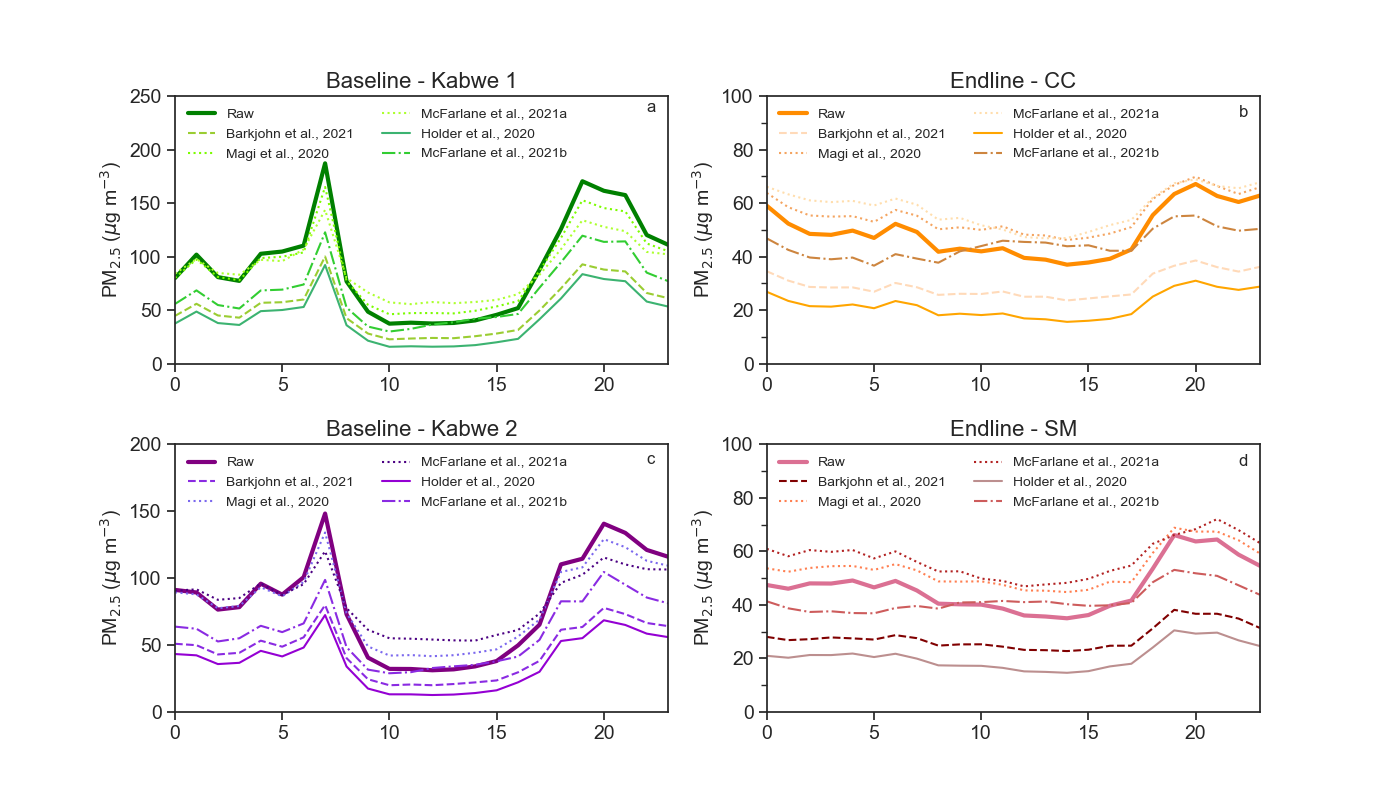

In [67]:
# set up multi-panel figure
sns.set(style="white",font_scale=1.1)
sns.set_style("ticks")
fig12, axes12 = plt.subplots(2, 2, figsize=(14,8),sharey=False, sharex=False)
#fig12.suptitle('Raw PA PM2.5 vs. Corrected PM2.5', size=14,fontweight='bold')

# Diurnal - Kabwe 1
axes12[0,0].plot(PA_Kab1_summary.index.values, PA_Kab1_summary['PM_2pt5_50th'],color='green',label='Raw',linewidth=3)
axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr1_50th'],color='yellowgreen',linestyle='--',label='Barkjohn et al., 2021')
axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr2_50th'],color='lawngreen',linestyle=':',label='Magi et al., 2020')
axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr3_50th'],color='greenyellow',linestyle=':',label='McFarlane et al., 2021a')
#axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr4_50th'],color='limegreen',linestyle=':') # not running bc daily correction so not applicable
axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr5_50th'],color='mediumseagreen',label='Holder et al., 2020')
#axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr6_50th'],color='palegreen',linestyle='-.',label='PM + RH + T+ DP')
axes12[0,0].plot(PA_Kab1_summary_corr.index.values, PA_Kab1_summary_corr['PM_2pt5_corr7_50th'],color='limegreen',linestyle='-.',label='McFarlane et al., 2021b')
axes12[0,0].set_ylabel('PM$_{2.5}$ ($\mu$g m$^{-3}$)',fontsize=14)
axes12[0,0].tick_params(labelsize=14)
axes12[0,0].legend(loc='upper left',frameon=False,fontsize=10,ncol=2)
axes12[0,0].text(22,235, 'a', fontsize = 12)
#axes12[0,0].yaxis.set_minor_locator(MultipleLocator(5))
axes12[0,0].set_ylim((0,250))
axes12[0,0].set_xlim((0,23))
axes12[0,0].set_title('Baseline - Kabwe 1',fontsize=16)

# Diurnal - Kabwe 2
axes12[1,0].plot(PA_Kab2_summary.index.values, PA_Kab2_summary['PM_2pt5_50th'],color='purple',label='Raw',linewidth=3)
axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr1_50th'],color='blueviolet',linestyle='--',label='Barkjohn et al., 2021')
axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr2_50th'],color='mediumslateblue',linestyle=':',label='Magi et al., 2020')
axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr3_50th'],color='indigo',linestyle=':',label='McFarlane et al., 2021a')
#axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr4_50th'],color='blueviolet',linestyle=':')
axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr5_50th'],color='darkviolet',label='Holder et al., 2020')
#axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr6_50th'],color='thistle',linestyle='-.')
axes12[1,0].plot(PA_Kab2_summary_corr.index.values, PA_Kab2_summary_corr['PM_2pt5_corr7_50th'],color='blueviolet',linestyle='-.',label='McFarlane et al., 2021b')
axes12[1,0].set_ylabel('PM$_{2.5}$ ($\mu$g m$^{-3}$)',fontsize=14)
axes12[1,0].tick_params(labelsize=14)
axes12[1,0].legend(loc='upper left',frameon=False,fontsize=10,ncol=2)
axes12[1,0].text(22,185, 'c', fontsize = 12)
#axes12[1,0].yaxis.set_minor_locator(MultipleLocator(5))
axes12[1,0].set_ylim((0,200))
axes12[1,0].set_xlim((0,23))
axes12[1,0].set_title('Baseline - Kabwe 2',fontsize=16)

# Diurnal - CEEEZ
axes12[0,1].plot(PA_CEEEZ_summary.index.values, PA_CEEEZ_summary['PM_2pt5_50th'],color='darkorange',label='Raw',linewidth=3)
axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr1_50th'],color='peachpuff',linestyle='--',label='Barkjohn et al., 2021')
axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr2_50th'],color='sandybrown',linestyle=':',label='Magi et al., 2020')
axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr3_50th'],color='navajowhite',linestyle=':',label='McFarlane et al., 2021a')
#axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr4_50th'],color='peru',linestyle=':')
axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr5_50th'],color='orange',label='Holder et al., 2020')
#axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr6_50th'],color='sienna',linestyle='-.')
axes12[0,1].plot(PA_CEEEZ_summary_corr.index.values, PA_CEEEZ_summary_corr['PM_2pt5_corr7_50th'],color='peru',linestyle='-.',label='McFarlane et al., 2021b')
axes12[0,1].set_ylabel('PM$_{2.5}$ ($\mu$g m$^{-3}$)',fontsize=14)
axes12[0,1].tick_params(labelsize=14)
axes12[0,1].legend(loc='upper left',frameon=False,fontsize=10,ncol=2)
axes12[0,1].text(22,92, 'b', fontsize = 12)
axes12[0,1].yaxis.set_minor_locator(MultipleLocator(10))
axes12[0,1].set_ylim((0,100))
axes12[0,1].set_xlim((0,23))
axes12[0,1].set_title('Endline - CC',fontsize=16)

# Diurnal - SM
axes12[1,1].plot(PA_SM_summary.index.values, PA_SM_summary['PM_2pt5_50th'],color='palevioletred',label='Raw',linewidth=3)
axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr1_50th'],color='maroon',linestyle='--',label='Barkjohn et al., 2021')
axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr2_50th'],color='coral',linestyle=':',label='Magi et al., 2020')
axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr3_50th'],color='firebrick',linestyle=':',label='McFarlane et al., 2021a')
#axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr4_50th'],color='indianred',linestyle=':')
axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr5_50th'],color='rosybrown',label='Holder et al., 2020')
#axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr6_50th'],color='mistyrose',linestyle='-.')
axes12[1,1].plot(PA_SM_summary_corr.index.values, PA_SM_summary_corr['PM_2pt5_corr7_50th'],color='indianred',linestyle='-.',label='McFarlane et al., 2021b')
axes12[1,1].set_ylabel('PM$_{2.5}$ ($\mu$g m$^{-3}$)',fontsize=14)
axes12[1,1].tick_params(labelsize=14)
axes12[1,1].legend(loc='upper left',frameon=False,fontsize=10,ncol=2)
axes12[1,1].text(22,92, 'd', fontsize = 12)
axes12[1,1].yaxis.set_minor_locator(MultipleLocator(10))
axes12[1,1].set_ylim((0,100))
axes12[1,1].set_xlim((0,23))
axes12[1,1].set_title('Endline - SM',fontsize=16)

plt.subplots_adjust(hspace=0.3)
fig12.savefig('PA_PM_raw_vs_corr.jpg',transparent=True)

### SupaMoto vs. CEEEZ PAs and Kabwe1 vs. Kabwe2 PAs

<IPython.core.display.Javascript object>


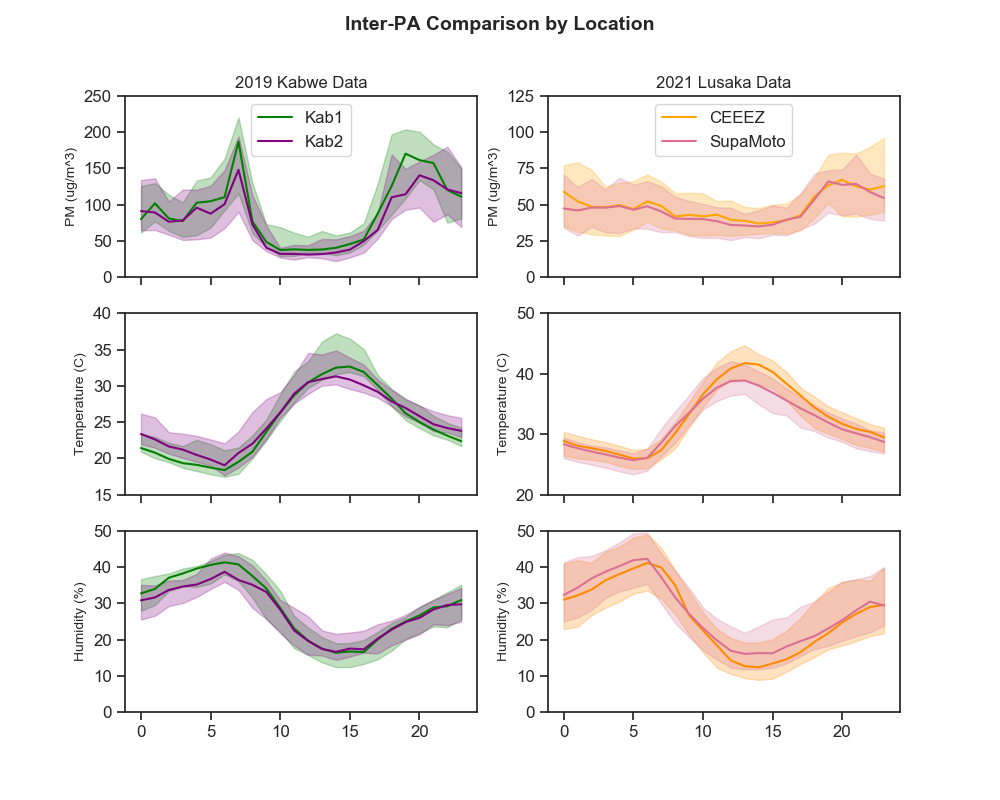

In [68]:
# set up multi-panel figure
sns.set(style="white",font_scale=1.1)
sns.set_style("ticks")
fig12, axes12 = plt.subplots(3, 2, figsize=(10,8),sharey=False, sharex=True)
fig12.suptitle('Inter-PA Comparison by Location', size=14,fontweight='bold')

# 2019 Kabwe PM data
axes12[0,0].fill_between(PA_Kab1_summary.index.values,PA_Kab1_summary['PM_2pt5_75th'],PA_Kab1_summary['PM_2pt5_25th'],color='green',alpha=0.25)
axes12[0,0].fill_between(PA_Kab2_summary.index.values,PA_Kab2_summary['PM_2pt5_75th'],PA_Kab2_summary['PM_2pt5_25th'],color='purple',alpha=0.25)
axes12[0,0].plot(PA_Kab1_summary.index.values, PA_Kab1_summary['PM_2pt5_50th'],color='green',label='Kab1')
axes12[0,0].plot(PA_Kab2_summary.index.values, PA_Kab2_summary['PM_2pt5_50th'],color='purple',label='Kab2')
#axes12[0,0].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['PM_2pt5_50th'],color='black')
axes12[0,0].legend(loc='upper center')
axes12[0,0].set_title('2019 Kabwe Data',size=12)
axes12[0,0].set_ylabel("PM (ug/m^3)", fontsize=10)
axes12[0,0].set_ylim((0,250))

# 2019 Kabwe Temp data
axes12[1,0].fill_between(PA_Kab1_summary.index.values,PA_Kab1_summary['temp_C_75th'],PA_Kab1_summary['temp_C_25th'],color='green',alpha=0.25)
axes12[1,0].fill_between(PA_Kab2_summary.index.values,PA_Kab2_summary['temp_C_75th'],PA_Kab2_summary['temp_C_25th'],color='purple',alpha=0.25)
axes12[1,0].plot(PA_Kab1_summary.index.values, PA_Kab1_summary['temp_C_50th'],color='green',label='Kab1')
axes12[1,0].plot(PA_Kab2_summary.index.values, PA_Kab2_summary['temp_C_50th'],color='purple',label='Kab2')
#axes12[1,0].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['temp_F_50th'],color='black')
#axes12[1,0].legend()
axes12[1,0].set_ylabel("Temperature (C)", fontsize=10)
axes12[1,0].set_ylim((15,40))

# 2019 Kabwe RH data
axes12[2,0].fill_between(PA_Kab1_summary.index.values,PA_Kab1_summary['RH_75th'],PA_Kab1_summary['RH_25th'],color='green',alpha=0.25)
axes12[2,0].fill_between(PA_Kab2_summary.index.values,PA_Kab2_summary['RH_75th'],PA_Kab2_summary['RH_25th'],color='purple',alpha=0.25)
axes12[2,0].plot(PA_Kab1_summary.index.values, PA_Kab1_summary['RH_50th'],color='green',label='Kab1')
axes12[2,0].plot(PA_Kab2_summary.index.values, PA_Kab2_summary['RH_50th'],color='purple',label='Kab2')
#axes12[2,0].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['RH_50th'],color='black')
#axes12[2,0].legend()
axes12[2,0].set_ylabel("Humidity (%)", fontsize=10)
axes12[2,0].set_ylim((0,50))

# 2021 Lusaka PM data
axes12[0,1].fill_between(PA_CEEEZ_summary.index.values,PA_CEEEZ_summary['PM_2pt5_75th'],PA_CEEEZ_summary['PM_2pt5_25th'],color='orange',alpha=0.25)
axes12[0,1].fill_between(PA_SM_summary.index.values,PA_SM_summary['PM_2pt5_75th'],PA_SM_summary['PM_2pt5_25th'],color='palevioletred',alpha=0.25)
axes12[0,1].plot(PA_CEEEZ_summary.index.values, PA_CEEEZ_summary['PM_2pt5_50th'],color='orange',label='CEEEZ')
axes12[0,1].plot(PA_SM_summary.index.values, PA_SM_summary['PM_2pt5_50th'],color='palevioletred',label='SupaMoto')
#axes12[0,1].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['PM_2pt5_50th'],color='black')
axes12[0,1].legend(loc='upper center')
axes12[0,1].set_title('2021 Lusaka Data',size=12)
axes12[0,1].set_ylabel("PM (ug/m^3)", fontsize=10)
axes12[0,1].set_ylim((0,125))

# 2021 Lusaka Temp data
axes12[1,1].fill_between(PA_CEEEZ_summary.index.values,PA_CEEEZ_summary['temp_C_75th'],PA_CEEEZ_summary['temp_C_25th'],color='darkorange',alpha=0.25)
axes12[1,1].fill_between(PA_SM_summary.index.values,PA_SM_summary['temp_C_75th'],PA_SM_summary['temp_C_25th'],color='palevioletred',alpha=0.25)
axes12[1,1].plot(PA_CEEEZ_summary.index.values, PA_CEEEZ_summary['temp_C_50th'],color='darkorange',label='CEEEZ')
axes12[1,1].plot(PA_SM_summary.index.values, PA_SM_summary['temp_C_50th'],color='palevioletred',label='SupaMoto')
#axes12[1,1].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['temp_C_50th'],color='black')
#axes12[1,1].legend()
axes12[1,1].set_ylabel("Temperature (C)", fontsize=10)
axes12[1,1].set_ylim((20,50))

# 2021 Lusaka RH data
axes12[2,1].fill_between(PA_CEEEZ_summary.index.values,PA_CEEEZ_summary['RH_75th'],PA_CEEEZ_summary['RH_25th'],color='darkorange',alpha=0.25)
axes12[2,1].fill_between(PA_SM_summary.index.values,PA_SM_summary['RH_75th'],PA_SM_summary['RH_25th'],color='palevioletred',alpha=0.25)
axes12[2,1].plot(PA_CEEEZ_summary.index.values, PA_CEEEZ_summary['RH_50th'],color='darkorange',label='CEEEZ')
axes12[2,1].plot(PA_SM_summary.index.values, PA_SM_summary['RH_50th'],color='palevioletred',label='SupaMoto')
#axes12[2,1].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['RH_50th'],color='black')
#axes12[2,1].legend()
axes12[2,1].set_ylabel("Humidity (%)", fontsize=10)
axes12[2,1].set_ylim((0,50))

fig12.savefig('inter-PA compare by loc.png',transparent=True)

### Lusaka PA vs. Kabwe PA

In [69]:
# average Kabwe and Lusaka sites 
PA_Kabwe_concat = pd.concat([PA_Kab1, PA_Kab2]) # add to one df
PA_Kabwe_concat['loc']='ambient' # adding another column for later
PA_Kabwe_summary = pd.DataFrame(columns=['PM_2pt5_mean', 'PM_2pt5_25th', 'PM_2pt5_50th','PM_2pt5_75th',
                                         'PM_2pt5_corr2_mean', 'PM_2pt5_corr2_25th', 'PM_2pt5_corr2_50th','PM_2pt5_corr2_75th',
                                         'PM_2pt5_corr5_mean', 'PM_2pt5_corr5_25th', 'PM_2pt5_corr5_50th','PM_2pt5_corr5_75th',
                                         'temp_C_mean', 'temp_C_25th', 'temp_C_50th','temp_C_75th',
                                         'RH_mean', 'RH_25th', 'RH_50th','RH_75th'])
PA_Kabwe_summary['PM_2pt5_mean'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5"].mean()
PA_Kabwe_summary['PM_2pt5_25th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.25)
PA_Kabwe_summary['PM_2pt5_50th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5"].median()
PA_Kabwe_summary['PM_2pt5_75th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.75)
PA_Kabwe_summary['PM_2pt5_corr2_mean'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr2"].mean()
PA_Kabwe_summary['PM_2pt5_corr2_25th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.25)
PA_Kabwe_summary['PM_2pt5_corr2_50th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr2"].median()
PA_Kabwe_summary['PM_2pt5_corr2_75th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr2"].quantile(q=0.75)
PA_Kabwe_summary['PM_2pt5_corr5_mean'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].mean()
PA_Kabwe_summary['PM_2pt5_corr5_25th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.25)
PA_Kabwe_summary['PM_2pt5_corr5_50th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].median()
PA_Kabwe_summary['PM_2pt5_corr5_75th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.75)
PA_Kabwe_summary['temp_C_mean'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["temp_C"].mean()
PA_Kabwe_summary['temp_C_25th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["temp_C"].quantile(q=0.25)
PA_Kabwe_summary['temp_C_50th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["temp_C"].median()
PA_Kabwe_summary['temp_C_75th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["temp_C"].quantile(q=0.75)
PA_Kabwe_summary['RH_mean'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["RH"].mean()
PA_Kabwe_summary['RH_25th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["RH"].quantile(q=0.25)
PA_Kabwe_summary['RH_50th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["RH"].median()
PA_Kabwe_summary['RH_75th'] = PA_Kabwe_concat.groupby([PA_Kabwe_concat["dt_local"].dt.hour])["RH"].quantile(q=0.75)


PA_Lusaka_concat = pd.concat([PA_CEEEZ, PA_SM]) # add to one df
PA_Lusaka_concat['loc']='ambient' # adding another column for later
PA_Lusaka_summary = pd.DataFrame(columns=['PM_2pt5_mean', 'PM_2pt5_25th', 'PM_2pt5_50th','PM_2pt5_75th',
                                         'PM_2pt5_corr3_mean', 'PM_2pt5_corr3_25th', 'PM_2pt5_corr3_50th','PM_2pt5_corr3_75th',
                                         'PM_2pt5_corr5_mean', 'PM_2pt5_corr5_25th', 'PM_2pt5_corr5_50th','PM_2pt5_corr5_75th',
                                         'temp_C_mean', 'temp_C_25th', 'temp_C_50th','temp_C_75th',
                                         'RH_mean', 'RH_25th', 'RH_50th','RH_75th'])
PA_Lusaka_summary['PM_2pt5_mean'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5"].mean()
PA_Lusaka_summary['PM_2pt5_25th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.25)
PA_Lusaka_summary['PM_2pt5_50th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5"].median()
PA_Lusaka_summary['PM_2pt5_75th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5"].quantile(q=0.75)
PA_Lusaka_summary['PM_2pt5_corr3_mean'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr3"].mean()
PA_Lusaka_summary['PM_2pt5_corr3_25th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.25)
PA_Lusaka_summary['PM_2pt5_corr3_50th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr3"].median()
PA_Lusaka_summary['PM_2pt5_corr3_75th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr3"].quantile(q=0.75)
PA_Lusaka_summary['PM_2pt5_corr5_mean'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].mean()
PA_Lusaka_summary['PM_2pt5_corr5_25th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.25)
PA_Lusaka_summary['PM_2pt5_corr5_50th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].median()
PA_Lusaka_summary['PM_2pt5_corr5_75th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["PM_2pt5_corr5"].quantile(q=0.75)
PA_Lusaka_summary['temp_C_mean'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["temp_C"].mean()
PA_Lusaka_summary['temp_C_25th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["temp_C"].quantile(q=0.25)
PA_Lusaka_summary['temp_C_50th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["temp_C"].median()
PA_Lusaka_summary['temp_C_75th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["temp_C"].quantile(q=0.75)
PA_Lusaka_summary['RH_mean'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["RH"].mean()
PA_Lusaka_summary['RH_25th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["RH"].quantile(q=0.25)
PA_Lusaka_summary['RH_50th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["RH"].median()
PA_Lusaka_summary['RH_75th'] = PA_Lusaka_concat.groupby([PA_Lusaka_concat["dt_local"].dt.hour])["RH"].quantile(q=0.75)

<IPython.core.display.Javascript object>


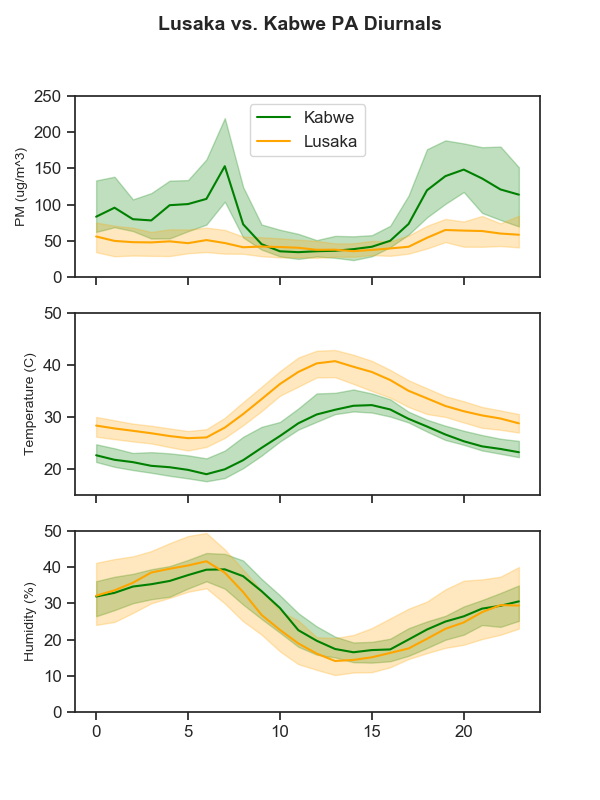

In [36]:
# set up multi-panel figure
sns.set(style="white",font_scale=1.1)
sns.set_style("ticks")
fig13, axes13 = plt.subplots(3, 1, figsize=(6,8),sharey=False, sharex=True)
fig13.suptitle('Lusaka vs. Kabwe PA Diurnals', size=14,fontweight='bold')

# PM data
axes13[0].fill_between(PA_Kabwe_summary.index.values,PA_Kabwe_summary['PM_2pt5_75th'],PA_Kabwe_summary['PM_2pt5_25th'],color='green',alpha=0.25)
axes13[0].fill_between(PA_Lusaka_summary.index.values,PA_Lusaka_summary['PM_2pt5_75th'],PA_Lusaka_summary['PM_2pt5_25th'],color='orange',alpha=0.25)
axes13[0].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['PM_2pt5_50th'],color='green',label="Kabwe")
axes13[0].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['PM_2pt5_50th'],color='orange',label="Lusaka")
axes13[0].legend(loc='upper center')
axes13[0].set_ylabel("PM (ug/m^3)", fontsize=10)
axes13[0].set_ylim((0,250))

# Temp data
axes13[1].fill_between(PA_Kabwe_summary.index.values,PA_Kabwe_summary['temp_C_75th'],PA_Kabwe_summary['temp_C_25th'],color='green',alpha=0.25)
axes13[1].fill_between(PA_Lusaka_summary.index.values,PA_Lusaka_summary['temp_C_75th'],PA_Lusaka_summary['temp_C_25th'],color='orange',alpha=0.25)
axes13[1].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['temp_C_50th'],color='green',label="Kabwe")
axes13[1].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['temp_C_50th'],color='orange',label="Lusaka")
axes13[1].set_ylabel("Temperature (C)", fontsize=10)
axes13[1].set_ylim((15,50))

# RH data
axes13[2].fill_between(PA_Kabwe_summary.index.values,PA_Kabwe_summary['RH_75th'],PA_Kabwe_summary['RH_25th'],color='green',alpha=0.25)
axes13[2].fill_between(PA_Lusaka_summary.index.values,PA_Lusaka_summary['RH_75th'],PA_Lusaka_summary['RH_25th'],color='orange',alpha=0.25)
axes13[2].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['RH_50th'],color='green',label="Kabwe")
axes13[2].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['RH_50th'],color='orange',label="Lusaka")
axes13[2].set_ylabel("Humidity (%)", fontsize=10)
axes13[2].set_ylim((0,50))

fig13.savefig('Lusaka_Kabwe_avg_PA_diurnals.png',transparent=False)

### PA Temperature vs. EM Temperature

In [73]:
# load in two new CSVs of 2019 and 2021 EM temperature data
# 2019 EM temp
EM_temp_19 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_EM_temp_hourly_CSV.csv',encoding='latin1',index_col=False)
EM_temp_19_F = EM_temp_19.loc[:,"hour_0":"hour_23"]*9/5+32 # convert to F
# adding for AGU
EM_temp_19 = EM_temp_19[EM_temp_19['100perc_char']==1]
EM_temp_19_stats = EM_temp_19.describe()
EM_temp_19_stats = EM_temp_19_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
EM_temp_19_stats = EM_temp_19_stats.transpose()

# 2021 EM temp
EM_temp_21 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2021_EM_temp_hourly_CSV.csv',encoding='latin1',index_col=False)
EM_temp_21_F = EM_temp_21.loc[:,"day_min":"hour_23"]*9/5+32 # convert to F
EM_temp_21_stats = EM_temp_21.describe()
EM_temp_21_stats = EM_temp_21_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
EM_temp_21_stats = EM_temp_21_stats.transpose()

### 3x2 CO, PM, temp ambient + exposure paper figure:

<IPython.core.display.Javascript object>


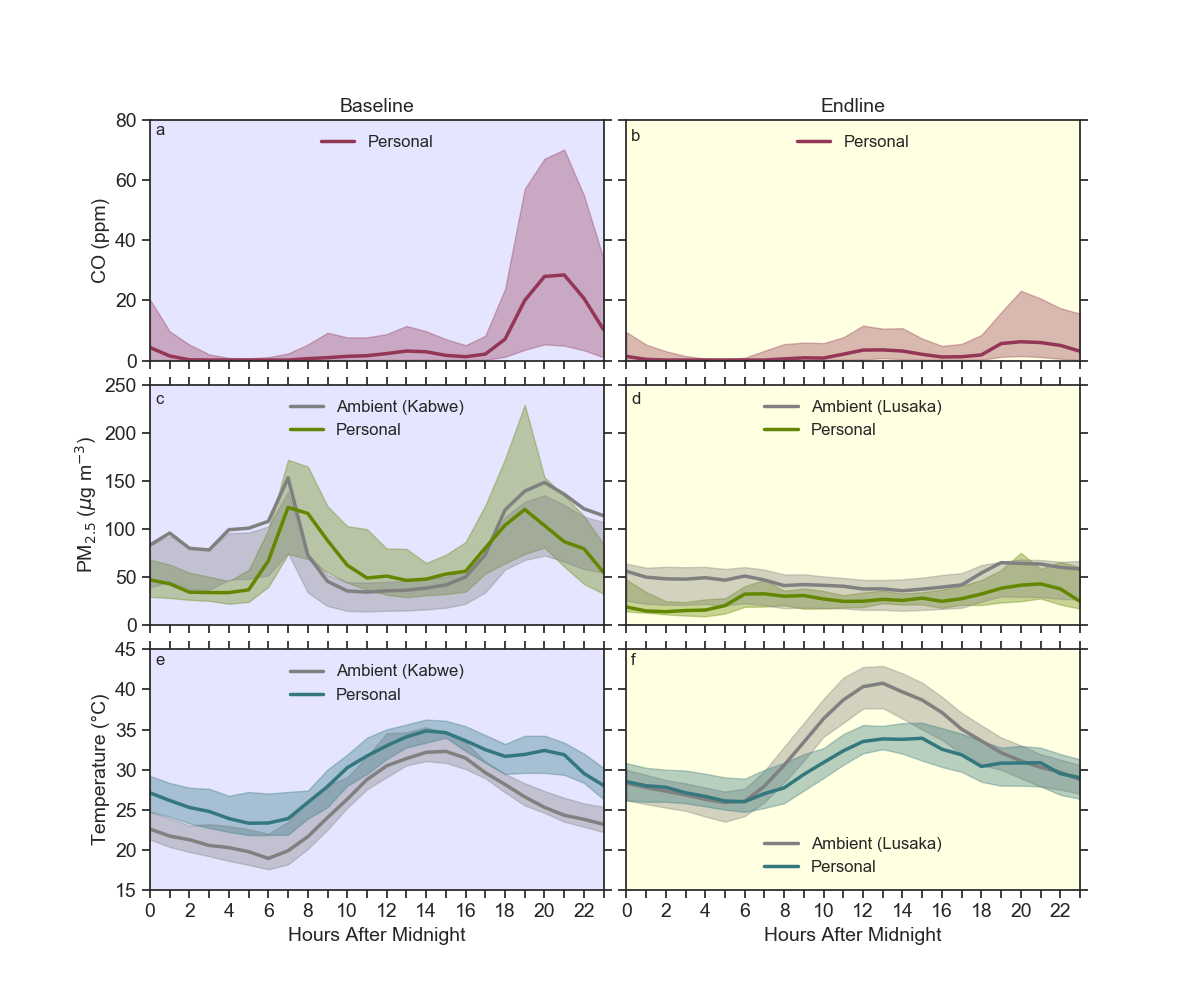

In [74]:
# want to make a 3x2 figure with EM and PA data for paper
#sns.set_style("whitegrid", {'axes.grid' : False})
fig16, axes16 = plt.subplots(3, 2, figsize=(12,10),sharey=False, sharex=True)
plt.subplots_adjust(wspace=0.05,hspace=0.15)

axes16[0,0].set_facecolor('#E5E5FF') # baseline
axes16[1,0].set_facecolor('#E5E5FF') # baseline
axes16[2,0].set_facecolor('#E5E5FF') # baseline
axes16[0,1].set_facecolor('#FFFFE1') # endline
axes16[1,1].set_facecolor('#FFFFE1') # endline
axes16[2,1].set_facecolor('#FFFFE1') # endline

# 2019 CO
CO_hr_19_stats = CO_hr_19.describe()
#pulling out the columns we want
CO_hr_19_stats = CO_hr_19_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_19_stats = CO_hr_19_stats.transpose()
axes16[0,0].fill_between(CO_hr_19_stats.index.values,CO_hr_19_stats['75%'],CO_hr_19_stats['25%'],color='#943655',alpha=0.35)
axes16[0,0].plot(CO_hr_19_stats.index.values, CO_hr_19_stats['50%'], linewidth=2.5,color='#943655',label='Personal')
axes16[0,0].set_title('Baseline',y=1,size=14)
axes16[0,0].text(0.25,75, 'a', fontsize = 12)
axes16[0,0].legend(loc='upper center',frameon=False,fontsize=12)
axes16[0,0].set_ylabel("CO (ppm)", fontsize=14)
#axes16[0,0].set_xlabel("Hours After Midnight", fontsize=14)
axes16[0,0].set_ylim((0,80))
axes16[0,0].tick_params(labelsize=14)
axes16[0,0].tick_params(bottom=True, top=False,left=True, right=True)

# 2019 PM
PM_hr_19_stats = PM_hr_19.describe()
#pulling out the columns we want
PM_hr_19_stats = PM_hr_19_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_19_stats = PM_hr_19_stats.transpose()
axes16[1,0].fill_between(PM_hr_19_stats.index.values,PM_hr_19_stats['75%'],PM_hr_19_stats['25%'],color='#638700',alpha=0.35)
#axes16[1,0].fill_between(PA_Kabwe_summary.index.values,PA_Kabwe_summary['PM_2pt5_75th'],PA_Kabwe_summary['PM_2pt5_25th'],color='grey',alpha=0.35)
axes16[1,0].fill_between(PA_Kabwe_summary.index.values,PA_Kabwe_summary['PM_2pt5_corr2_50th'],PA_Kabwe_summary['PM_2pt5_corr5_50th'],color='grey',alpha=0.35)
axes16[1,0].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['PM_2pt5_50th'],linewidth=2.5,color='grey',label="Ambient (Kabwe)")
axes16[1,0].plot(PM_hr_19_stats.index.values, PM_hr_19_stats['50%'],linewidth=2.5,color='#638700',label='Personal')
axes16[1,0].text(0.25,230, 'c', fontsize = 12)
axes16[1,0].legend(loc='upper center',frameon=False,fontsize=12)
axes16[1,0].set_ylabel("PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=14)
#axes16[1,0].set_xlabel("Hours After Midnight", fontsize=12)
axes16[1,0].set_ylim((0,250))
axes16[1,0].tick_params(labelsize=14)
axes16[1,0].tick_params(bottom=True, top=True,left=True, right=True)

# 2019 Temp
axes16[2,0].fill_between(PA_Kabwe_summary.index.values,PA_Kabwe_summary['temp_C_75th'],PA_Kabwe_summary['temp_C_25th'],color='grey',alpha=0.35)
axes16[2,0].fill_between(EM_temp_19_stats.index.values,EM_temp_19_stats['75%'],EM_temp_19_stats['25%'],color='#34787e',alpha=0.35)
axes16[2,0].plot(PA_Kabwe_summary.index.values, PA_Kabwe_summary['temp_C_50th'],linewidth=2.5,color='grey',label="Ambient (Kabwe)")
axes16[2,0].plot(EM_temp_19_stats.index.values, EM_temp_19_stats['50%'],linewidth=2.5,color='#34787e',label="Personal")
axes16[2,0].text(0.25,43, 'e', fontsize = 12)
axes16[2,0].legend(loc='upper center',frameon=False,fontsize=12)
axes16[2,0].set_ylabel("Temperature (\N{DEGREE SIGN}C)", fontsize=14)
axes16[2,0].set_xlabel("Hours After Midnight", fontsize=14)
axes16[2,0].tick_params(bottom=True, top=True,left=True, right=True)
axes16[2,0].set_ylim((15,45))
axes16[2,0].tick_params(labelsize=14)

# 2021 CO
CO_hr_21_stats = CO_hr_21.describe()
#pulling out the columns we want
CO_hr_21_stats = CO_hr_21_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
CO_hr_21_stats = CO_hr_21_stats.transpose()
axes16[0,1].fill_between(CO_hr_21_stats.index.values,CO_hr_21_stats['75%'],CO_hr_21_stats['25%'],color='#943655', alpha=0.35)
axes16[0,1].plot(CO_hr_21_stats.index.values, CO_hr_21_stats['50%'],linewidth=2.5,color='#943655',label='Personal')
axes16[0,1].set_title('Endline',y=1,size=14)
axes16[0,1].text(0.25,73, 'b', fontsize = 12)
axes16[0,1].legend(loc='upper center',frameon=False,fontsize=12)
#axes16[0,1].set_ylabel("CO (ppm)", fontsize=14)
#axes16[0,1].set_xlabel("Hours After Midnight", fontsize=14)
axes16[0,1].tick_params(bottom=True, top=False,left=True, right=True)
axes16[0,1].set_ylim((0,80))
axes16[0,1].tick_params(labelsize=14)
axes16[0,1].yaxis.set_ticklabels([])

# 2021 PM
PM_hr_21_stats = PM_hr_21.describe()
#pulling out the columns we want
PM_hr_21_stats = PM_hr_21_stats.loc[["mean","min","25%","50%","75%","max"],"hour_0":"hour_23"]
PM_hr_21_stats = PM_hr_21_stats.transpose()
axes16[1,1].fill_between(PM_hr_21_stats.index.values,PM_hr_21_stats['75%'],PM_hr_21_stats['25%'],color='#638700',alpha=0.35)
#axes16[1,1].fill_between(PA_Lusaka_summary.index.values,PA_Lusaka_summary['PM_2pt5_75th'],PA_Lusaka_summary['PM_2pt5_25th'],color='grey',alpha=0.35)
axes16[1,1].fill_between(PA_Lusaka_summary.index.values,PA_Lusaka_summary['PM_2pt5_corr3_50th'],PA_Lusaka_summary['PM_2pt5_corr5_50th'],color='grey',alpha=0.35)
axes16[1,1].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['PM_2pt5_50th'],linewidth=2.5,color='grey',label="Ambient (Lusaka)")
axes16[1,1].plot(PM_hr_21_stats.index.values, PM_hr_21_stats['50%'],linewidth=2.5,color='#638700',label="Personal")
axes16[1,1].text(0.25,230, 'd', fontsize = 12)
axes16[1,1].legend(loc='upper center',frameon=False,fontsize=12)
#axes16[1,1].set_ylabel("PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=14)
#axes16[1,1].set_xlabel("Hours After Midnight", fontsize=12)
axes16[1,1].set_ylim((0,250))
axes16[1,1].tick_params(labelsize=14)
axes16[1,1].yaxis.set_ticklabels([])
axes16[1,1].tick_params(bottom=True, top=True,left=True, right=True)

# 2021 Temp
axes16[2,1].fill_between(PA_Lusaka_summary.index.values,PA_Lusaka_summary['temp_C_75th'],PA_Lusaka_summary['temp_C_25th'],color='grey',alpha=0.35)
axes16[2,1].fill_between(EM_temp_21_stats.index.values,EM_temp_21_stats['75%'],EM_temp_21_stats['25%'],color='#34787e',alpha=0.35)
axes16[2,1].plot(PA_Lusaka_summary.index.values, PA_Lusaka_summary['temp_C_50th'],linewidth=2.5,color='grey',label="Ambient (Lusaka)")
axes16[2,1].plot(EM_temp_21_stats.index.values, EM_temp_21_stats['50%'],linewidth=2.5,color='#34787e',label='Personal')
axes16[2,1].text(0.25,43, 'f', fontsize = 12)
axes16[2,1].legend(loc='lower center',frameon=False,fontsize=12)
axes16[2,1].set_xlabel("Hours After Midnight", fontsize=14)
axes16[2,1].tick_params(bottom=True, top=True,left=True, right=True)
axes16[2,1].set_ylim((15,45))
axes16[2,1].tick_params(labelsize=14)
axes16[2,1].yaxis.set_ticklabels([])

# fixing x axis to be every other label and numbers - not "hour_0"
[l.set_visible(False) for (i,l) in enumerate(axes16[2,0].xaxis.get_ticklabels()) if i % 2 != 0]
[l.set_visible(False) for (i,l) in enumerate(axes16[2,1].xaxis.get_ticklabels()) if i % 2 != 0]
#axes16[0,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#axes16[0,0].set_xlim((0,23))
#axes16[0,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#axes16[0,1].set_xlim((0,23))
#axes16[1,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#axes16[1,0].set_xlim((0,23))
#axes16[1,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#axes16[1,1].set_xlim((0,23))
axes16[2,0].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
axes16[2,0].set_xlim((0,23))
axes16[2,1].set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
axes16[2,1].set_xlim((0,23))
plt.subplots_adjust(hspace=0.1)
#plt.subplots_adjust(hspace=0.3)

fig16.savefig('CO_PM_temp_diurnals.jpg',transparent=False)

### EM to PA Hourly Ratios:

First we need to match the EM PM hourly averages to a date time stamp:

In [84]:
# 2019
# melt EM by hour
df_melted_19 = pd.melt(PM_hr_19,
                       id_vars=['HH ID', 'Compound', '100perc_char','Serial Number', 'Date', 'Start Time', 'day_min',
                       'day_quart1', 'day_median', 'day_quart3', 'day_max', 'day_avg','day_std_dev', ],
                       var_name=["hours_name"],
                       value_name="hours_value")

# datetime formatting doesn't like NaNs / NaTs so get rid of those rows
df_melted_19 = df_melted_19[df_melted_19['Date'].notnull()]
df_melted_19 = df_melted_19.reset_index()

# combine date time in a different column
df_melted_19['Date']=pd.to_datetime(df_melted_19['Date'], format="%d/%m/%Y")
df_melted_19['Start Time']=pd.to_datetime(df_melted_19['Start Time'], format="%H:%M:%S")
df_melted_19['date_time_start']=df_melted_19['Start Time'].copy()
df_melted_19['date_time_start']=pd.to_datetime(df_melted_19['Date'].dt.date.astype(str) + ' ' + df_melted_19['Start Time'].dt.time.astype(str))
df_melted_19['date_time_match']=df_melted_19['date_time_start'].copy()

Reassign times in date_time_match column to match the hours_name column

In [85]:
for i in np.arange(len(df_melted_19['date_time_match'])):
    if df_melted_19['hours_name'][i] == 'hour_0':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=0, minute=0)
    if df_melted_19['hours_name'][i] == 'hour_1':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=1, minute=0)
    if df_melted_19['hours_name'][i] == 'hour_2':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=2, minute=0)
    if df_melted_19['hours_name'][i] == 'hour_3':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=3, minute=0)
    if df_melted_19['hours_name'][i] == 'hour_4':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=4, minute=0)
    if df_melted_19['hours_name'][i] == 'hour_5':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=5, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_6':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=6, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_7':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=7, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_8':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=8, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_9':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=9, minute=0)     
    if df_melted_19['hours_name'][i] == 'hour_10':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=10, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_11':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=11, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_12':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=12, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_13':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=13, minute=0)     
    if df_melted_19['hours_name'][i] == 'hour_14':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=14, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_15':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=15, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_16':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=16, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_17':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=17, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_18':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=18, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_19':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=19, minute=0)
    if df_melted_19['hours_name'][i] == 'hour_20':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=20, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_21':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=21, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_22':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=22, minute=0)    
    if df_melted_19['hours_name'][i] == 'hour_23':
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i].replace(hour=23, minute=0)

Now we need to parse the 24-hours by date depending on start time
(i.e., if a test starts Nov 1 at 11, hours 11-23 are Nov 1 and everything else is Nov 2)

In [86]:
for i in np.arange(len(df_melted_19['date_time_match'])):
    time_match = datetime.time(df_melted_19['date_time_match'][i])
    time_start = datetime.time(df_melted_19['date_time_start'][i])
    if time_match < time_start:
        df_melted_19['date_time_match'][i] = df_melted_19['date_time_match'][i] + timedelta(days=1)

# set the time zone to CAT
df_melted_19['date_time_match'] = pd.DatetimeIndex(data=df_melted_19['date_time_match']).tz_localize('Africa/Lusaka')

Repeat for 2021

In [87]:
# melt EM by hour
df_melted_21 = pd.melt(PM_hr_21,
                       id_vars=['HH ID', 'Compound', '100perc_char','Serial Number', 'Date', 'Start Time', 'day_min',
                       'day_quart1', 'day_median', 'day_quart3', 'day_max', 'day_avg','day_std_dev', ],
                       var_name=["hours_name"],
                       value_name="hours_value")

# datetime formatting doesn't like NaNs / NaTs so get rid of those rows
df_melted_21 = df_melted_21[df_melted_21['Date'].notnull()]
df_melted_21 = df_melted_21.reset_index()

# combine date time in a different column
df_melted_21['Date']=pd.to_datetime(df_melted_21['Date'], format="%d/%m/%Y")
df_melted_21['Start Time']=pd.to_datetime(df_melted_21['Start Time'], format="%H:%M:%S")
df_melted_21['date_time_start']=df_melted_21['Start Time'].copy()
df_melted_21['date_time_start']=pd.to_datetime(df_melted_21['Date'].dt.date.astype(str) + ' ' + df_melted_21['Start Time'].dt.time.astype(str))
df_melted_21['date_time_match']=df_melted_21['date_time_start'].copy()

# reassign times in date_time_match column to match the hours_name column
for i in np.arange(len(df_melted_21['date_time_match'])):
    if df_melted_21['hours_name'][i] == 'hour_0':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=0, minute=0)
    if df_melted_21['hours_name'][i] == 'hour_1':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=1, minute=0)
    if df_melted_21['hours_name'][i] == 'hour_2':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=2, minute=0)
    if df_melted_21['hours_name'][i] == 'hour_3':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=3, minute=0)
    if df_melted_21['hours_name'][i] == 'hour_4':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=4, minute=0)
    if df_melted_21['hours_name'][i] == 'hour_5':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=5, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_6':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=6, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_7':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=7, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_8':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=8, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_9':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=9, minute=0)     
    if df_melted_21['hours_name'][i] == 'hour_10':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=10, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_11':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=11, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_12':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=12, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_13':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=13, minute=0)     
    if df_melted_21['hours_name'][i] == 'hour_14':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=14, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_15':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=15, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_16':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=16, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_17':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=17, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_18':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=18, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_19':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=19, minute=0)
    if df_melted_21['hours_name'][i] == 'hour_20':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=20, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_21':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=21, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_22':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=22, minute=0)    
    if df_melted_21['hours_name'][i] == 'hour_23':
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i].replace(hour=23, minute=0)
        
# now we need to parse the 24-hours by date depending on start time
# i.e., if a test starts Nov 1 at 11, hours 11-23 are Nov 1 and everything else is Nov 2
for i in np.arange(len(df_melted_21['date_time_match'])):
    time_match = datetime.time(df_melted_21['date_time_match'][i])
    time_start = datetime.time(df_melted_21['date_time_start'][i])
    if time_match < time_start:
        df_melted_21['date_time_match'][i] = df_melted_21['date_time_match'][i] + timedelta(days=1)

# set the time zone to CAT
df_melted_21['date_time_match'] = pd.DatetimeIndex(data=df_melted_21['date_time_match']).tz_localize('Africa/Lusaka')

Now we need to find the matching date time stamp in the PA dataframes and copy over its ambient PM2.5 data point

In [88]:
# Going to copy the PA data frames into new dataframes to not disrupt previous code
PA_Kabwe_ratio = PA_Kabwe_concat.copy()
PA_Lusaka_ratio = PA_Lusaka_concat.copy()

# Want to average the matching time stamps from the two PAs together (previously averaged by hour but we want averaged by timestamp)
PA_Kabwe_ratio = PA_Kabwe_ratio.groupby(PA_Kabwe_concat["dt_local"])["PM_2pt5"].mean()
PA_Lusaka_ratio = PA_Lusaka_ratio.groupby(PA_Lusaka_concat["dt_local"])["PM_2pt5"].mean()

The all-important for loop doing the leg work:

In [89]:
# first create new columns in the df_melted dfs to save the matching ambient PM data
df_melted_19['ambient_match']=np.nan
df_melted_21['ambient_match']=np.nan

# 2019
for i in np.arange(len(df_melted_19['date_time_match'])):
    if df_melted_19['date_time_match'][i] in PA_Kabwe_ratio.index: # check if ambient df has data from the respective day
        df_melted_19['ambient_match'][i] = PA_Kabwe_ratio[df_melted_19['date_time_match'][i]]

# 2021
for i in np.arange(len(df_melted_21['date_time_match'])):
    if df_melted_21['date_time_match'][i] in PA_Lusaka_ratio.index: # check if ambient df has data from the respective day
        df_melted_21['ambient_match'][i] = PA_Lusaka_ratio[df_melted_21['date_time_match'][i]]

### EM to PA 24-Hour Average Scatterplot

In [96]:
# separate the df_melted dataframes by HHID, average the ambient_match column, and save the average in the db dataframe

# 2019
# first create a new column in db_19 to store 24-hour ambient averages
db_19['24 Hour Ambient PM2.5']=np.nan

# ok let's do the 60 now
# combine date time columns in db_19 in a different column
db_19['Date']=pd.to_datetime(db_19['Date'], format="%m/%d/%Y")
db_19['Start Time']=pd.to_datetime(db_19['Start Time'], format="%H:%M:%S")
db_19['date_time_start']=db_19['Start Time'].copy()
db_19_nonans = db_19.dropna(subset=['24 hour PM2.5 avg (ug/m^3)']) # have to drop nans to combine 
#db_19_nonans['date_time_start'] = pd.to_datetime(db_19_nonans['Date'] + ' ' + db_19_nonans['Start Time'])
db_19_nonans['date_time_start']=pd.to_datetime(db_19_nonans['Date'].dt.date.astype(str) + ' ' + db_19_nonans['Start Time'].dt.time.astype(str))
db_19_nonans['date_time_start'] = pd.DatetimeIndex(data=db_19_nonans['date_time_start']).tz_localize('Africa/Lusaka')
db_19_nonans['date_time_start'] = db_19_nonans['date_time_start'].apply(lambda x: x.replace(minute = 0)) # round down to nearest hour
db_19_nonans = db_19_nonans.reset_index()

# average PA data from this time to + 1 day after 
for i in np.arange(len(db_19_nonans['date_time_start'])):
    if db_19_nonans['date_time_start'][i] in PA_Kabwe_ratio.index: # check if ambient df has data from the respective day
        start_time = db_19_nonans['date_time_start'][i]
        end_time = db_19_nonans['date_time_start'][i] + timedelta(days=1)
        db_19_nonans['24 Hour Ambient PM2.5'][i] = np.mean(PA_Kabwe_ratio[start_time:end_time])

In [97]:
# 2021
# first create a new column in db_21 to store 24-hour ambient averages
db_21['24 Hour Ambient PM2.5']=np.nan

# for loop to cycle through the HHIDs in df_melted_21 and saves them to the column we just created
#PM_hr_21 = PM_hr_21.reset_index() # because of inclusion mask wave, indexes are messed up - ONLY RUN IF FIRST TIME
for i in np.arange(len(PM_hr_21['HH ID'])):
    HHID = PM_hr_21['HH ID'][i]
    df_24hrs = df_melted_21[df_melted_21['HH ID']==HHID]
    index = db_21[db_21['HH ID']==HHID].index.values
    db_21['24 Hour Ambient PM2.5'][index]=df_24hrs['ambient_match'].mean()

<IPython.core.display.Javascript object>


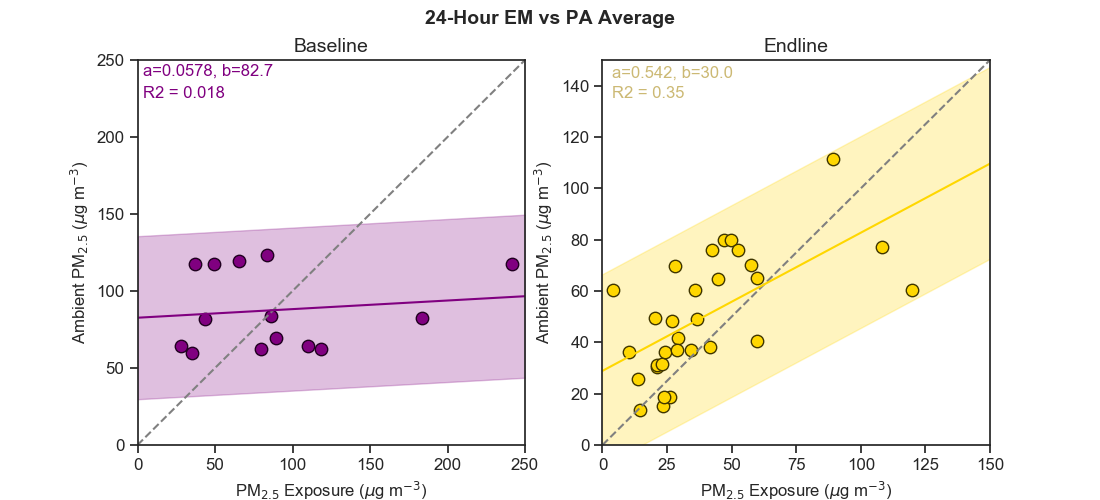

In [95]:
# scatter plot
# set up multi-panel figure
sns.set(style="white",palette="tab10",font_scale=1.1)
sns.set_style("ticks")
fig17, axes17 = plt.subplots(1, 2, figsize=(11,5),sharey=False, sharex=False)
fig17.suptitle('24-Hour EM vs PA Average', size=14,fontweight='bold')

# 2019 EM vs. PA
sns.scatterplot(ax=axes17[0],x=db_19_nonans['24 hour PM2.5 avg (ug/m^3)'], y=db_19_nonans['24 Hour Ambient PM2.5'],
                color='purple',s=80,linewidth=1,edgecolor='black')
axes17[0].set_title('Baseline',size=14)
axes17[0].set_xlabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=12)
axes17[0].set_ylabel("Ambient PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
axes17[0].plot([0, 300],[0, 300],'--',color='gray')
axes17[0].set_xlim((0,250))
axes17[0].set_ylim((0,250))


# 2021 EM vs. PA
sns.scatterplot(ax=axes17[1],x=db_21['24 hour PM2.5 avg (ug/m^3)'], y=db_21['24 Hour Ambient PM2.5'],
                color='gold',s=80,linewidth=1,edgecolor='black')
axes17[1].set_title('Endline',size=14)
axes17[1].set_xlabel("PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)", fontsize=12)
axes17[1].set_ylabel("Ambient PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
axes17[1].plot([0, 300],[0, 300],'--',color='gray')
axes17[1].set_xlim((0,150))
axes17[1].set_ylim((0,150))

# linear regression with R^2 calculated for both:
# first we need to remove nans for it to work (?)
db_19_nonans = db_19_nonans.dropna(subset=['24 hour PM2.5 avg (ug/m^3)','24 Hour Ambient PM2.5'])
model_19 = np.polyfit(db_19_nonans['24 hour PM2.5 avg (ug/m^3)'],db_19_nonans['24 Hour Ambient PM2.5'], 1)
predict_19 = np.poly1d(model_19)
R2_19 = r2_score(db_19_nonans['24 Hour Ambient PM2.5'], predict_19(db_19_nonans['24 hour PM2.5 avg (ug/m^3)']))

db_21_nonans = db_21.dropna(subset=['24 hour PM2.5 avg (ug/m^3)','24 Hour Ambient PM2.5'])
model_21 = np.polyfit(db_21_nonans['24 hour PM2.5 avg (ug/m^3)'],db_21_nonans['24 Hour Ambient PM2.5'], 1)
predict_21 = np.poly1d(model_21)
R2_21 = r2_score(db_21_nonans['24 Hour Ambient PM2.5'], predict_21(db_21_nonans['24 hour PM2.5 avg (ug/m^3)']))

x_lin_reg = [0,300]
y_lin_reg_19 = predict_19(x_lin_reg)
y_lin_reg_21 = predict_21(x_lin_reg)

axes17[0].plot(x_lin_reg, y_lin_reg_19, color = 'purple')
axes17[0].text(3.5,240, 'a=0.0578, b=82.7', fontsize = 12, color='purple')
axes17[0].text(3.5,225, 'R2 = 0.018', fontsize = 12,color='purple')

axes17[1].plot(x_lin_reg, y_lin_reg_21, c = 'gold')
axes17[1].text(3.5,143, 'a=0.542, b=30.0', fontsize = 12, color='y')
axes17[1].text(3.5,135, 'R2 = 0.35', fontsize = 12,color='y')

# fit uncertainty
# 2019
x = db_19_nonans['24 hour PM2.5 avg (ug/m^3)']
y = db_19_nonans['24 Hour Ambient PM2.5']
yhat19 = predict_19(x)                                           # or [p(z) for z in x]
ybar19 = np.sum(y)/len(y)                                        # or sum(y)/len(y)
ssreg19 = np.sum((yhat19-ybar19)**2)                             # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot19 = np.sum((y - ybar19)**2)                                # or sum([ (yi - ybar)**2 for yi in y])
syx19 = np.sqrt(np.sum((y-yhat19)**2)/(len(y)-2))                #standard error of the fit
fit_error19 = 2*syx19 # calculate fit uncertainty at 95%
rsq19 = ssreg19 / sstot19
axes17[0].fill_between(x_lin_reg, y_lin_reg_19-fit_error19, y_lin_reg_19+fit_error19, color='purple', alpha=0.25)

# 2021
x = db_21_nonans['24 hour PM2.5 avg (ug/m^3)']
y = db_21_nonans['24 Hour Ambient PM2.5']
yhat21 = predict_21(x)                                           # or [p(z) for z in x]
ybar21 = np.sum(y)/len(y)                                        # or sum(y)/len(y)
ssreg21 = np.sum((yhat21-ybar21)**2)                             # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot21 = np.sum((y - ybar21)**2)                                # or sum([ (yi - ybar)**2 for yi in y])
syx21 = np.sqrt(np.sum((y-yhat21)**2)/(len(y)-2))                #standard error of the fit
fit_error21 = 2*syx21 # calculate fit uncertainty at 95%
rsq21 = ssreg21 / sstot21
axes17[1].fill_between(x_lin_reg, y_lin_reg_21-fit_error21, y_lin_reg_21+fit_error21, color='gold', alpha=0.25)


fig17.savefig('EM_PA_scatter.png',transparent=True)

## EM Yearly Cross Comparisons

### Load in CSV that has 2019 and 2021 EM data combined

In [98]:
db_combine = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_combined_EM_CSV.csv',encoding='latin1',index_col=False)
# make new columns of baseline and endline EM differences, but have to make sure they exist first
#if db_combine['end CO'].notna() & db_combine['base CO'].notna():
db_combine['End_Base_CO_Diff']=db_combine['end CO']-db_combine['base CO']
db_combine['End_Base_PM_Diff']=db_combine['end PM']-db_combine['base PM']

# adding two columns to splice into two dataframes based on stratification sample sizes
db_combine['CO_boxcount']= True
db_combine['PM_boxcount']= True
db_combine_CO_boxcount = db_combine['CO_boxcount']
db_combine_PM_boxcount = db_combine['PM_boxcount']

### By Adoption Status:

In [100]:
# need to do some tweaking to make the x-axis look good
db_combine['CO_adopt_stat_labels']=db_combine['TOT_lvl2_lostgain_SP'].copy()
db_combine['PM_adopt_stat_labels']=db_combine['TOT_lvl2_lostgain_SP'].copy()

# want to add sample sizes in the x labels
CO_adopt_stat_labels = db_combine.groupby(db_combine["TOT_lvl2_lostgain_SP"])["End_Base_CO_Diff"].count()
db_combine['CO_adopt_stat_labels'] = db_combine['CO_adopt_stat_labels'].replace('Gained Alternative','Started\nUsing\nIntervention\n(n='+str(CO_adopt_stat_labels[0])+')')
db_combine['CO_adopt_stat_labels'] = db_combine['CO_adopt_stat_labels'].replace('Kept Alternative','Kept\nUsing\nIntervention\n(n='+str(CO_adopt_stat_labels[1])+')')
db_combine['CO_adopt_stat_labels'] = db_combine['CO_adopt_stat_labels'].replace('Kept Non-Alternative','Kept\nUsing\nOriginal\n(n='+str(CO_adopt_stat_labels[2])+')')
db_combine['CO_adopt_stat_labels'] = db_combine['CO_adopt_stat_labels'].replace('Lost Alternative',"Stopped\nUsing\nIntervention\n(n="+str(CO_adopt_stat_labels[3])+')')

PM_adopt_stat_labels = db_combine.groupby(db_combine["TOT_lvl2_lostgain_SP"])["End_Base_PM_Diff"].count()
db_combine['PM_adopt_stat_labels'] = db_combine['PM_adopt_stat_labels'].replace('Gained Alternative','Started\nUsing\nIntervention\n(n='+str(PM_adopt_stat_labels[0])+')')
db_combine['PM_adopt_stat_labels'] = db_combine['PM_adopt_stat_labels'].replace('Kept Alternative','Kept\nUsing\nIntervention\n(n='+str(PM_adopt_stat_labels[1])+')')
db_combine['PM_adopt_stat_labels'] = db_combine['PM_adopt_stat_labels'].replace('Kept Non-Alternative','Kept\nUsing\nOriginal\n(n='+str(PM_adopt_stat_labels[2])+')')
db_combine['PM_adopt_stat_labels'] = db_combine['PM_adopt_stat_labels'].replace('Lost Alternative',"Stopped\nUsing\nIntervention\n(n="+str(PM_adopt_stat_labels[3])+')')

In [101]:
# Because some of our stratification have less than 10 data points in a category, we need to splice them into two dataframes
# to only make boxplots of > 10 data points

# adding two columns to splice into two dataframes based on stratification sample sizes
db_combine['CO_boxcount']= True
db_combine['PM_boxcount']= True
db_combine_CO_boxcount = db_combine['CO_boxcount']
db_combine_PM_boxcount = db_combine['PM_boxcount']

level2_lostgain = db_combine['TOT_lvl2_lostgain_SP']

# CO
df = db_combine.groupby("TOT_lvl2_lostgain_SP",as_index=False).agg({'End_Base_CO_Diff':['count']})
df.columns=['TOT_lvl2_lostgain_SP','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['TOT_lvl2_lostgain_SP']

if not df_box.empty:
    for i in np.arange(len(df_box)):
        for j in np.arange(len(level2_lostgain)):
            if level2_lostgain[j] == df_box[i]:
                db_combine_CO_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_combine_CO_box = db_combine[db_combine['CO_boxcount']==True]
db_combine_CO_pnts = db_combine[db_combine['CO_boxcount']==False]

# PM
df = db_combine.groupby("TOT_lvl2_lostgain_SP",as_index=False).agg({'End_Base_PM_Diff':['count']})
df.columns=['TOT_lvl2_lostgain_SP','count']
# if count is < 10 then need to subset to another df
df_box = df[df['count']<10]
df_box = df_box.reset_index() # need to reset index to properly go through it in for loop
df_box = df_box['TOT_lvl2_lostgain_SP']

if not df_box.empty:
    for i in np.arange(len(df_box)):
        for j in np.arange(len(level2_lostgain)):
            if level2_lostgain[j] == df_box[i]:
                db_combine_PM_boxcount[j] = False

# make two new dataframes for < n=10 and > n=10
db_combine_PM_box = db_combine[db_combine['PM_boxcount']==True]
db_combine_PM_pnts = db_combine[db_combine['PM_boxcount']==False]

<IPython.core.display.Javascript object>


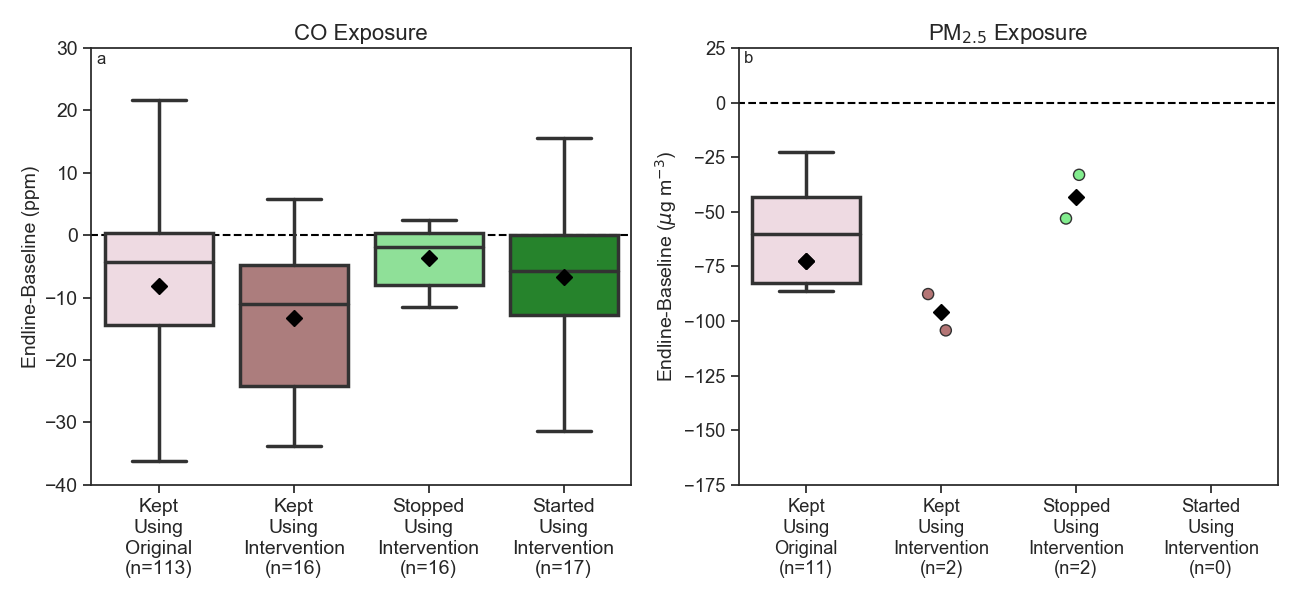

In [102]:
# set up multi-panel figure
adopt_stat = ['#f1d7e2','#b47575', '#82ed8e', '#16921e']
sns.set(style="white",palette=adopt_stat,font_scale=1.2)
sns.set_style("ticks")
fig17, axes17 = plt.subplots(1, 2, figsize=(13,6),sharey=False, sharex=False)
#fig17.suptitle('By Adoption Status', size=14,fontweight='bold')

level2_lostgain = db_combine['TOT_lvl2_lostgain_SP']
db_combine_avgs = db_combine.groupby("TOT_lvl2_lostgain_SP").mean()

# CO
sns.boxplot(ax=axes17[0],x=db_combine_CO_box['CO_adopt_stat_labels'],y=db_combine_CO_box['End_Base_CO_Diff'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Kept\nUsing\nOriginal\n(n=113)','Kept\nUsing\nIntervention\n(n=16)','Stopped\nUsing\nIntervention\n(n=16)','Started\nUsing\nIntervention\n(n=17)'])
# turn off box plots for ppt animations
#sns.boxplot(ax=axes17[0],x=db_combine_CO_box['level2_lostgain'],y=db_combine_CO_box['Base_End_CO_Diff'],linewidth=2.5, medianprops={'visible': False},whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False,order = ['Kept Traditional','Kept Alternative','Lost Alternative','Gained Alternative'])
axes17[0].set_title('CO Exposure',size=16)
#axes17[0].set_title('CO Exposure',y=1.1,size=14) # y offset for presentations
axes17[0].set_ylabel("Endline-Baseline (ppm)", fontsize=14)
axes17[0].set_xlabel("", fontsize=12)
axes17[0].tick_params(labelsize=14)
axes17[0].text(-0.46,27.5, 'a', fontsize = 12)
axes17[0].set_ylim((-40,30))
axes17[0].set_xlim((-0.5,3.5))
axes17[0].set_xticklabels(axes17[0].get_xticklabels())
axes17[0].plot([-1, 4],[0, 0],'--',color='black',zorder=0)

# PM
sns.boxplot(ax=axes17[1],x=db_combine_PM_box['PM_adopt_stat_labels'],y=db_combine_PM_box['End_Base_PM_Diff'],
            linewidth=2.5,showfliers=False,showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Kept\nUsing\nOriginal\n(n=11)','Kept\nUsing\nIntervention\n(n=2)','Stopped\nUsing\nIntervention\n(n=2)','Started\nUsing\nIntervention\n(n=0)'])
sns.stripplot(ax=axes17[1],x=db_combine_PM_pnts['PM_adopt_stat_labels'],y=db_combine_PM_pnts['End_Base_PM_Diff'],
            linewidth=1,size=8,
            order = ['Kept\nUsing\nOriginal\n(n=11)','Kept\nUsing\nIntervention\n(n=2)','Stopped\nUsing\nIntervention\n(n=2)','Started\nUsing\nIntervention\n(n=0)'])
# adding another boxplot with all data but hiding box so we can add the jitter average
sns.boxplot(ax=axes17[1],x=db_combine['PM_adopt_stat_labels'],y=db_combine['End_Base_PM_Diff'], linewidth=2.5,zorder=10,medianprops={'visible': False},
            whiskerprops={'visible': False},showfliers=False,showbox=False,showcaps=False, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"black","markeredgecolor":"black","markersize":"8"},
            order = ['Kept\nUsing\nOriginal\n(n=11)','Kept\nUsing\nIntervention\n(n=2)','Stopped\nUsing\nIntervention\n(n=2)','Started\nUsing\nIntervention\n(n=0)'])
axes17[1].set_title('PM$_{2.5}$ Exposure', size=16)
#axes17[1].set_title('PM$_{2.5}$ Exposure',y=1.1, size=14) # y offset for presentations
axes17[1].set_ylabel("Endline-Baseline ($\mu$g m$^{-3}$)", fontsize=14)
axes17[1].set_xlabel("", fontsize=12)
axes17[0].tick_params(labelsize=14)
axes17[1].text(-0.46,18, 'b', fontsize = 12)
axes17[1].set_ylim((-175,25))
axes17[1].set_xlim((-0.5,3.5))
axes17[1].set_xticklabels(axes17[1].get_xticklabels())
axes17[1].plot([-1, 4],[0, 0],'--',color='black',zorder=0)

plt.tight_layout()
fig17.savefig('Base_End_CO_PM_Diff.jpg',transparent=True)

In [103]:
# ANOVA testing on differences:
# https://www.pythonfordatascience.org/anova-python/#anova-test
from scipy.stats import ranksums
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('End_Base_CO_Diff ~ C(TOT_lvl2_lostgain_SP)', data=db_combine).fit()      # ------ pvalue = 0.7673 - not stat sig diff
#model = ols('End_Base_PM_Diff ~ C(TOT_lvl2_lostgain_SP)', data=db_combine).fit()      # ------ pvalue = 0.0000129 - stat sig diff??
#model = ols('End_Base_CO_Diff ~ C(TOT_lvl1_Change_SP)', data=db_combine).fit()        # ------ pvalue = 0.257 - not stat sig diff
#model = ols('End_Base_PM_Diff ~ C(TOT_lvl1_Change_SP)', data=db_combine).fit()        # ------ pvalue = 0.286 - stat sig diff??

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


sum_sq     df         F    PR(>F)
C(TOT_lvl2_lostgain_SP)    760.239931    3.0  1.029041  0.381412
Residual                 38909.351225  158.0       NaN       NaN

## Linear Regression Model

### Creating Stove Use Indicator Groups:

In [107]:
# going to try both stove groups I made:
# group 1: n=10, ICS + dirty / clean
# group 2: n=6, ICS any amount

# ---------------- ONLY NEED TO RUN ONCE - SAVING IN THE CSV ----------------
# baseline, group 1:
db_combine['stove_ind_base_grp1'] = np.nan
for i in np.arange(len(db_combine['stove_ind_base_grp1'])):
    # first do exc from primary stoves
    if (db_combine['prim_stove_base'][i] == 'ecozoom'):
        db_combine['stove_ind_base_grp1'][i] = 'eco exc'
    if (db_combine['prim_stove_base'][i] == 'electric_nooven') | (db_combine['prim_stove_base'][i] == 'electric_oven'):
        db_combine['stove_ind_base_grp1'][i] = 'elec exc'
    if (db_combine['prim_stove_base'][i] == 'improvedcharcoal') | (db_combine['prim_stove_base'][i] == 'mbaula'):
        db_combine['stove_ind_base_grp1'][i] = 'charc exc'
    if (db_combine['prim_stove_base'][i] == 'mimimoto'):
        db_combine['stove_ind_base_grp1'][i] = 'mm exc'
    if (db_combine['prim_stove_base'][i] == 'other') | (db_combine['prim_stove_base'][i] == 'threestone'):
        db_combine['stove_ind_base_grp1'][i] = 'other'
    
    # add interactions / secondary stoves now
    if (db_combine['prim_stove_base'][i] == 'ecozoom') & (db_combine['sec_stove_base'][i] == 'electric_nooven'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + clean'
    if (db_combine['prim_stove_base'][i] == 'ecozoom') & (db_combine['sec_stove_base'][i] == 'electric_oven'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + clean' 
    if (db_combine['prim_stove_base'][i] == 'ecozoom') & (db_combine['sec_stove_base'][i] == 'gas'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + clean'
    if (db_combine['prim_stove_base'][i] == 'ecozoom') & (db_combine['sec_stove_base'][i] == 'improvedcharcoal'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + dirty'
    if (db_combine['prim_stove_base'][i] == 'ecozoom') & (db_combine['sec_stove_base'][i] == 'mbaula'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + dirty'
    if (db_combine['prim_stove_base'][i] == 'mimimoto') & (db_combine['sec_stove_base'][i] == 'electric_nooven'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + clean'
    if (db_combine['prim_stove_base'][i] == 'mimimoto') & (db_combine['sec_stove_base'][i] == 'electric_oven'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + clean' 
    if (db_combine['prim_stove_base'][i] == 'mimimoto') & (db_combine['sec_stove_base'][i] == 'gas'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + clean'
    if (db_combine['prim_stove_base'][i] == 'mimimoto') & (db_combine['sec_stove_base'][i] == 'improvedcharcoal'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + dirty'
    if (db_combine['prim_stove_base'][i] == 'mimimoto') & (db_combine['sec_stove_base'][i] == 'mbaula'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + dirty'
    if (db_combine['stove_ind_base_grp1'][i] == 'elec exc') & (db_combine['sec_stove_base'][i] == 'ecozoom'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + clean' 
    if (db_combine['stove_ind_base_grp1'][i] == 'elec exc') & (db_combine['sec_stove_base'][i] == 'mimimoto'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + clean'
    if (db_combine['stove_ind_base_grp1'][i] == 'elec exc') & (db_combine['sec_stove_base'][i] == 'improvedcharcoal'):
        db_combine['stove_ind_base_grp1'][i] = 'elec + charc'
    if (db_combine['stove_ind_base_grp1'][i] == 'elec exc') & (db_combine['sec_stove_base'][i] == 'mbaula'):
        db_combine['stove_ind_base_grp1'][i] = 'elec + charc'
    if (db_combine['stove_ind_base_grp1'][i] == 'charc exc') & (db_combine['sec_stove_base'][i] == 'ecozoom'):
        db_combine['stove_ind_base_grp1'][i] = 'eco + dirty' 
    if (db_combine['stove_ind_base_grp1'][i] == 'charc exc') & (db_combine['sec_stove_base'][i] == 'mimimoto'):
        db_combine['stove_ind_base_grp1'][i] = 'mm + dirty'
    if (db_combine['stove_ind_base_grp1'][i] == 'charc exc') & (db_combine['sec_stove_base'][i] == 'electric_nooven'):
        db_combine['stove_ind_base_grp1'][i] = 'elec + charc'
    if (db_combine['stove_ind_base_grp1'][i] == 'charc exc') & (db_combine['sec_stove_base'][i] == 'electric_oven'):
        db_combine['stove_ind_base_grp1'][i] = 'elec + charc'
        
# baseline,group 2:
db_combine['stove_ind_base_grp2']=db_combine['stove_ind_base_grp1'].copy()
for i in np.arange(len(db_combine['stove_ind_base_grp2'])):
    if (db_combine['stove_ind_base_grp1'][i] == 'eco exc') | (db_combine['stove_ind_base_grp1'][i] == 'eco + clean') | (db_combine['stove_ind_base_grp1'][i] == 'eco + dirty'):
        db_combine['stove_ind_base_grp2'][i] = 'eco any'
    if (db_combine['stove_ind_base_grp1'][i] == 'mm exc') | (db_combine['stove_ind_base_grp1'][i] == 'mm + clean') | (db_combine['stove_ind_base_grp1'][i] == 'mm + dirty'):
        db_combine['stove_ind_base_grp2'][i] = 'mm any'


In [108]:
# ---------------- ONLY NEED TO RUN ONCE - SAVING IN THE CSV ----------------
# endline, group 1:
db_combine['stove_ind_end_grp1'] = np.nan
for i in np.arange(len(db_combine['stove_ind_end_grp1'])):
    # first do exc from primary stoves
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom'):
        db_combine['stove_ind_end_grp1'][i] = 'eco exc'
    if (db_combine['prim_stove_end_abrv'][i] == 'electric_nooven') | (db_combine['prim_stove_end_abrv'][i] == 'electric_oven'):
        db_combine['stove_ind_end_grp1'][i] = 'elec exc'
    if (db_combine['prim_stove_end_abrv'][i] == 'improvedcharcoal') | (db_combine['prim_stove_end_abrv'][i] == 'mbaula'):
        db_combine['stove_ind_end_grp1'][i] = 'charc exc'
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto'):
        db_combine['stove_ind_end_grp1'][i] = 'mm exc'
    if (db_combine['prim_stove_end_abrv'][i] == 'gas') | (db_combine['prim_stove_end_abrv'][i] == 'threestone') | (db_combine['prim_stove_end_abrv'][i] == 'improvedwood') | (db_combine['prim_stove_end_abrv'][i] == 'kerosene'):
        db_combine['stove_ind_end_grp1'][i] = 'other'
    
    # add interactions / secondary stoves now
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom') & (db_combine['sec_stove_end_abrv'][i] == 'electric_nooven'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + clean'
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom') & (db_combine['sec_stove_end_abrv'][i] == 'electric_oven'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + clean' 
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom') & (db_combine['sec_stove_end_abrv'][i] == 'gas'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + clean'
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom') & (db_combine['sec_stove_end_abrv'][i] == 'improvedcharcoal'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + dirty'
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom') & (db_combine['sec_stove_end_abrv'][i] == 'mbaula'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + dirty'
    if (db_combine['prim_stove_end_abrv'][i] == 'ecozoom') & (db_combine['sec_stove_end_abrv'][i] == 'threestone'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + dirty'
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto') & (db_combine['sec_stove_end_abrv'][i] == 'electric_nooven'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + clean'
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto') & (db_combine['sec_stove_end_abrv'][i] == 'electric_oven'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + clean' 
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto') & (db_combine['sec_stove_end_abrv'][i] == 'gas'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + clean'
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto') & (db_combine['sec_stove_end_abrv'][i] == 'improvedcharcoal'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + dirty'
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto') & (db_combine['sec_stove_end_abrv'][i] == 'mbaula'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + dirty'
    if (db_combine['prim_stove_end_abrv'][i] == 'mimimoto') & (db_combine['sec_stove_end_abrv'][i] == 'threestone'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + dirty'
    if (db_combine['stove_ind_end_grp1'][i] == 'elec exc') & (db_combine['sec_stove_end_abrv'][i] == 'ecozoom'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + clean' 
    if (db_combine['stove_ind_end_grp1'][i] == 'elec exc') & (db_combine['sec_stove_end_abrv'][i] == 'mimimoto'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + clean'
    if (db_combine['stove_ind_end_grp1'][i] == 'elec exc') & (db_combine['sec_stove_end_abrv'][i] == 'improvedcharcoal'):
        db_combine['stove_ind_end_grp1'][i] = 'elec + charc'
    if (db_combine['stove_ind_end_grp1'][i] == 'elec exc') & (db_combine['sec_stove_end_abrv'][i] == 'mbaula'):
        db_combine['stove_ind_end_grp1'][i] = 'elec + charc'
    if (db_combine['stove_ind_end_grp1'][i] == 'charc exc') & (db_combine['sec_stove_end_abrv'][i] == 'ecozoom'):
        db_combine['stove_ind_end_grp1'][i] = 'eco + dirty' 
    if (db_combine['stove_ind_end_grp1'][i] == 'charc exc') & (db_combine['sec_stove_end_abrv'][i] == 'mimimoto'):
        db_combine['stove_ind_end_grp1'][i] = 'mm + dirty'
    if (db_combine['stove_ind_end_grp1'][i] == 'charc exc') & (db_combine['sec_stove_end_abrv'][i] == 'electric_nooven'):
        db_combine['stove_ind_end_grp1'][i] = 'elec + charc'
    if (db_combine['stove_ind_end_grp1'][i] == 'charc exc') & (db_combine['sec_stove_end_abrv'][i] == 'electric_oven'):
        db_combine['stove_ind_end_grp1'][i] = 'elec + charc'
        
# baseline,group 2:
db_combine['stove_ind_end_grp2']=db_combine['stove_ind_end_grp1'].copy()
for i in np.arange(len(db_combine['stove_ind_end_grp2'])):
    if (db_combine['stove_ind_end_grp1'][i] == 'eco exc') | (db_combine['stove_ind_end_grp1'][i] == 'eco + clean') | (db_combine['stove_ind_end_grp1'][i] == 'eco + dirty'):
        db_combine['stove_ind_end_grp2'][i] = 'eco any'
    if (db_combine['stove_ind_end_grp1'][i] == 'mm exc') | (db_combine['stove_ind_end_grp1'][i] == 'mm + clean') | (db_combine['stove_ind_end_grp1'][i] == 'mm + dirty'):
        db_combine['stove_ind_end_grp2'][i] = 'mm any'


In [101]:
db_combine.to_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\STOVE_IND_CHECK.csv', index = False)

### Running some stats things to test for normality

In [104]:
# from here: https://www.statology.org/kolmogorov-smirnov-test-python/
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson

db_CSA = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_Cross_Sectional_All_EM_CSV.csv',encoding='latin1',index_col=False)

db_CSA_nonans = db_CSA.dropna(subset=['CO'])
db_CSA_nonans['ln_CO'] = np.log(db_CSA_nonans['CO'])

#db_CSA_nonans = db_CSA.dropna(subset=['PM'])
#db_CSA_nonans['ln_PM'] = np.log(db_CSA_nonans['PM'])

In [105]:
#stats.kstest(db_CSA_nonans['CO'], 'norm')
stats.kstest(db_CSA_nonans['ln_CO'], 'norm')
#stats.kstest(db_CSA_nonans['PM'], 'norm')
#stats.kstest(db_CSA_nonans['ln_PM'], 'norm')
#stats.kstest(db_CSA_nonans['PM'], "lognorm", stats.lognorm.fit(db_CSA_nonans['PM']))

#shapiro(db_CSA_nonans['CO'])
#shapiro(db_CSA_nonans['ln_CO'])

#shapiro(db_CSA_nonans['PM'])
#shapiro(db_CSA_nonans['ln_PM'])

#anderson(db_CSA_nonans['CO'], dist='norm')
#anderson(db_CSA_nonans['ln_CO'], dist='norm')
#anderson(db_CSA_nonans['PM'], dist='norm')
#anderson(db_CSA_nonans['ln_PM'], dist='norm')

# "Because this test statistic is not greater than this critical value hence the test result cannot be said as significant
# Since the test results are not significant at any significance level that implies that we cannot reject the null
# hypothesis of this test. Therefore, we don’t have sufficient proof to claim that the given data is not normally
# distributed"

KstestResult(statistic=0.6424853637196787, pvalue=1.0054293867884222e-300)

<IPython.core.display.Javascript object>


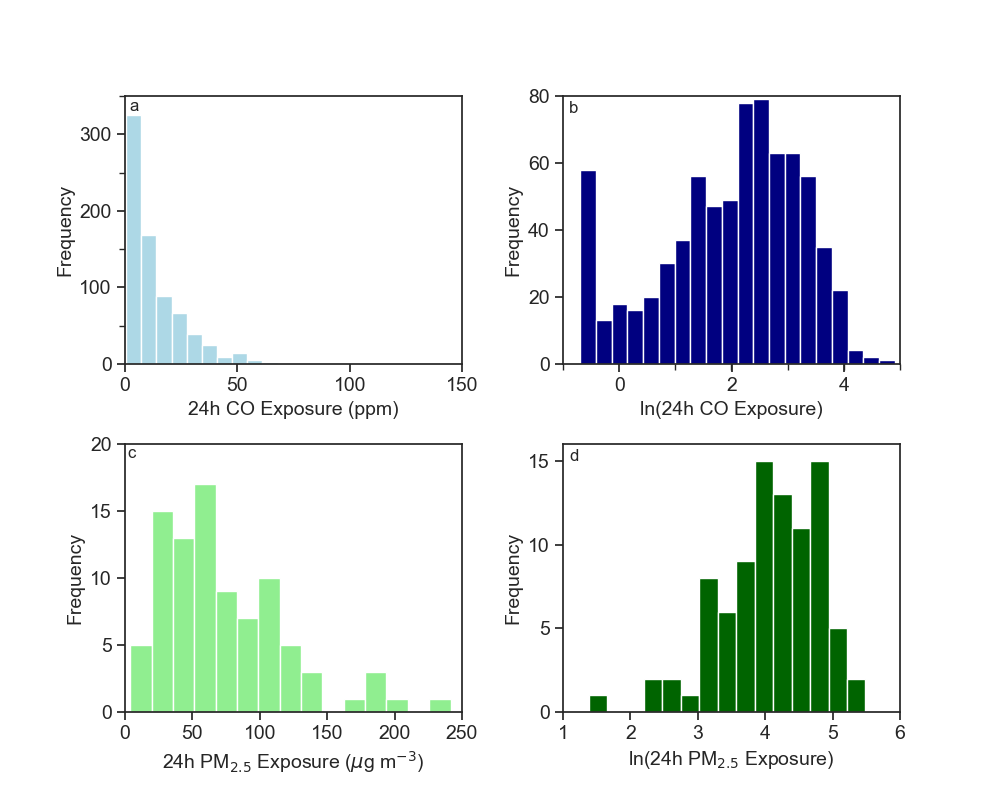

In [106]:
sns.set(style="white",font_scale=1.2)
sns.set_style("ticks")
fig20, axes20 = plt.subplots(2, 2, figsize=(10,8),sharey=False, sharex=False)
axes20[0,0].hist(db_CSA['CO'],color='lightblue',bins=20)
axes20[0,0].set_ylabel('Frequency',fontsize=14)
axes20[0,0].set_xlabel('24h CO Exposure (ppm)',fontsize = 14)
axes20[0,0].tick_params(labelsize=14)
axes20[0,0].set_ylim([0,350])
axes20[0,0].yaxis.set_minor_locator(MultipleLocator(50))
axes20[0,0].set_xlim([0,150])
axes20[0,0].text(2,330, 'a', fontsize = 12)

axes20[0,1].hist(np.log(db_CSA['CO']),color='navy',bins=20)
axes20[0,1].set_ylabel('Frequency',fontsize=14)
axes20[0,1].set_xlabel('ln(24h CO Exposure)',fontsize=14)
axes20[0,1].set_xlim([-1,5])
axes20[0,1].tick_params(labelsize=14)
axes20[0,1].set_ylim([0,80])
axes20[0,1].xaxis.set_minor_locator(MultipleLocator(0.999))
axes20[0,1].text(-0.9,75, 'b', fontsize = 12)

axes20[1,0].hist(db_CSA['PM'],color='lightgreen',bins=15)
axes20[1,0].set_ylabel('Frequency',fontsize=14)
axes20[1,0].set_xlabel('24h PM$_{2.5}$ Exposure ($\mu$g m$^{-3}$)',fontsize=14)
axes20[1,0].set_xlim([0,250])
axes20[1,0].tick_params(labelsize=14)
axes20[1,0].set_ylim([0,20])
axes20[1,0].text(2,19, 'c', fontsize = 12)

axes20[1,1].hist(np.log(db_CSA['PM']),color='darkgreen',bins=15)
axes20[1,1].set_ylabel('Frequency',fontsize=14)
axes20[1,1].set_xlabel('ln(24h PM$_{2.5}$ Exposure)',fontsize=14)
axes20[1,1].set_xlim([1,6])
axes20[1,1].tick_params(labelsize=14)
axes20[1,1].set_ylim([0,16])
axes20[1,1].text(1.1,15, 'd', fontsize = 12)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
fig20.savefig('logtransformed_histograms.jpg',transparent=False)

<IPython.core.display.Javascript object>


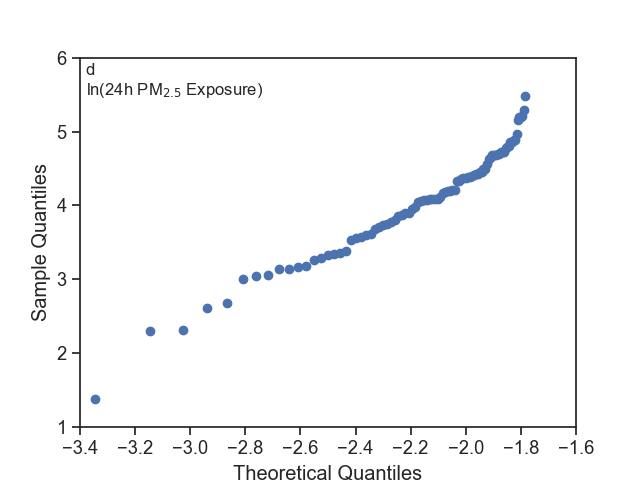

In [43]:
## gonna try qq plots now
db_CSA['ln_CO'] = np.log(db_CSA['CO'])
db_CSA['ln_PM'] = np.log(db_CSA['PM'])
#sm.qqplot(db_CSA['CO']) 
#sm.qqplot(db_CSA['ln_CO']) 
#sm.qqplot(db_CSA['PM']) 
sm.qqplot(db_CSA['ln_PM'])

plt.ylim((1,6))
plt.xlim((-3.4,-1.6))
plt.text(-3.38, 5.5, 'd\nln(24h PM$_{2.5}$ Exposure)', fontsize = 12)

plt.savefig('qqplots_d.jpg',transparent=False)

### DID Calculations:

#### Going to run some inital significance testing first:

In [109]:
# reload in CSV, redo subtraction, delete Nans
db_combine = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_combined_EM_CSV.csv',encoding='latin1',index_col=False)
db_combine['End_Base_CO_Diff']=db_combine['end CO']-db_combine['base CO']
db_combine['End_Base_PM_Diff']=db_combine['end PM']-db_combine['base PM']

db_combine['Ln_end_CO'] = np.log(db_combine['end CO'])
db_combine['Ln_end_PM'] = np.log(db_combine['end PM'])
db_combine['Ln_base_CO'] = np.log(db_combine['base CO'])
db_combine['Ln_base_PM'] = np.log(db_combine['base PM'])

# make two dataframes - one for CO and one for PM
db_combine_CO = db_combine.dropna(subset=['end CO'])
db_combine_PM = db_combine.dropna(subset=['end PM'])

#db_combine_CO['Ln_CO_Diff'] = np.log(db_combine_CO['End_Base_CO_Diff'])
#db_combine_PM['Ln_PM_Diff'] = np.log(db_combine_PM['End_Base_PM_Diff'])

In [110]:
# TOT
# do people who use ICSs have stat sig different exp than those that do not use?
# need to use db_CSA now and not db_combine because need a new entry for each CO/PM measurement
db_CSA = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_Cross_Sectional_All_EM_CSV.csv',encoding='latin1',index_col=False)
#db_CSA = db_CSA[db_CSA['New HHs']==0]

# AS OF FEB 2024: ONLY USING ENDLINE SUBSET
db_CSA = db_CSA[db_CSA['Phase']=='EL']

db_CSA['Ln_CO'] = np.log(db_CSA['CO'])
db_CSA['Ln_PM'] = np.log(db_CSA['PM'])

# make two dataframes - one for CO and one for PM
db_CSA_CO = db_CSA.dropna(subset=['CO'])
db_CSA_PM = db_CSA.dropna(subset=['PM'])

# split into SM and VL
db_CSA_CO_SM = db_CSA_CO[db_CSA_CO['Distributor']=='SM']
db_CSA_CO_VL = db_CSA_CO[db_CSA_CO['Distributor']=='VL']
db_CSA_PM_SM = db_CSA_PM[db_CSA_PM['Distributor']=='SM']
db_CSA_PM_VL = db_CSA_PM[db_CSA_PM['Distributor']=='VL']

In [111]:
# using all non-adopters each time
db_CSA_CO_SM_T = db_CSA_CO_SM[db_CSA_CO_SM['stove_ind_grp3']=='mm any'] # n=24
db_CSA_PM_SM_T = db_CSA_PM_SM[db_CSA_PM_SM['stove_ind_grp3']=='mm any'] # n=6
db_CSA_CO_VL_T = db_CSA_CO_VL[db_CSA_CO_VL['stove_ind_grp3']=='eco any'] # n=43
db_CSA_PM_VL_T = db_CSA_PM_VL[db_CSA_PM_VL['stove_ind_grp3']=='eco any'] # n=2

#db_CSA_CO_SM_C = db_CSA_CO[db_CSA_CO['stove_ind_grp3']!='mm any']
db_CSA_CO_C = db_CSA_CO[~db_CSA_CO['stove_ind_grp3'].isin(['mm any', 'eco any'])] # n=185
db_CSA_PM_C = db_CSA_PM[~db_CSA_PM['stove_ind_grp3'].isin(['mm any', 'eco any'])] # n=23

In [114]:
# t-test
from scipy import stats

#stats.ttest_ind(db_CSA_CO_SM_T['Ln_CO'],db_CSA_CO_C['Ln_CO']) 
#stats.ttest_ind(db_CSA_PM_SM_T['Ln_PM'],db_CSA_PM_C['Ln_PM']) 
#stats.ttest_ind(db_CSA_CO_VL_T['Ln_CO'],db_CSA_CO_C['Ln_CO']) 
stats.ttest_ind(db_CSA_PM_VL_T['Ln_PM'],db_CSA_PM_C['Ln_PM']) 

Ttest_indResult(statistic=0.170024440549439, pvalue=0.8664776144455015)

#### DiD:

In [120]:
# make four data frames
# load in cross sectional csv
db_CSA = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_Cross_Sectional_All_EM_CSV.csv',encoding='latin1',index_col=False)


In [121]:
# need to drop NaN rows if using any of these variables - model doesn't like
#db_CSA = db_CSA.dropna(subset=['gap_code'])
#db_CSA = db_CSA.dropna(subset=['openwindows_code'])
db_CSA = db_CSA.dropna(subset=['vent_code_binary'])
db_CSA = db_CSA.dropna(subset=['cookloc_code_binary'])
#db_CSA = db_CSA.dropna(subset=['cookloc_code'])
#db_CSA = db_CSA.dropna(subset=['hhmembercount'])
db_CSA = db_CSA.dropna(subset=['expenditure_code'])
#db_CSA = db_CSA.dropna(subset=['hometype_code'])
db_CSA = db_CSA.reset_index()

In [122]:
#db_DiD = db_CSA # all HHs
#db_DiD = db_CSA[db_CSA['New HHs']==0] # panel HHs only

In [123]:
db_DiD_CO = db_DiD.dropna(subset=['CO'])
db_DiD_PM = db_DiD.dropna(subset=['PM'])
db_DiD_CO['ln_CO'] = np.log(db_DiD_CO['CO'])
db_DiD_PM['ln_PM'] = np.log(db_DiD_PM['PM'])

db_DiD_CO_Kal = db_DiD_CO[db_DiD_CO['Compound']=='Kalingalinga']
db_DiD_CO_Ngo = db_DiD_CO[db_DiD_CO['Compound']=='Ngombe']
db_DiD_PM_Kal = db_DiD_PM[db_DiD_PM['Compound']=='Kalingalinga']
db_DiD_PM_Ngo = db_DiD_PM[db_DiD_PM['Compound']=='Ngombe']

In [127]:
# SM - CO - models 1, 2, 3
mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_CO_Kal).fit().resid
#mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_CO_Kal).fit().resid
#mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_CO_Kal).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_DiD_SM_CO_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_DiD_SM_CO_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_DiD_SM_CO_OLS_resid)))
sigma = rho ** order

md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_CO_Kal, sigma=sigma)
#md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_CO_Kal, sigma=sigma)
#md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_CO_Kal, sigma=sigma)

mdf_DiD_SM_CO_GLS = md_DiD_SM_CO_GLS.fit()
print(mdf_DiD_SM_CO_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.023
Model:                            GLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.983
Date:                Tue, 06 Aug 2024   Prob (F-statistic):              0.117
Time:                        14:31:56   Log-Likelihood:                -432.68
No. Observations:                 261   AIC:                             873.4
Df Residuals:                     257   BIC:                             887.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [128]:
# SM - PM
# no T1 of panel HHs (6 new HHs)
mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_PM_Kal).fit().resid
#mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_PM_Kal).fit().resid
#mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_PM_Kal).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_DiD_SM_PM_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_DiD_SM_PM_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_DiD_SM_PM_OLS_resid)))
sigma = rho ** order

md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_PM_Kal, sigma=sigma)
#md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_PM_Kal, sigma=sigma)
#md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_PM_Kal, sigma=sigma)

mdf_DiD_SM_PM_GLS = md_DiD_SM_PM_GLS.fit()
print(mdf_DiD_SM_PM_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_PM   R-squared:                       0.694
Model:                            GLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           7.47e-08
Time:                        14:32:05   Log-Likelihood:                -18.001
No. Observations:                  34   AIC:                             44.00
Df Residuals:                      30   BIC:                             50.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [131]:
# VL - CO
md_DiD_VL_CO = smf.ols("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_CO_Ngo)
#md_DiD_VL_CO = smf.ols("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_CO_Ngo)
#md_DiD_VL_CO = smf.ols("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_CO_Ngo)

md_DiD_VL_CO = md_DiD_VL_CO.fit()
print(md_DiD_VL_CO.summary())

                            OLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.75
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           9.57e-07
Time:                        14:33:18   Log-Likelihood:                -507.45
No. Observations:                 318   AIC:                             1023.
Df Residuals:                     314   BIC:                             1038.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [132]:
# VL - PM
mdf_DiD_VL_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_PM_Ngo).fit().resid
#mdf_DiD_VL_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_PM_Ngo).fit().resid
#mdf_DiD_VL_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(Compound, Treatment('Kamanga')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_PM_Ngo).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_DiD_VL_PM_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_DiD_VL_PM_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_DiD_VL_PM_OLS_resid)))
sigma = rho ** order

md_DiD_VL_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=db_DiD_PM_Ngo, sigma=sigma)
#md_DiD_VL_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=db_DiD_PM_Ngo, sigma=sigma)
#md_DiD_VL_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(Compound, Treatment('Kamanga')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=db_DiD_PM_Ngo, sigma=sigma)

mdf_DiD_VL_PM_GLS = md_DiD_VL_PM_GLS.fit()
print(mdf_DiD_VL_PM_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_PM   R-squared:                       0.468
Model:                            GLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     23.79
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.23e-05
Time:                        14:33:21   Log-Likelihood:                -21.687
No. Observations:                  29   AIC:                             47.37
Df Residuals:                      27   BIC:                             50.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


#### After propensity score matching (done separately in R):

In [133]:
psm_CO_SM = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\Propensity Score Matching\ZCCS_PSM_matched_CO_SM_Kal_ELmatch.csv',encoding='latin1',index_col=False)
# some matches don't have exp data so drop those
psm_CO_SM = psm_CO_SM.dropna(subset=['CO'])

psm_CO_SM['ln_CO'] = np.log(psm_CO_SM['CO'])

# if needed
psm_CO_SM = psm_CO_SM.dropna(subset=['cookloc_code'])
psm_CO_SM = psm_CO_SM.dropna(subset=['vent_code_binary'])

# first no hh variables, just time, treat, int
#mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
#                data=psm_CO_SM).fit().resid
# first no hh variables, just time, treat, int, and elec_mask
#mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=psm_CO_SM).fit().resid
# hh controls only
#mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(cookloc_code, Treatment('not in')) + vent_code_binary",
#                data=psm_CO_SM).fit().resid
#mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + cookloc_code_binary + vent_code_binary + cookloc_code_binary:vent_code_binary",
#                data=psm_CO_SM).fit().resid
# all controls
mdf_DiD_SM_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
                data=psm_CO_SM).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_DiD_SM_CO_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_DiD_SM_CO_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_DiD_SM_CO_OLS_resid)))
sigma = rho ** order

#md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
#                data=psm_CO_SM, sigma=sigma)
#md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=psm_CO_SM, sigma=sigma)
# hh controls only
#md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(cookloc_code, Treatment('not in')) + vent_code_binary",
#                data=psm_CO_SM, sigma=sigma)
#md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + cookloc_code_binary + vent_code_binary + cookloc_code_binary:vent_code_binary",
#                data=psm_CO_SM, sigma=sigma)
# all controls
md_DiD_SM_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
                data=psm_CO_SM, sigma=sigma)

mdf_DiD_SM_CO_GLS = md_DiD_SM_CO_GLS.fit()
print(mdf_DiD_SM_CO_GLS.summary())
#mdf_CO_GLS.summary()
#print('R²: ', mdf_CO.rsquared)

                            GLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.544
Model:                            GLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     1.909
Date:                Tue, 06 Aug 2024   Prob (F-statistic):              0.120
Time:                        14:33:37   Log-Likelihood:                -30.102
No. Observations:                  27   AIC:                             82.20
Df Residuals:                      16   BIC:                             96.46
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [134]:
psm_PM_SM = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\Propensity Score Matching\ZCCS_PSM_matched_PM_SM_Kal_ELmatch.csv',encoding='latin1',index_col=False)
# some matches don't have exp data so drop those
psm_PM_SM = psm_PM_SM.dropna(subset=['PM'])

psm_PM_SM['ln_PM'] = np.log(psm_PM_SM['PM'])

# if needed
#psm_PM_SM = psm_PM_SM.dropna(subset=['cookloc_code'])
#psm_PM_SM = psm_PM_SM.dropna(subset=['vent_code_binary'])

# first no hh variables, just time, treat, int
mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=psm_PM_SM).fit().resid
# first no hh variables, just time, treat, int, and elec_mask
#mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=psm_PM_SM).fit().resid
# hh controls only
#mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(cookloc_code, Treatment('not in')) + vent_code_binary",
#                data=psm_PM_SM).fit().resid
#mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + cookloc_code_binary + vent_code_binary + cookloc_code_binary:vent_code_binary",
#                data=psm_PM_SM).fit().resid
# all controls
#mdf_DiD_SM_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=psm_PM_SM).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_DiD_SM_PM_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_DiD_SM_PM_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_DiD_SM_PM_OLS_resid)))
sigma = rho ** order

md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
                data=psm_PM_SM, sigma=sigma)
#md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=psm_PM_SM, sigma=sigma)
# hh controls only
#md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(cookloc_code, Treatment('not in')) + vent_code_binary",
#                data=psm_PM_SM, sigma=sigma)
#md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + cookloc_code_binary + vent_code_binary + cookloc_code_binary:vent_code_binary",
#                data=psm_PM_SM, sigma=sigma)
# all controls
#md_DiD_SM_PM_GLS = sm.GLS.from_formula("ln_PM ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
#                data=psm_PM_SM, sigma=sigma)

mdf_DiD_SM_PM_GLS = md_DiD_SM_PM_GLS.fit()
print(mdf_DiD_SM_PM_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_PM   R-squared:                       0.707
Model:                            GLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     6.021
Date:                Tue, 06 Aug 2024   Prob (F-statistic):             0.0466
Time:                        14:33:48   Log-Likelihood:                -2.0168
No. Observations:                   8   AIC:                             10.03
Df Residuals:                       5   BIC:                             10.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [135]:
psm_CO_VL = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\Propensity Score Matching\ZCCS_PSM_matched_CO_VL_Ngo_ELmatch.csv',encoding='latin1',index_col=False)
# some matches don't have exp data so drop those
psm_CO_VL = psm_CO_VL.dropna(subset=['CO'])

psm_CO_VL['ln_CO'] = np.log(psm_CO_VL['CO'])

# if needed
psm_CO_VL = psm_CO_VL.dropna(subset=['cookloc_code'])
psm_CO_VL = psm_CO_VL.dropna(subset=['vent_code_binary'])

# first no hh variables, just time, treat, int
#mdf_DiD_VL_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
#                data=psm_CO_VL).fit().resid
# first no hh variables, just time, treat, int, and elec_mask
#mdf_DiD_VL_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=psm_CO_VL).fit().resid
# hh controls only
#mdf_DiD_VL_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(cookloc_code, Treatment('not in')) + vent_code_binary",
#                data=psm_CO_VL).fit().resid
#mdf_DiD_VL_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + cookloc_code_binary + vent_code_binary + cookloc_code_binary:vent_code_binary",
#                data=psm_CO_VL).fit().resid
# all controls
mdf_DiD_VL_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
                data=psm_CO_VL).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_DiD_VL_CO_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_DiD_VL_CO_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_DiD_VL_CO_OLS_resid)))
sigma = rho ** order

#md_DiD_VL_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo",
#                data=psm_CO_VL, sigma=sigma)
#md_DiD_VL_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask",
#                data=psm_CO_VL, sigma=sigma)
# hh controls only
#md_DiD_VL_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(cookloc_code, Treatment('not in')) + vent_code_binary",
#                data=psm_CO_VL, sigma=sigma)
#md_DiD_VL_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + cookloc_code_binary + vent_code_binary + cookloc_code_binary:vent_code_binary",
#                data=psm_CO_VL, sigma=sigma)
# all controls
md_DiD_VL_CO_GLS = sm.GLS.from_formula("ln_CO ~ DiD_X1_Time + DiD_X2_Treat_TOT_Kal_Ngo + DiD_X1_Time:DiD_X2_Treat_TOT_Kal_Ngo + elec_mask + C(Season, Treatment('Cool')) + C(cookloc_code, Treatment('not in')) + vent_code_binary + C(expenditure_code, Treatment('Q1'))",
                data=psm_CO_VL, sigma=sigma)

mdf_DiD_VL_CO_GLS = md_DiD_VL_CO_GLS.fit()
print(mdf_DiD_VL_CO_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.205
Model:                            GLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.285
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.52e-05
Time:                        14:34:01   Log-Likelihood:                -274.00
No. Observations:                 177   AIC:                             570.0
Df Residuals:                     166   BIC:                             604.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Cross-Sectional Analysis:

In [137]:
# load in cross sectional csv
db_CSA = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_2021_Cross_Sectional_All_EM_CSV.csv',encoding='latin1',index_col=False)

# add ln()
db_CSA['ln_CO'] = np.log(db_CSA['CO'])
db_CSA['ln_PM'] = np.log(db_CSA['PM'])

# subset by CO and PM and delete nans
db_CSA_CO = db_CSA.dropna(subset=['CO'])
db_CSA_PM = db_CSA.dropna(subset=['PM'])
db_CSA_CO = db_CSA_CO.reset_index()
db_CSA_PM = db_CSA_PM.reset_index()

# need to drop NaN rows if using any of these variables - model doesn't like
#db_CSA_CO = db_CSA_CO.dropna(subset=['gap_code'])
db_CSA_CO = db_CSA_CO.dropna(subset=['openwindows_code'])
db_CSA_CO = db_CSA_CO.dropna(subset=['cookloc_code'])
#db_CSA_CO = db_CSA_CO.dropna(subset=['hhmembercount'])
db_CSA_CO = db_CSA_CO.dropna(subset=['expenditure_code'])
#db_CSA_CO = db_CSA_CO.dropna(subset=['hometype_code'])
db_CSA_CO = db_CSA_CO.reset_index()

#db_CSA_PM = db_CSA_PM.dropna(subset=['gap_code'])
db_CSA_PM = db_CSA_PM.dropna(subset=['openwindows_code'])
db_CSA_PM = db_CSA_PM.dropna(subset=['cookloc_code'])
#db_CSA_PM = db_CSA_PM.dropna(subset=['hhmembercount'])
db_CSA_PM = db_CSA_PM.dropna(subset=['expenditure_code'])
#db_CSA_PM = db_CSA_PM.dropna(subset=['hometype_code'])
#db_CSA_PM = db_CSA_PM.dropna(subset=['othersource'])
db_CSA_PM = db_CSA_PM.reset_index()

In [47]:
# good resource: https://www.pythonfordatascience.org/mixed-effects-regression-python/

#### CO:

In [142]:
# CO
md_CO = smf.ols("ln_CO ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('not in')) + C(expenditure_code, Treatment('Q1'))",
                data=db_CSA_CO)
#md_CO = smf.mixedlm("ln_CO ~ C(prim_stove, Treatment('mbaula')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Ngombe')) + C(cookloc_code, Treatment('not in')) + C(expenditure_code, Treatment('Q1'))",
#                         db_CSA_CO, groups=db_CSA_CO['HHID'])
#md_CO = smf.mixedlm("ln_CO ~ C(stove_ind_grp2, Treatment('charc exc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Ngombe'))",
#                         db_CSA_CO, groups=db_CSA_CO['HHID'])
#md_CO = smf.mixedlm("ln_CO ~ C(stove_ind_grp2, Treatment('charc exc')) + C(Season, Treatment('Cool'))",
#                         db_CSA_CO, groups=db_CSA_CO['Compound'])
#md_CO = smf.mixedlm("ln_CO ~ C(stove_ind_grp2, Treatment('charc exc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Ngombe')) + C(stove_ind_grp2, Treatment('charc exc')):C(Compound, Treatment('Ngombe'))",
#                        db_CSA_CO, groups=db_CSA_CO['HHID'])

# CO with continuous stove use variables:
#md_CO = smf.mixedlm("ln_CO ~ eco_count + elec_count + gaskero_count + wood_count + mimimoto_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))+ C(cookloc_code, Treatment('not in'))",
#                         db_CSA_CO, groups=db_CSA_CO['HHID'])
mdf_CO = md_CO.fit()
#mdf_CO = md_CO.fit(method=["lbfgs"])   # regarding method: https://www.statsmodels.org/stable/optimization.html?highlight=lbfgs
#mdf_CO = md_CO.fit(method=['bfgs'])
#mdf_CO = md_CO.fit(method=["powell", "lbfgs"])

print(mdf_CO.summary())
#print('R²: ', mdf_CO.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     12.39
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           3.42e-29
Time:                        14:37:29   Log-Likelihood:                -1139.7
No. Observations:                 743   AIC:                             2313.
Df Residuals:                     726   BIC:                             2392.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [143]:
# trying GLS -- FINAL
# https://www.statsmodels.org/dev/examples/notebooks/generated/gls.html
# smf.ols = sm.OLS.from_formula (https://www.statsmodels.org/stable/api.html)
mdf_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('in')) + C(openwindows_code, Treatment('no vent')) + C(expenditure_code, Treatment('Q1'))",
                data=db_CSA_CO).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_CO_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_CO_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_CO_OLS_resid)))
sigma = rho ** order

md_CO_GLS = sm.GLS.from_formula("ln_CO ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))  + C(cookloc_code, Treatment('in')) + C(openwindows_code, Treatment('no vent')) + C(expenditure_code, Treatment('Q1'))",
                data=db_CSA_CO, sigma=sigma)
mdf_CO_GLS = md_CO_GLS.fit()
print(mdf_CO_GLS.summary())
#mdf_CO_GLS.summary()

                            GLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.205
Model:                            GLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     11.01
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           6.37e-27
Time:                        14:37:32   Log-Likelihood:                -1138.1
No. Observations:                 743   AIC:                             2312.
Df Residuals:                     725   BIC:                             2395.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [144]:
# with stove count variables

#mdf_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ eco_count + elec_count + gaskero_count + imprcharc_count + wood_count + mimimoto_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('not in')) + C(expenditure_code, Treatment('Q1'))",
#                data=db_CSA_CO).fit().resid
mdf_CO_OLS_resid = sm.OLS.from_formula("ln_CO ~ eco_count + elec_count + imprcharc_count + mimimoto_count + other_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('in')) + C(openwindows_code, Treatment('no vent')) + C(expenditure_code, Treatment('Q1'))",
                data=db_CSA_CO).fit().resid
                                       
resid_fit = sm.OLS(np.asarray(mdf_CO_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_CO_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_CO_OLS_resid)))
sigma = rho ** order

#md_CO_GLS = sm.GLS.from_formula("ln_CO ~ eco_count + elec_count + gaskero_count + imprcharc_count + wood_count + mimimoto_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))  + C(cookloc_code, Treatment('not in')) + C(expenditure_code, Treatment('Q1'))",
#                data=db_CSA_CO, sigma=sigma)
md_CO_GLS = sm.GLS.from_formula("ln_CO ~ eco_count + elec_count + imprcharc_count + mimimoto_count + other_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('in')) + C(openwindows_code, Treatment('no vent')) + C(expenditure_code, Treatment('Q1'))",
                data=db_CSA_CO, sigma=sigma)
mdf_CO_GLS = md_CO_GLS.fit()
print(mdf_CO_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_CO   R-squared:                       0.201
Model:                            GLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           3.68e-27
Time:                        14:37:34   Log-Likelihood:                -1140.3
No. Observations:                 743   AIC:                             2313.
Df Residuals:                     727   BIC:                             2386.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### PM:

In [145]:
# PM
md_PM  = smf.ols("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('not in'))",
                data=db_CSA_PM)

#md_PM = smf.mixedlm("ln_PM ~ C(stove_ind_grp2, Treatment('charc exc')) + C(Season, Treatment('Cool'))",
#                         db_CSA_PM, groups=db_CSA_PM['Compound'])
#md_PM = smf.mixedlm("ln_PM ~ C(stove_ind_grp1, Treatment('charc exc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Ngombe')) + C(cookloc_code, Treatment('not in'))",
#                         db_CSA_PM, groups=db_CSA_PM['HHID'])
#md_PM = smf.mixedlm("ln_PM ~ C(stove_ind_grp2, Treatment('charc exc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Ngombe'))",
#                         db_CSA_PM, groups=db_CSA_PM['HHID'])
#md_PM = smf.mixedlm("ln_PM ~ C(stove_ind_grp2, Treatment('charc exc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Ngombe'))+ C(stove_ind_grp2, Treatment('charc exc')):C(Compound, Treatment('Ngombe'))",
#                         db_CSA_PM, groups=db_CSA_PM['HHID'])
# PM with continuous stove use variables:
#md_PM = smf.mixedlm("ln_PM ~ eco_count + elec_count + charc_count + mimimoto_count + C(Season, Treatment('Cold'))",
#                         db_CSA_PM, groups=db_CSA_PM['Compound'])

mdf_PM = md_PM.fit()
#mdf = md.fit(method=["lbfgs"])   # regarding method: https://www.statsmodels.org/stable/optimization.html?highlight=lbfgs

print(mdf_PM.summary())

                            OLS Regression Results                            
Dep. Variable:                  ln_PM   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     5.739
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.29e-06
Time:                        14:37:41   Log-Likelihood:                -70.305
No. Observations:                  86   AIC:                             164.6
Df Residuals:                      74   BIC:                             194.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [146]:
# trying GLS for PM -- FINAL
# https://www.statsmodels.org/dev/examples/notebooks/generated/gls.html
# smf.ols = sm.OLS.from_formula (https://www.statsmodels.org/stable/api.html)
mdf_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code,Treatment('in')) + C(openwindows_code, Treatment('no vent'))",
                data=db_CSA_PM).fit().resid
#mdf_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))",
#                data=db_CSA_PM).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_PM_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_PM_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_PM_OLS_resid)))
sigma = rho ** order

md_PM_GLS = sm.GLS.from_formula("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('in')) + C(openwindows_code, Treatment('no vent'))",
                data=db_CSA_PM, sigma=sigma)
#md_PM_GLS = sm.GLS.from_formula("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))",
#                data=db_CSA_PM, sigma=sigma)
mdf_PM_GLS = md_PM_GLS.fit()
print(mdf_PM_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_PM   R-squared:                       0.573
Model:                            GLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     8.150
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.83e-09
Time:                        14:37:43   Log-Likelihood:                -66.835
No. Observations:                  86   AIC:                             159.7
Df Residuals:                      73   BIC:                             191.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [8]:
# no gaskero_count or wood_count so removing!

mdf_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ eco_count + elec_count + mimimoto_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code,Treatment('not in'))",
                data=db_CSA_PM).fit().resid
#mdf_PM_OLS_resid = sm.OLS.from_formula("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))",
#                data=db_CSA_PM).fit().resid

resid_fit = sm.OLS(np.asarray(mdf_PM_OLS_resid)[1:], sm.add_constant(np.asarray(mdf_PM_OLS_resid)[:-1])).fit()
rho = resid_fit.params[1]
from scipy.linalg import toeplitz
order = toeplitz(range(len(mdf_PM_OLS_resid)))
sigma = rho ** order

md_PM_GLS = sm.GLS.from_formula("ln_PM ~ eco_count + elec_count + mimimoto_count + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero')) + C(cookloc_code, Treatment('not in'))",
                data=db_CSA_PM, sigma=sigma)
#md_PM_GLS = sm.GLS.from_formula("ln_PM ~ C(stove_ind_grp3, Treatment('trad charc')) + C(Season, Treatment('Cool')) + C(Compound, Treatment('Matero'))",
#                data=db_CSA_PM, sigma=sigma)
mdf_PM_GLS = md_PM_GLS.fit()
print(mdf_PM_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                  ln_PM   R-squared:                       0.481
Model:                            GLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     8.932
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.41e-08
Time:                        13:07:30   Log-Likelihood:                -72.041
No. Observations:                  86   AIC:                             162.1
Df Residuals:                      77   BIC:                             184.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>


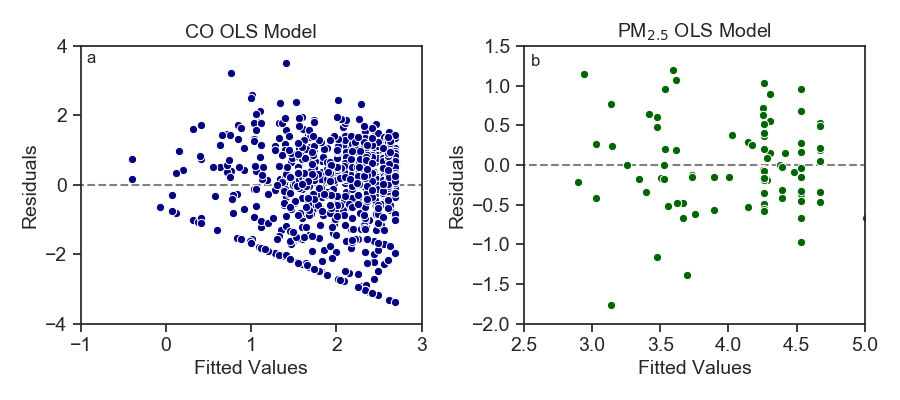

In [147]:
#sm.qqplot(mdf_CO.resid,dist=stats.norm,line='s')
#sns.scatterplot(y=mdf_CO.resid,x=mdf_CO.fittedvalues)

sns.set(style="white",font_scale=1.2)
sns.set_style("ticks")
fig21, axes21 = plt.subplots(1, 2, figsize=(9,4),sharey=False, sharex=False)

sns.scatterplot(ax=axes21[0],x=mdf_CO.fittedvalues, y=mdf_CO.resid,
                color='navy')
axes21[0].plot([-2, 25],[0, 0],'--',color='gray',zorder=0)
axes21[0].set_title('CO OLS Model',size=14)
axes21[0].set_ylabel('Residuals',fontsize=14)
axes21[0].set_xlabel('Fitted Values',fontsize = 14)
axes21[0].tick_params(labelsize=14)
axes21[0].set_ylim([-4,4])
#axes21[0].yaxis.set_minor_locator(MultipleLocator(50))
axes21[0].set_xlim([-1,3])
axes21[0].text(-0.93,3.5, 'a', fontsize = 12)

sns.scatterplot(ax=axes21[1],x=mdf_PM.fittedvalues, y=mdf_PM.resid,
                color='darkgreen')
axes21[1].plot([-2, 25],[0, 0],'--',color='gray',zorder=0)
axes21[1].set_title('PM$_{2.5}$ OLS Model',size=14)
axes21[1].set_ylabel('Residuals',fontsize=14)
axes21[1].set_xlabel('Fitted Values',fontsize = 14)
axes21[1].tick_params(labelsize=14)
axes21[1].set_ylim([-2,1.5])
#axes21[1].yaxis.set_minor_locator(MultipleLocator(50))
axes21[1].set_xlim([2.5,5])
axes21[1].text(2.55,1.25, 'b', fontsize = 12)

fig21.tight_layout()
fig21.savefig('heteroskedastic_figs.jpg',transparent=False)

#### Trying to Make Regression Results into a Figure

In [148]:
# making two data frames with coefficients and CIs
d ={'name':['electric exclusive vs trad charcoal','electric + charcoal vs trad charcoal','charcoal + electric vs trad charcoal','improved charcoal vs trad charcoal','Mimi Moto any vs trad charcoal','EcoZoom any vs trad charcoal','other vs trad charcoal','warm vs cool season',"Kalingalinga vs Matero","Kamanga vs Matero","Ng'ombe vs Matero",'cook not in vs cook in','vent vs not vent','Q2 vs Q1','Q3 vs Q1','Q4 vs Q1','Q5 vs Q1'],
    'coeff':[-2.2792,-1.3403,-0.3685,-0.1034,-0.1573,-0.2228,-0.7854,-0.6735,0.6346,0.9654,0.8021,-0.2521,-0.058,0.1011,0.039,0.0342,-0.0536],
    'low_CI':[-2.968,-1.715,-0.615,-0.401,-0.646,-0.6,-1.642,-0.877,0.164,0.372,0.312,-0.45,-0.272,-0.156,-0.236,-0.235,-0.333],
    'up_CI':[-1.59,-0.966,-0.122,0.195,0.331,0.155,0.071,-0.47,1.105,1.559,1.293,-0.054,0.156,0.358,0.314,0.304,0.226],
    'sig':[1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0]}

# ------ OLD WITH STOVE INDICATOR GROUP 2 ------
#d ={'name':['Electric Exclusive vs Charcoal','Charcoal + Electric vs Charcoal','Mimi Moto Any vs Charcoal','EcoZoom Any vs Charcoal','Other vs Charcoal','Warm vs Cool Season',"Matero vs Ng'ombe","Kalingalinga vs Ng'ombe","Kamanga vs Ng'ombe",'Cook In vs Cook Not In','Q2 vs Q1','Q3 vs Q1','Q4 vs Q1','Q5 vs Q1'],
#    'coeff':[-2.6547,-0.6461,-0.1153,-0.2009,-0.8412,-0.6964,-0.8578,-0.2102,0.1475,0.2592,0.1171,0.0311,0.0077,-0.0682],
#    'low_CI':[-3.398,-0.882,-0.630,-0.602,-1.769,-0.907,-1.391,-0.442,-0.267,0.071,-0.161,-0.266,-0.284,-0.371],
#    'up_CI':[-1.911,-0.410,0.399,0.200,0.087,-0.486,-0.325,0.021,0.562,0.447,0.396,0.328,0.299,0.235],
#    'sig':[1,1,0,0,0,1,1,0,0,1,0,0,0,0]}

CSA_CO_results = pd.DataFrame(data=d)
#CSA_CO_results['coeff_trans'] = (np.exp(CSA_CO_results['coeff'])-1)*100 # % change
#CSA_CO_results['coeff_trans'] = (np.exp(CSA_CO_results['coeff'])-1)*100 + 100 # % of original
CSA_CO_results['coeff_trans'] = (np.exp(CSA_CO_results['coeff'])-1)*1 + 1 # change of original <--- what we want to plot
CSA_CO_results['low_CI_trans'] = (np.exp(CSA_CO_results['low_CI'])-1)*1 + 1
CSA_CO_results['up_CI_trans'] = (np.exp(CSA_CO_results['up_CI'])-1)*1 + 1

d ={'name':['electric exclusive vs trad charcoal','electric + charcoal vs trad charcoal','charcoal + electric vs trad charcoal','improved charcoal vs trad charcoal','Mimi Moto any vs trad charcoal','EcoZoom any vs trad charcoal','warm vs cool season',"Kalingalinga vs Matero","Kamanga vs Matero","Ng'ombe vs Matero",'cook not in vs cook in','vent vs not vent'],
    'coeff':[-0.3798,-0.0989,-0.3745,0.1623,0.4817,0.0457,-1.0501,-0.0481,-0.2851,-0.1754,-0.2669,-0.0792],
    'low_CI':[-1.553,-0.698,-0.754,-0.339,-0.093,-0.734,-1.319,-0.437,-1.002,-0.611,-0.544,-0.45],
    'up_CI':[0.793,0.5,0.005,0.664,1.056,0.826,-0.782,0.341,0.432,0.26,0.01,0.292],
    'sig':[0,0,0,0,0,0,1,0,0,0,0,0]}

# ------ OLD WITH STOVE INDICATOR GROUP 2 ------
#d ={'name':['Electric Exclusive vs Charcoal','Charcoal + Electric vs Charcoal','Mimi Moto Any vs Charcoal','EcoZoom Any vs Charcoal','Warm vs Cool Season',"Matero vs Ng'ombe","Kalingalinga vs Ng'ombe","Kamanga vs Ng'ombe"],
#    'coeff':[-0.2358,-0.3162,0.3323,0.1859,-0.9958,0.0876,0.1877,-0.1613],
#    'low_CI':[-1.392,-0.636,-0.191,-0.551,-1.226,-0.339,-0.070,-0.826],
#    'up_CI':[0.921,0.003,0.856,0.923,-0.766,0.514,0.445,0.504],
#    'sig':[0,0,0,0,1,0,0,0]}

CSA_PM_results = pd.DataFrame(data=d)
#CSA_PM_results['coeff_trans'] = (np.exp(CSA_PM_results['coeff'])-1)*100 # % change
#CSA_PM_results['coeff_trans'] = (np.exp(CSA_PM_results['coeff'])-1)*100 + 100 # % of original
CSA_PM_results['coeff_trans'] = (np.exp(CSA_PM_results['coeff'])-1)*1 + 1 # change of original <--- what we want to plot
CSA_PM_results['low_CI_trans'] = (np.exp(CSA_PM_results['low_CI'])-1)*1 + 1
CSA_PM_results['up_CI_trans'] = (np.exp(CSA_PM_results['up_CI'])-1)*1 + 1


<IPython.core.display.Javascript object>


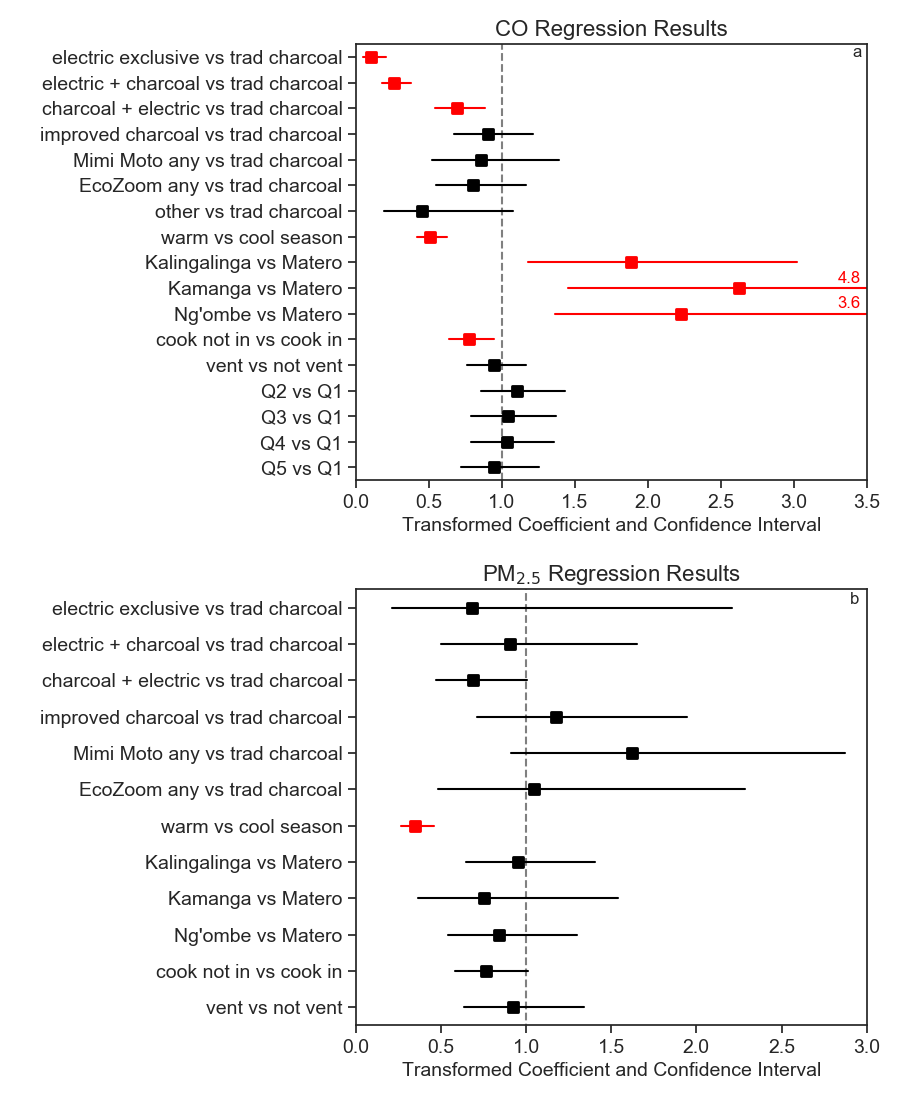

In [150]:
# set up multi-panel figure
#sns.set(style="white",palette="tab10",font_scale=1.1) # old color palette
sig_palette=['black','red']
sns.set(style="white",palette=sig_palette,font_scale=1.1)
sns.set_style("ticks")
fig20, axes20 = plt.subplots(2, 1, figsize=(9,11),sharey=False, sharex=False)

# CO
axes20[0].plot([1,1],[-1,20],color='gray',linestyle='--',zorder=0)
sns.pointplot(ax=axes20[0], x='coeff_trans', y='name',data=CSA_CO_results,
             join=False, markers="s",hue='sig',style='sig')
axes20[0].get_legend().remove()
axes20[0].plot([CSA_CO_results['low_CI_trans'][0],CSA_CO_results['up_CI_trans'][0]],[CSA_CO_results['name'][0],CSA_CO_results['name'][0]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][1],CSA_CO_results['up_CI_trans'][1]],[CSA_CO_results['name'][1],CSA_CO_results['name'][1]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][2],CSA_CO_results['up_CI_trans'][2]],[CSA_CO_results['name'][2],CSA_CO_results['name'][2]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][3],CSA_CO_results['up_CI_trans'][3]],[CSA_CO_results['name'][3],CSA_CO_results['name'][3]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][4],CSA_CO_results['up_CI_trans'][4]],[CSA_CO_results['name'][4],CSA_CO_results['name'][4]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][5],CSA_CO_results['up_CI_trans'][5]],[CSA_CO_results['name'][5],CSA_CO_results['name'][5]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][6],CSA_CO_results['up_CI_trans'][6]],[CSA_CO_results['name'][6],CSA_CO_results['name'][6]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][7],CSA_CO_results['up_CI_trans'][7]],[CSA_CO_results['name'][7],CSA_CO_results['name'][7]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][8],CSA_CO_results['up_CI_trans'][8]],[CSA_CO_results['name'][8],CSA_CO_results['name'][8]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][9],CSA_CO_results['up_CI_trans'][9]],[CSA_CO_results['name'][9],CSA_CO_results['name'][9]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][10],CSA_CO_results['up_CI_trans'][10]],[CSA_CO_results['name'][10],CSA_CO_results['name'][10]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][11],CSA_CO_results['up_CI_trans'][11]],[CSA_CO_results['name'][11],CSA_CO_results['name'][11]],color='red')
axes20[0].plot([CSA_CO_results['low_CI_trans'][12],CSA_CO_results['up_CI_trans'][12]],[CSA_CO_results['name'][12],CSA_CO_results['name'][12]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][13],CSA_CO_results['up_CI_trans'][13]],[CSA_CO_results['name'][13],CSA_CO_results['name'][13]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][14],CSA_CO_results['up_CI_trans'][14]],[CSA_CO_results['name'][14],CSA_CO_results['name'][14]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][15],CSA_CO_results['up_CI_trans'][15]],[CSA_CO_results['name'][15],CSA_CO_results['name'][15]],color='black')
axes20[0].plot([CSA_CO_results['low_CI_trans'][16],CSA_CO_results['up_CI_trans'][16]],[CSA_CO_results['name'][16],CSA_CO_results['name'][16]],color='black')
axes20[0].set_title('CO Regression Results',y=1,size=16)
axes20[0].text(3.4,0, 'a', fontsize = 12)
axes20[0].text(3.3,8.8, '4.8', fontsize = 12,color='red')
axes20[0].text(3.3,9.8, '3.6', fontsize = 12,color='red')
axes20[0].tick_params(labelsize=14)
axes20[0].set_ylabel(" ", fontsize=12)
axes20[0].set_xlabel("Transformed Coefficient and Confidence Interval", fontsize=14)
axes20[0].set_ylim((16.5,-0.5))
axes20[0].set_xlim((0,3.5))

# PM
axes20[1].plot([1,1],[-1,20],color='gray',linestyle='--',zorder=0)
sns.pointplot(ax=axes20[1], x='coeff_trans', y='name',data=CSA_PM_results,
             join=False, markers="s",hue='sig',style='sig')
axes20[1].get_legend().remove()
axes20[1].plot([CSA_PM_results['low_CI_trans'][0],CSA_PM_results['up_CI_trans'][0]],[CSA_PM_results['name'][0],CSA_PM_results['name'][0]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][1],CSA_PM_results['up_CI_trans'][1]],[CSA_PM_results['name'][1],CSA_PM_results['name'][1]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][2],CSA_PM_results['up_CI_trans'][2]],[CSA_PM_results['name'][2],CSA_PM_results['name'][2]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][3],CSA_PM_results['up_CI_trans'][3]],[CSA_PM_results['name'][3],CSA_PM_results['name'][3]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][4],CSA_PM_results['up_CI_trans'][4]],[CSA_PM_results['name'][4],CSA_PM_results['name'][4]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][5],CSA_PM_results['up_CI_trans'][5]],[CSA_PM_results['name'][5],CSA_PM_results['name'][5]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][6],CSA_PM_results['up_CI_trans'][6]],[CSA_PM_results['name'][6],CSA_PM_results['name'][6]],color='red')
axes20[1].plot([CSA_PM_results['low_CI_trans'][7],CSA_PM_results['up_CI_trans'][7]],[CSA_PM_results['name'][7],CSA_PM_results['name'][7]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][8],CSA_PM_results['up_CI_trans'][8]],[CSA_PM_results['name'][8],CSA_PM_results['name'][8]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][9],CSA_PM_results['up_CI_trans'][9]],[CSA_PM_results['name'][9],CSA_PM_results['name'][9]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][10],CSA_PM_results['up_CI_trans'][10]],[CSA_PM_results['name'][10],CSA_PM_results['name'][10]],color='black')
axes20[1].plot([CSA_PM_results['low_CI_trans'][11],CSA_PM_results['up_CI_trans'][11]],[CSA_PM_results['name'][11],CSA_PM_results['name'][11]],color='black')
axes20[1].set_title('PM$_{2.5}$ Regression Results',y=1,size=16)
axes20[1].text(2.9,-0.1, 'b', fontsize = 12)
axes20[1].set_ylabel(" ", fontsize=12)
axes20[1].tick_params(labelsize=14)
axes20[1].set_xlabel("Transformed Coefficient and Confidence Interval", fontsize=14)
axes20[1].set_ylim((11.5,-0.5))
axes20[1].set_xlim((0,3))

fig20.tight_layout()
plt.subplots_adjust(hspace=0.25)

fig20.savefig('CO_PM_regression_results.png',transparent=True)

#### Repeating fig above but with stove count variables instead of categorical stove groups

In [151]:
# making two data frames with coefficients and CIs
d ={'name':['No. Meals on Electric','No. Meals on Improved Charcoal','No. Meals on Mimi Moto','No. Meals on EcoZoom','No. Meals on Other','Warm vs Cool Season',"Kalingalinga vs Matero","Kamanga vs Matero","Ng'ombe vs Matero",'Cook Not In vs Cook In','Vent vs Not Vent','Q2 vs Q1','Q3 vs Q1','Q4 vs Q1','Q5 vs Q1'],
    'coeff':[-0.1565,0.004,0.0158,0.0159,-0.022,-0.6594,0.4483,0.6179,0.6347,-0.2969,-0.0765,0.105,0.0456,0.0823,-0.0444],
    'low_CI':[-0.191,-0.024,-0.048,-0.021,-0.109,-0.871,0.013,0.093,0.187,-0.497,-0.29,-0.152,-0.228,-0.187,-0.321],
    'up_CI':[-0.122,0.032,0.08,0.052,0.065,-0.448,0.884,1.143,1.082,-0.097,0.137,0.362,0.319,0.352,0.232],
    'sig':[1,0,0,0,0,1,1,1,1,1,0,0,0,0,0]}

CSA_CO_results = pd.DataFrame(data=d)
#CSA_CO_results['coeff_trans'] = (np.exp(CSA_CO_results['coeff'])-1)*100 # % change
#CSA_CO_results['coeff_trans'] = (np.exp(CSA_CO_results['coeff'])-1)*100 + 100 # % of original
CSA_CO_results['coeff_trans'] = (np.exp(CSA_CO_results['coeff'])-1)*1 + 1 # change of original <--- what we want to plot
CSA_CO_results['low_CI_trans'] = (np.exp(CSA_CO_results['low_CI'])-1)*1 + 1
CSA_CO_results['up_CI_trans'] = (np.exp(CSA_CO_results['up_CI'])-1)*1 + 1


<IPython.core.display.Javascript object>


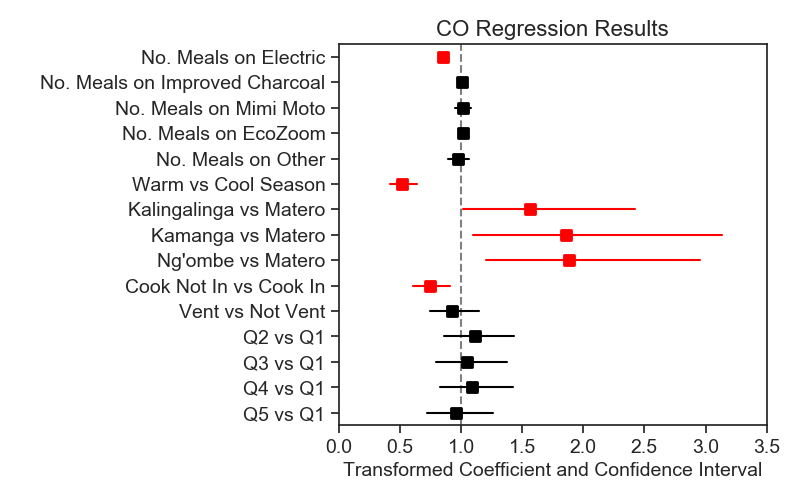

In [152]:
# set up multi-panel figure
#sns.set(style="white",palette="tab10",font_scale=1.1) # old color palette
sig_palette=['black','red']
sns.set(style="white",palette=sig_palette,font_scale=1.1)
sns.set_style("ticks")
fig21, axes21 = plt.subplots(1, 1, figsize=(8,5),sharey=False, sharex=False)

# CO
axes21.plot([1,1],[-1,20],color='gray',linestyle='--',zorder=0)
sns.pointplot(ax=axes21, x='coeff_trans', y='name',data=CSA_CO_results,
             join=False, markers="s",hue='sig',style='sig')
axes21.get_legend().remove()
axes21.plot([CSA_CO_results['low_CI_trans'][0],CSA_CO_results['up_CI_trans'][0]],[CSA_CO_results['name'][0],CSA_CO_results['name'][0]],color='red')
axes21.plot([CSA_CO_results['low_CI_trans'][1],CSA_CO_results['up_CI_trans'][1]],[CSA_CO_results['name'][1],CSA_CO_results['name'][1]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][2],CSA_CO_results['up_CI_trans'][2]],[CSA_CO_results['name'][2],CSA_CO_results['name'][2]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][3],CSA_CO_results['up_CI_trans'][3]],[CSA_CO_results['name'][3],CSA_CO_results['name'][3]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][4],CSA_CO_results['up_CI_trans'][4]],[CSA_CO_results['name'][4],CSA_CO_results['name'][4]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][5],CSA_CO_results['up_CI_trans'][5]],[CSA_CO_results['name'][5],CSA_CO_results['name'][5]],color='red')
axes21.plot([CSA_CO_results['low_CI_trans'][6],CSA_CO_results['up_CI_trans'][6]],[CSA_CO_results['name'][6],CSA_CO_results['name'][6]],color='red')
axes21.plot([CSA_CO_results['low_CI_trans'][7],CSA_CO_results['up_CI_trans'][7]],[CSA_CO_results['name'][7],CSA_CO_results['name'][7]],color='red')
axes21.plot([CSA_CO_results['low_CI_trans'][8],CSA_CO_results['up_CI_trans'][8]],[CSA_CO_results['name'][8],CSA_CO_results['name'][8]],color='red')
axes21.plot([CSA_CO_results['low_CI_trans'][9],CSA_CO_results['up_CI_trans'][9]],[CSA_CO_results['name'][9],CSA_CO_results['name'][9]],color='red')
axes21.plot([CSA_CO_results['low_CI_trans'][10],CSA_CO_results['up_CI_trans'][10]],[CSA_CO_results['name'][10],CSA_CO_results['name'][10]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][11],CSA_CO_results['up_CI_trans'][11]],[CSA_CO_results['name'][11],CSA_CO_results['name'][11]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][12],CSA_CO_results['up_CI_trans'][12]],[CSA_CO_results['name'][12],CSA_CO_results['name'][12]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][13],CSA_CO_results['up_CI_trans'][13]],[CSA_CO_results['name'][13],CSA_CO_results['name'][13]],color='black')
axes21.plot([CSA_CO_results['low_CI_trans'][14],CSA_CO_results['up_CI_trans'][14]],[CSA_CO_results['name'][14],CSA_CO_results['name'][14]],color='black')
axes21.set_title('CO Regression Results',y=1,size=16)
#axes21[0].text(3.4,0, 'a', fontsize = 10)
axes21.set_ylabel(" ", fontsize=12)
axes21.tick_params(labelsize=14)
axes21.set_xlabel("Transformed Coefficient and Confidence Interval", fontsize=14)
axes21.set_ylim((14.5,-0.5))
axes21.set_xlim((0,3.5))
#axes21.xaxis.set_minor_locator(MultipleLocator(0.25))

fig21.tight_layout()
#plt.subplots_adjust(wspace=0.73)

fig21.savefig('CO_PM_regression_results_count.png',transparent=True)

## HH Characteristic Summary Tables:

In [153]:
db_19_ODK = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Exposure Monitoring Analysis\ZCCS_2019_ODK_HH_char_CSV.csv',encoding='latin1',index_col=False)

# need to change number codes to categories
db_19_ODK['cook_highestgrade_code'] = db_19_ODK['cook_highestgrade'].copy()
db_19_ODK['cook_highestgrade_code2'] = db_19_ODK['cook_highestgrade'].copy()
db_19_ODK['cook_gender_code'] = db_19_ODK['cook_gender'].copy()
db_19_ODK['ownhome_code'] = db_19_ODK['c3'].copy()
db_19_ODK['ownhome_code2'] = db_19_ODK['c3'].copy()
db_19_ODK['hhelec_code'] = db_19_ODK['c12'].copy()
db_19_ODK['indoorcook_code'] = db_19_ODK['fa1h'].copy()
db_19_ODK['indoorcook_code2'] = db_19_ODK['fa1h'].copy()
db_19_ODK['primstove_code'] = db_19_ODK['c12'].copy() # issues with data type - text vs number
db_19_ODK['primstove_code2'] = db_19_ODK['c12'].copy() # issues with data type - text vs number
db_19_ODK['stove_ind_grp3_code'] = db_19_ODK['c12'].copy() # issues with data type - text vs number
db_19_ODK['gap_wallroof_code'] = db_19_ODK['gap_wall_roof'].copy()
db_19_ODK['no_windows_code'] = db_19_ODK['no_openwindows'].copy()
db_19_ODK['no_windows_vent_mask'] = db_19_ODK['no_openwindows'].copy()
db_19_ODK['no_windows_vent_mask_code'] = db_19_ODK['no_openwindows'].copy()
for i in np.arange(len(db_19_ODK['HH ID'])):
    #cook_highestgrade
    if (db_19_ODK['cook_highestgrade'][i]==0):
        db_19_ODK['cook_highestgrade_code'][i]='Nursery/pre-school'
    if (db_19_ODK['cook_highestgrade'][i]==1):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==2):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==3):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==4):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==5):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==6):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==7):
        db_19_ODK['cook_highestgrade_code'][i]='Primary'
    if (db_19_ODK['cook_highestgrade'][i]==8):
        db_19_ODK['cook_highestgrade_code'][i]='Secondary'
    if (db_19_ODK['cook_highestgrade'][i]==9):
        db_19_ODK['cook_highestgrade_code'][i]='Secondary'
    if (db_19_ODK['cook_highestgrade'][i]==10):
        db_19_ODK['cook_highestgrade_code'][i]='Secondary'
    if (db_19_ODK['cook_highestgrade'][i]==11):
        db_19_ODK['cook_highestgrade_code'][i]='Secondary'
    if (db_19_ODK['cook_highestgrade'][i]==12):
        db_19_ODK['cook_highestgrade_code'][i]='Secondary'
    if (db_19_ODK['cook_highestgrade'][i]==13):
        db_19_ODK['cook_highestgrade_code'][i]='Secondary'
    if (db_19_ODK['cook_highestgrade'][i]==14):
        db_19_ODK['cook_highestgrade_code'][i]='College/ University'
    if (db_19_ODK['cook_highestgrade'][i]==15):
        db_19_ODK['cook_highestgrade_code'][i]='College/ University'
    if (db_19_ODK['cook_highestgrade'][i]==16):
        db_19_ODK['cook_highestgrade_code'][i]='Post-graduate certificate/ degree'
    if (db_19_ODK['cook_highestgrade'][i]==17):
        db_19_ODK['cook_highestgrade_code'][i]='Post-graduate certificate/ degree'
    if (db_19_ODK['cook_highestgrade'][i]==18):
        db_19_ODK['cook_highestgrade_code'][i]='Post-graduate certificate/ degree'
    # need in number form for ranksum
    if (db_19_ODK['cook_highestgrade_code'][i]=='Nursery/pre-school'):
         db_19_ODK['cook_highestgrade_code2'][i]=0
    if (db_19_ODK['cook_highestgrade_code'][i]=='Primary'):
         db_19_ODK['cook_highestgrade_code2'][i]=1
    if (db_19_ODK['cook_highestgrade_code'][i]=='Secondary'):
         db_19_ODK['cook_highestgrade_code2'][i]=2
    if (db_19_ODK['cook_highestgrade_code'][i]=='College/ University'):
         db_19_ODK['cook_highestgrade_code2'][i]=3
    if (db_19_ODK['cook_highestgrade_code'][i]=='Post-graduate certificate/ degree'):
         db_19_ODK['cook_highestgrade_code2'][i]=4
    #cook_gender    
    if (db_19_ODK['cook_gender'][i]==1):
        db_19_ODK['cook_gender_code'][i]='Male'
    if (db_19_ODK['cook_gender'][i]==2):
        db_19_ODK['cook_gender_code'][i]='Female'
    #c3_ownhome    
    if (db_19_ODK['c3'][i]==1):
        db_19_ODK['ownhome_code'][i]='Own'
    if (db_19_ODK['c3'][i]==2):
        db_19_ODK['ownhome_code'][i]='Rent'
    if (db_19_ODK['c3'][i]==3):
        db_19_ODK['ownhome_code'][i]='Rent'
    if (db_19_ODK['c3'][i]==4):
        db_19_ODK['ownhome_code'][i]='Employer'
    if (db_19_ODK['c3'][i]==5):
        db_19_ODK['ownhome_code'][i]='Family home'
    # need in number form for ranksum
    if (db_19_ODK['ownhome_code'][i]=='Own'):
        db_19_ODK['ownhome_code2'][i]=0
    if (db_19_ODK['ownhome_code'][i]=='Rent'):
        db_19_ODK['ownhome_code2'][i]=1
    if (db_19_ODK['ownhome_code'][i]=='Employer'):
        db_19_ODK['ownhome_code2'][i]=2
    if (db_19_ODK['ownhome_code'][i]=='Family home'):
        db_19_ODK['ownhome_code2'][i]=3
    #c12_hhelec    
    if (db_19_ODK['c12'][i]==0):
        db_19_ODK['hhelec_code'][i]='No'
    if (db_19_ODK['c12'][i]==1):
        db_19_ODK['hhelec_code'][i]='Yes'
    #fa1h_indoorcook   
    if (db_19_ODK['fa1h'][i]==1):
        db_19_ODK['indoorcook_code'][i]='In'
    if (db_19_ODK['fa1h'][i]==2):
        db_19_ODK['indoorcook_code'][i]='In'
    if (db_19_ODK['fa1h'][i]==3):
        db_19_ODK['indoorcook_code'][i]='Out'
    if (db_19_ODK['fa1h'][i]==4):
        db_19_ODK['indoorcook_code'][i]='Out'
    if (db_19_ODK['fa1h'][i]==99):
        db_19_ODK['indoorcook_code'][i]='Out'
    # need in number form for ranksum
    if (db_19_ODK['indoorcook_code'][i]=='In'):
        db_19_ODK['indoorcook_code2'][i]=0
    if (db_19_ODK['indoorcook_code'][i]=='Out'):
        db_19_ODK['indoorcook_code2'][i]=1
    #prim stove
    if (db_19_ODK['primary_stove'][i]=='electric_oven'):
        db_19_ODK['primstove_code'][i]='Electric'
    if (db_19_ODK['primary_stove'][i]=='electric_nooven'):
        db_19_ODK['primstove_code'][i]='Electric'
    if (db_19_ODK['primary_stove'][i]=='mbaula'):
        db_19_ODK['primstove_code'][i]='trad charcoal'
    if (db_19_ODK['primary_stove'][i]=='improvedcharcoal'):
        db_19_ODK['primstove_code'][i]='impr charcoal'
    if (db_19_ODK['primary_stove'][i]=='threestone'):
        db_19_ODK['primstove_code'][i]='other'
    # need in number form for ranksum
    if (db_19_ODK['primstove_code'][i]=='Electric'):
        db_19_ODK['primstove_code2'][i]=0
    if (db_19_ODK['primstove_code'][i]=='ecozoom'):
        db_19_ODK['primstove_code2'][i]=1
    if (db_19_ODK['primstove_code'][i]=='impr charcoal'):
        db_19_ODK['primstove_code2'][i]=2
    if (db_19_ODK['primstove_code'][i]=='trad charcoal'):
        db_19_ODK['primstove_code2'][i]=3
    if (db_19_ODK['primstove_code'][i]=='mimimoto'):
        db_19_ODK['primstove_code2'][i]=4
    if (db_19_ODK['primstove_code'][i]=='other'):
        db_19_ODK['primstove_code2'][i]=5
    # stove ind group - need number form for ranksum
    if (db_19_ODK['stove_ind_grp3'][i]=='trad charc'):
        db_19_ODK['stove_ind_grp3_code'][i]=0
    if (db_19_ODK['stove_ind_grp3'][i]=='impr charc'):
        db_19_ODK['stove_ind_grp3_code'][i]=1
    if (db_19_ODK['stove_ind_grp3'][i]=='elec + charc'):
        db_19_ODK['stove_ind_grp3_code'][i]=2
    if (db_19_ODK['stove_ind_grp3'][i]=='char + elec'):
        db_19_ODK['stove_ind_grp3_code'][i]=3
    if (db_19_ODK['stove_ind_grp3'][i]=='elec exc'):
        db_19_ODK['stove_ind_grp3_code'][i]=4
    if (db_19_ODK['stove_ind_grp3'][i]=='other'):
        db_19_ODK['stove_ind_grp3_code'][i]=5
    if (db_19_ODK['stove_ind_grp3'][i]=='mm any'):
        db_19_ODK['stove_ind_grp3_code'][i]=6
    if (db_19_ODK['stove_ind_grp3'][i]=='eco any'):
        db_19_ODK['stove_ind_grp3_code'][i]=7
    # gap wall roof - not working
    if (db_19_ODK['gap_wall_roof'][i]==0):
        db_19_ODK['gap_wallroof_code'][i]='no'
    if (db_19_ODK['gap_wall_roof'][i]==1):
        db_19_ODK['gap_wallroof_code'][i]='yes'
    # windows open
    if (db_19_ODK['no_openwindows'][i]==0):
        db_19_ODK['no_windows_vent_mask'][i]='no vent'
    if (db_19_ODK['no_openwindows'][i]>0):
        db_19_ODK['no_windows_vent_mask'][i]='vent'
    # need in number form for p-value
    if (db_19_ODK['no_windows_vent_mask'][i]=='no vent'):
        db_19_ODK['no_windows_vent_mask_code'][i]=0
    if (db_19_ODK['no_windows_vent_mask'][i]=='vent'):
        db_19_ODK['no_windows_vent_mask_code'][i]=1   

db_19_ODK_EM = db_19_ODK[db_19_ODK['EM_HH']==True]

In [154]:
# split by compound for sig testing
db_19_ODK_Mat = db_19_ODK[db_19_ODK['Compound']=='Matero']
db_19_ODK_EM_Mat = db_19_ODK_EM[db_19_ODK_EM['Compound']=='Matero']
db_19_ODK_Kal = db_19_ODK[db_19_ODK['Compound']=='Kalingalinga']
db_19_ODK_EM_Kal = db_19_ODK_EM[db_19_ODK_EM['Compound']=='Kalingalinga']
db_19_ODK_Kam = db_19_ODK[db_19_ODK['Compound']=='Kamanga']
db_19_ODK_EM_Kam = db_19_ODK_EM[db_19_ODK_EM['Compound']=='Kamanga']
db_19_ODK_Ngo = db_19_ODK[db_19_ODK['Compound']=="Ng'ombe"]
db_19_ODK_EM_Ngo = db_19_ODK_EM[db_19_ODK_EM['Compound']=="Ng'ombe"]

In [155]:
# a million wilcoxon rank sums tests
from scipy.stats import ranksums

# for primestove need to subset bc NaN in Ngombe is messing up
db_19_ODK_Mat = db_19_ODK_Mat[db_19_ODK_Mat['gap_wallroof_code'].notnull()]
db_19_ODK_Kal = db_19_ODK_Kal[db_19_ODK_Kal['gap_wallroof_code'].notnull()]
db_19_ODK_Kam = db_19_ODK_Kam[db_19_ODK_Kam['gap_wallroof_code'].notnull()]
db_19_ODK_Ngo = db_19_ODK_Ngo[db_19_ODK_Ngo['gap_wallroof_code'].notnull()]
#db_19_ODK_EM_Ngo = db_19_ODK_EM_Ngo[db_19_ODK_EM_Ngo['primstove_code2'].notnull()]

# total vs EM groups
print(ranksums(db_19_ODK_Mat['stove_ind_grp3_code'],db_19_ODK_EM_Mat['stove_ind_grp3_code']))
print(ranksums(db_19_ODK_Kal['stove_ind_grp3_code'],db_19_ODK_EM_Kal['stove_ind_grp3_code']))
print(ranksums(db_19_ODK_Kam['stove_ind_grp3_code'],db_19_ODK_EM_Kam['stove_ind_grp3_code']))
print(ranksums(db_19_ODK_Ngo['stove_ind_grp3_code'],db_19_ODK_EM_Ngo['stove_ind_grp3_code']))

# control vs intervention groups
print(ranksums(db_19_ODK_Mat['gap_wallroof_code'],db_19_ODK_Kal['gap_wallroof_code']))
print(ranksums(db_19_ODK_Kam['gap_wallroof_code'],db_19_ODK_Ngo['gap_wallroof_code']))

print(ranksums(db_19_ODK_EM_Mat['b_hhmembercount'],db_19_ODK_EM_Kal['b_hhmembercount']))
print(ranksums(db_19_ODK_EM_Kam['b_hhmembercount'],db_19_ODK_EM_Ngo['b_hhmembercount']))

RanksumsResult(statistic=-0.08610882996604705, pvalue=0.9313799044008348)
RanksumsResult(statistic=1.1982382116903976, pvalue=0.23082429332244314)
RanksumsResult(statistic=0.16643373477162807, pvalue=0.8678156276517187)
RanksumsResult(statistic=-0.021068955653553066, pvalue=0.983190649195293)
RanksumsResult(statistic=-0.047633051162246684, pvalue=0.9620086908980823)
RanksumsResult(statistic=-0.19344451244711172, pvalue=0.8466108578263192)
RanksumsResult(statistic=0.7392933638560519, pvalue=0.4597288780852603)
RanksumsResult(statistic=0.2587234920767714, pvalue=0.7958485925000544)


## Atmotube vs. MicroPEM Endline Collocation:

In [156]:
# import all the CSVs:
Atmos_stat = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_Atmo_Stationary_20Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['Atmo_Time'])
PA_stat = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_PA_Stationary_29Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['PA_time'])
Atmo_dep_43 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_Atmo_Deploy_241143_20Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['Date'])
UPEM_dep_43 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_uPEM_Deploy_241143_20Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['Date'])
PA_dep_43 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_PA_Deploy_241143_29Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['Date'])
Atmo_dep_26 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_Atmo_Deploy_241026_20Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['Date'])
UPEM_dep_26 = pd.read_csv(r'G:\Shared drives\GAEL_Group\GAEL Commons\Final Project Files\EPPSA\2021 Zambia Campaign\Colocation\CSVs\Colocation_uPEM_Deploy_241026_20Sept2022.csv',encoding='latin1',index_col=False,parse_dates=['Date'])

In [157]:
# first we need to downsample the upem files from 1 second data to 1 minute data
# -------- got this from ashley from david from "Downsampling_and_averaging_timeseries.ipynb"
# -------- also https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
# set date as index 
UPEM_dep_43 = UPEM_dep_43.set_index('Date')
UPEM_dep_26 = UPEM_dep_26.set_index('Date')
# ^^^ only run once or will get an error

In [18]:
cal_factor_43 = 106.736/np.mean(UPEM_dep_43['PM2pnt5'])       # number is filter average  
UPEM_dep_43['PM2pnt5_corr'] = UPEM_dep_43['PM2pnt5']*cal_factor_43
cal_factor_26 = 46.607/np.mean(UPEM_dep_26['PM2pnt5'])
UPEM_dep_26['PM2pnt5_corr'] = UPEM_dep_26['PM2pnt5']*cal_factor_26

In [19]:
# resample function - H = hourly, D = daily, T = minute
UPEM_dep_43_min = UPEM_dep_43.resample('T').mean()
UPEM_dep_26_min = UPEM_dep_26.resample('T').mean()

In [20]:
# merge each deployment based on time match to do scatter plot
# rename so not confusing
UPEM_dep_43_min = UPEM_dep_43_min.rename(columns={"PM2pnt5_corr": "PM_upem_corr","PM2pnt5": "PM_upem"})
UPEM_dep_26_min = UPEM_dep_26_min.rename(columns={"PM2pnt5_corr": "PM_upem_corr","PM2pnt5": "PM_upem"})
Atmo_dep_43 = Atmo_dep_43.rename(columns={"PM2pnt5": "PM_atmo"})
Atmo_dep_26 = Atmo_dep_26.rename(columns={"PM2pnt5": "PM_atmo"})

UPEM_dep_43_min = UPEM_dep_43_min.reset_index()
UPEM_dep_26_min = UPEM_dep_26_min.reset_index()

In [21]:
df_merge_43 = pd.merge(UPEM_dep_43_min,Atmo_dep_43, how='outer')
df_merge_26 = pd.merge(UPEM_dep_26_min,Atmo_dep_26, how='outer')

df_merge_43['Time'] = df_merge_43['Date'].dt.time

<IPython.core.display.Javascript object>


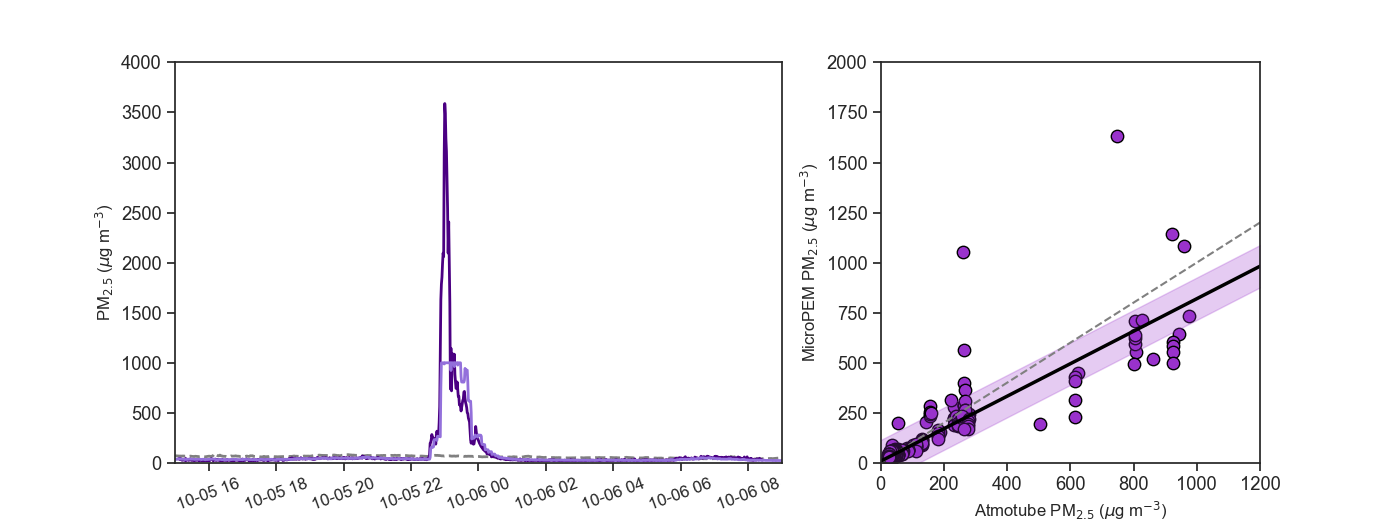

In [28]:
# set up multi-panel figure
sns.set(style="white",font_scale=1.2)
#sns.set(style="white",palette=adopt_stat,font_scale=1.2)
sns.set_style("ticks")
fig22, axes22 = plt.subplots(1, 2, figsize=(14,5.2),sharey=False, sharex=False,gridspec_kw={'width_ratios': [8, 5]})

# remove > 1000 points
df_merge_43_belowsat = df_merge_43[df_merge_43['PM_atmo'] < 980]
df_merge_43_belowsat_nonans = df_merge_43_belowsat.dropna(subset=['PM_atmo','PM_upem_corr'])
df_merge_26_belowsat = df_merge_26[df_merge_26['PM_atmo'] < 980]
df_merge_26_belowsat_nonans = df_merge_26_belowsat.dropna(subset=['PM_atmo','PM_upem_corr'])

# 241143
# time series
sns.lineplot(ax=axes22[0],x=PA_dep_43['Date'], y=PA_dep_43['PA'],linewidth=2,color='gray')
axes22[0].lines[0].set_linestyle("dashed")
sns.lineplot(ax=axes22[0],x=df_merge_43['Date'], y=df_merge_43['PM_upem_corr'],linewidth=2,color='indigo')
sns.lineplot(ax=axes22[0],x=df_merge_43['Date'], y=df_merge_43['PM_atmo'],linewidth=2,color='mediumpurple')
axes22[0].set_xlabel(" ", fontsize=12)
axes22[0].set_ylabel("PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
axes22[0].set_xlim([pd.to_datetime('2021-10-05 15:00:00'), pd.to_datetime('2021-10-06 09:00:00')])
axes22[0].set_ylim((0,4000))
axes22[0].tick_params(axis='x', which='major',labelsize=12,rotation=20)

# scatter plot
#sns.scatterplot(ax=axes22[1],x=df_merge_43['PM_atmo'], y=df_merge_43['PM_upem_corr'],
#                color='darkorchid',s=80,linewidth=1,edgecolor='black')
sns.scatterplot(ax=axes22[1],x=df_merge_43_belowsat['PM_atmo'], y=df_merge_43_belowsat['PM_upem_corr'],
                color='darkorchid',s=80,linewidth=1,edgecolor='black')
axes22[1].set_xlabel("Atmotube PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
axes22[1].set_ylabel("MicroPEM PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
axes22[1].plot([0, 4000],[0, 4000],'--',color='gray')
axes22[1].set_xlim((0,1200))
axes22[1].set_ylim((0,2000))

# linear regression with R^2 calculated for both:
model = np.polyfit(df_merge_43_belowsat_nonans['PM_atmo'],df_merge_43_belowsat_nonans['PM_upem_corr'], 1)
predict = np.poly1d(model)
R2 = r2_score(df_merge_43_belowsat_nonans['PM_upem_corr'], predict(df_merge_43_belowsat_nonans['PM_atmo']))

x_lin_reg = [0,2000]
y_lin_reg = predict(x_lin_reg)

axes22[1].plot(x_lin_reg, y_lin_reg, color = 'black',linewidth=2.5)

# fit uncertainty
x = df_merge_43_belowsat_nonans['PM_atmo']
y = df_merge_43_belowsat_nonans['PM_upem_corr']
yhat = predict(x)                                            # or [p(z) for z in x]
ybar = np.sum(y)/len(y)                                      # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)                               # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((y - ybar)**2)                                # or sum([ (yi - ybar)**2 for yi in y])
syx = np.sqrt(np.sum((y-yhat)**2)/(len(y)-2))                # standard error of the fit
fit_error = 2*syx # calculate fit uncertainty at 95%
rsq = ssreg / sstot
axes22[1].fill_between(x_lin_reg, y_lin_reg-fit_error, y_lin_reg+fit_error, color='darkorchid', alpha=0.25)

fig22.savefig('Atmo_Deploy_timeseries_scatter_no1000.png',transparent=True)

# 241026 ----- 241026 NEPH IS BAD SO NOT PLOTTING
# time series
#sns.lineplot(ax=axes22[0],x=PA_dep_43['Date'], y=PA_dep_43['PA'],linewidth=2,color='gray')
#axes22[0].lines[0].set_linestyle("dashed")
#sns.lineplot(ax=axes22[0],x=df_merge_26['Date'], y=df_merge_26['PM_upem_corr'],linewidth=2,color='indigo')
#sns.lineplot(ax=axes22[0],x=df_merge_26['Date'], y=df_merge_26['PM_atmo'],linewidth=2,color='mediumpurple')
#axes22[0].set_xlabel(" ", fontsize=12)
#axes22[0].set_ylabel("PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
#axes22[0].set_xlim([pd.to_datetime('2021-10-05 15:00:00'), pd.to_datetime('2021-10-06 09:00:00')])
#axes22[0].set_ylim((0,4000))
#axes22[0].tick_params(axis='x', which='major',labelsize=12,rotation=20)

# scatter plot
#sns.scatterplot(ax=axes22[1],x=df_merge_26['PM_atmo'], y=df_merge_26['PM_upem_corr'],
#                color='darkorchid',s=80,linewidth=1,edgecolor='black')
#sns.scatterplot(ax=axes22[1],x=df_merge_26_belowsat['PM_atmo'], y=df_merge_26_belowsat['PM_upem_corr'],
#                color='darkorchid',s=80,linewidth=1,edgecolor='black')
#axes22[1].set_xlabel("Atmotube PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
#axes22[1].set_ylabel("MicroPEM PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
#axes22[1].plot([0, 4000],[0, 4000],'--',color='gray')
#axes22[1].set_xlim((0,1200))
#axes22[1].set_ylim((0,2000))

# linear regression with R^2 calculated for both:
#model = np.polyfit(df_merge_26_belowsat_nonans['PM_atmo'],df_merge_26_belowsat_nonans['PM_upem_corr'], 1)
#predict = np.poly1d(model)
#R2 = r2_score(df_merge_26_belowsat_nonans['PM_upem_corr'], predict(df_merge_26_belowsat_nonans['PM_atmo']))

#x_lin_reg = [0,2000]
#y_lin_reg = predict(x_lin_reg)

#axes22[1].plot(x_lin_reg, y_lin_reg, color = 'black',linewidth=2.5)

# fit uncertainty
#x = df_merge_26_belowsat_nonans['PM_atmo']
#y = df_merge_26_belowsat_nonans['PM_upem_corr']
#yhat = predict(x)                                            # or [p(z) for z in x]
#ybar = np.sum(y)/len(y)                                      # or sum(y)/len(y)
#ssreg = np.sum((yhat-ybar)**2)                               # or sum([ (yihat - ybar)**2 for yihat in yhat])
#sstot = np.sum((y - ybar)**2)                                # or sum([ (yi - ybar)**2 for yi in y])
#syx = np.sqrt(np.sum((y-yhat)**2)/(len(y)-2))                # standard error of the fit
#fit_error = 2*syx # calculate fit uncertainty at 95%
#rsq = ssreg / sstot
#axes22[1].fill_between(x_lin_reg, y_lin_reg-fit_error, y_lin_reg+fit_error, color='darkorchid', alpha=0.25)


#fig22.savefig('Atmo_Deploy_timeseries_scatter_no1000.png',transparent=True)

In [29]:
# calculating MAE
from sklearn.metrics import mean_absolute_error as mae 
mae(df_merge_43_belowsat_nonans['PM_atmo'], df_merge_43_belowsat_nonans['PM_upem_corr']) 
#mae(predict(df_merge_43_belowsat_nonans['PM_atmo']),df_merge_43_belowsat_nonans['PM_upem_corr'])

15.283021691006521

In [35]:
# calculate RMSE - EPA guidelines for this
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_merge_43_belowsat_nonans['PM_upem_corr'], df_merge_43_belowsat_nonans['PM_atmo'])
rmse = np.sqrt(mse)
print("RMSE:", rmse)

range_true_values = np.max(df_merge_43_belowsat_nonans['PM_upem_corr']) - np.min(df_merge_43_belowsat_nonans['PM_upem_corr'])
nrmse = rmse / range_true_values*100
print("NRMSE:", nrmse)
range_true_values


RMSE: 57.72653008692701
NRMSE: 3.582479775427052


1611.3567613942967

In [30]:
df_merge_43.mean()

PM_upem          28.202086
PM_upem_corr    106.665237
PM_atmo          72.667361
dtype: float64

In [12]:
# 5 min downsampling for stationary
Atmos_stat = Atmos_stat.set_index('Atmo_Time')
Atmos_stat_5min = Atmos_stat.resample('5T').mean()
Atmos_stat = Atmos_stat.reset_index()
Atmos_stat_5min = Atmos_stat_5min.reset_index()

# also do for PA data
PA_stat = PA_stat.set_index('PA_time')
PA_stat_5min = PA_stat.resample('10T').mean()
PA_stat = PA_stat.reset_index()
PA_stat_5min = PA_stat_5min.reset_index()

<IPython.core.display.Javascript object>


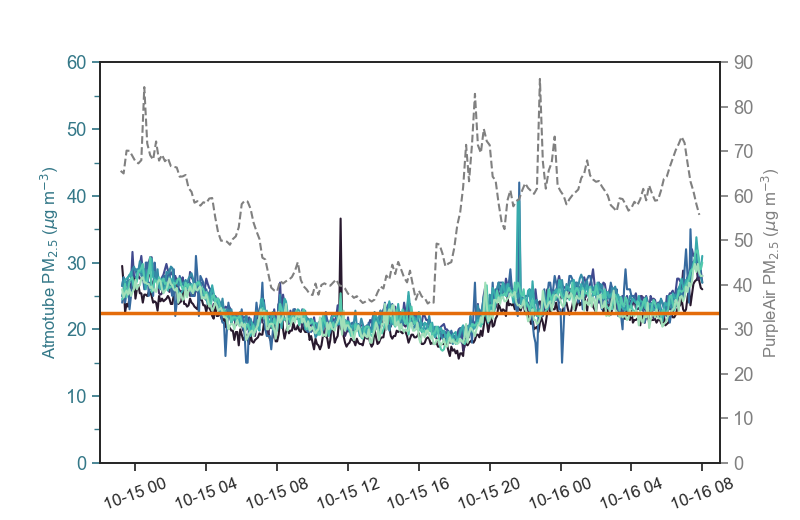

In [28]:
# plotting stationary atmos
atmo_stat_pal = sns.color_palette("mako", 8)
sns.set(style="white",palette=atmo_stat_pal,font_scale=1.2)
sns.set_style("ticks")
fig23, axes23 = plt.subplots(1, 1, figsize=(8,5.2),sharey=False, sharex=False)

# OPTION 1 - time series with all
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['D484'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['8F92'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['76D8'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['38BF'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['AD08'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['8609'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['BF54'])
sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['E631'])
axes23.set_xlabel(" ", fontsize=12)
axes23.set_xlim([pd.to_datetime('2021-10-14 22:00:00'), pd.to_datetime('2021-10-16 09:00:00')])
axes23.set_ylabel("Atmotube PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12,color='#347888')
axes23.set_ylim((0,60))
axes23.tick_params(axis='y', colors='#347888',which='both')

# OPTION 2 - time series with average + std dev
#sns.lineplot(ax=axes23,x=Atmos_stat_5min['Atmo_Time'], y=Atmos_stat_5min['avg_all'],color='teal',linewidth=2.5)
#axes23.fill_between(Atmos_stat_5min['Atmo_Time'],Atmos_stat_5min['avg_plus_sd'],Atmos_stat_5min['avg_minus_sd'],
#                    color='teal', alpha=0.25)
#axes23.set_xlabel(" ", fontsize=12)
#axes23.set_ylabel("PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12)
#axes23.set_ylim((10,40))
#axes23.yaxis.set_minor_locator(MultipleLocator(5))
#axes23.tick_params(axis='x', which='major',labelsize=12,rotation=20)

# add filter average
axes23.plot([pd.to_datetime('2021-10-14 15:00:00'), pd.to_datetime('2021-10-16 09:00:00')], [22.5, 22.5],
            color='#E46C0A',linewidth=2.5)

# add ambient
axes23_2 = axes23.twinx()
sns.lineplot(ax=axes23_2,x=PA_stat_5min['PA_time'], y=PA_stat_5min['PA_avg'],color='gray')
axes23_2.lines[0].set_linestyle("dashed")
axes23_2.set_ylabel("PurpleAir PM$_{2.5}$ ($\mu$g m$^{-3}$)", fontsize=12,color='gray')
axes23_2.tick_params(axis='y', colors='gray',which='both')
axes23_2.set_ylim((0,90))

#axes23.legend(loc='upper left',frameon=False,fontsize=10,ncol=2)
axes23.yaxis.set_minor_locator(MultipleLocator(5))
axes23.tick_params(axis='x', which='major',labelsize=12,rotation=20)


fig23.savefig('Atmo_Stat_timeseries.png',transparent=True)

In [14]:
# some way to show deviation btw atmotube averages and MicroPEM filter averages?
Atmo_stat_avg = {'Atmo':['D484', '8F92', '76D8', '38BF', 'AD08', '8609', 'BF54', 'E631'],
                 'Atmo_Avg':[21.279, 22.969, 24.007, 21.855, 23.657, 23.582, 23.138, 22.413],
                 'Atmo_Diff':[-1.194, 0.497, 1.534, -0.618, 1.184, 1.110, 0.665, -0.060],
                 'Atmo_PercDev':[-5.314, 2.210, 6.828, -2.750, 5.268, 4.937, 2.958, -0.268]}
Atmo_stat_avg = pd.DataFrame(data=Atmo_stat_avg)

<IPython.core.display.Javascript object>


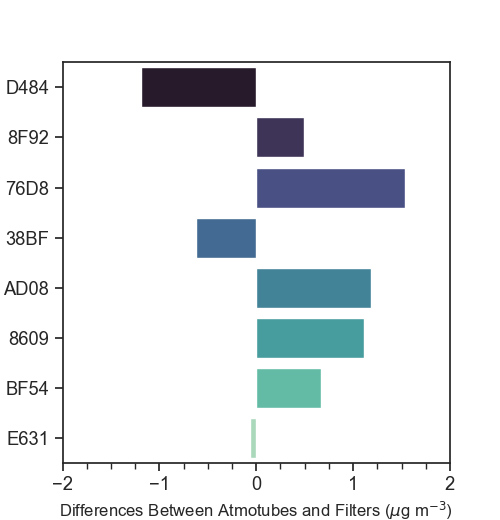

In [15]:
sns.set(style="white",palette=atmo_stat_pal,font_scale=1.2)
sns.set_style("ticks")
fig24, axes24 = plt.subplots(1, 1, figsize=(5,5.2),sharey=False, sharex=False)

sns.barplot(ax=axes24, x="Atmo_Diff", y="Atmo", data=Atmo_stat_avg)
axes24.set_xlabel("Differences Between Atmotubes and Filters ($\mu$g m$^{-3}$)", fontsize=12)
axes24.set_ylabel("", fontsize=12)
axes24.set_xlim((-2,2))
axes24.xaxis.set_minor_locator(MultipleLocator(0.25))

fig24.savefig('Atmo_Stat_Diff.png',transparent=True)